**Autor:** Dávid Dráb  <br> *[Prírodovedecká fakulta](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), Univerzita Pavla Jozefa Šafárika, Košice 2022* <br> email: [david.drab163@gmail.com](mailto:david.drab163@gmail.com).
***
**<font size=6.5 color=darkblue> Analýza hlavných komponentov pre funkconálne dáta I </font>**  

**<font size=5.5 color=darkblue> Obsah </font>** <br>
1. Od PCA ku FPCA <br>
2. FPCA pre úplné dáta  <br>
3. FPCA pre neúplné dáta <br>
4. Dvojrozmerná FPCA <br>
5. Záver - súhrn

--- 

**<font size=5 color=darkblue> 1. Od PCA ku FPCA </font>** <br>

**<font size=4 color=darkblue> 1.1 PCA pre viacrozmerné dáta </font>** <br>

Z matematického hľadiska je analýza hlavných komponentov (z ang. *principal component analysis* - PCA) hľadanie takých vektorov $f_i$, pre ktoré platí:
$$ f_i =\sum_{j=1}^{p} \beta_{j}x_{ij}, i= 1, ..., N,$$
kde $\beta_j$ je váha pozorovanej hodnoty $x_{i,j}$ $j$-tej premennej.
Tiež môžeme túto lineárnu kombináciu vyjadriť ako $$ f_i=\beta'x_i, i = 1, ..., N,$$
kde $\beta$ je vektor $(\beta_1, ..., \beta_p)'$ a $x_i$ je vektor $(x_{i1}, ..., x_{ip})'$.

Vo viacrozmernej verzii volíme váhy tak, aby sme zvýraznili, resp. zobrazili tie typy variácií, ktoré sú veľmi silne zastúpené v dátach. PCA môže byť definovaná takým postupom, ktorý definuje množiny normalizovaných váh, ktoré maximalizujú variáciu $f_i$:
1. nájdeme váhový vektor $\xi_1 = (\xi_{11}, ..., \xi_{p1})'$ pre každú lineárnu kombináciu hodnôt $$f_{i1} =\sum_{j} \xi_{j1}x_{ij} = \xi_{1}'x_{i},$$
ktorá má najväčší možný priemerný štvorec $N^{-1}\sum_{i} f_{i1}^{2}$ s vlastnosťou $$\sum_{j} \xi_{j1}^2 = \lVert \xi_1 \rVert^2 =1. $$

2. V druhom kroku a v nasledujúcich $m$-tých krokoch (až po limitu počtu premennej p), vypočítame nový váhový vektor $\xi_m$ so zložkami $\xi_{jm}$ a s novou hodnotou $f_{im} = \xi_{m}'x_i$. Hodnoty $f_{im}$ majú maximálny priemerný štvorec v závislosti od $\lVert \xi_m \rVert^2 = 1$ a zároveň $$ \sum_j \xi_{jk}\xi_{jm} = \xi_{k}'\xi_{m} = 0 , k < m.$$ 

Prvý krok hovorí o tom, že **maximalizáciou priemerného súčtu štvorcov** identifikujeme najsilnejšiu a najdôležitejšiu varianciu v premenných. **Jednotkový súčet štvorcov váh** je nevyhnutný, aby bol problém dobre definovaný. V druhom kroku tiež hľadáme ďalšie významné smery variancie v premenných, ale s takou podmienkou, aby váhy, ktoré ich definujú, boli **ortogonálne** k tým, ktoré boli určené v predchádzajúcom kroku.

Táto definícia neudáva váhy jednoznačne. Hodnoty lineárnej kombinácie $f_{im}$ nazývame **skóre hlavného komponentu** a často pomáhajú pri identifikovaní jednotlivých komponentov resp. pri ich interpretácií. 

**<font size=4 color=darkblue> 1.2 PCA pre funkcionálne dáta </font>** <br>

Vo funkcionálnom kontexte funguje PCA tak, že v premennej $x_{ij}$ je diskrétny index $j$ nahradený **spojitým indexom** $s$. V prípade, keď $\beta$ a dáta predstavovali vektory, tak lineárnu kombináciu týchto vektorov sme mohli vyjadriť pomocou skalárneho súčinu $$ \beta'x = \sum_{j} \beta_{j}x_{j}.$$  

Keď $\beta$ a $x$ sú funkcie premennej $s$, tak sumácia cez $j$ je nahradená **integráciou** cez $s$ a teda skalárny súčin môžme vyjadriť ako $$ \int \beta x = \int \beta(s)x(s)ds.$$

Váhy $\beta_j$ sa stanú **funkciami** $\beta_{j}(s)$ a skóre hlavného komponentu zodpovedajúceho váhe $\beta$ je teraz $$ f_i = \int \beta x_i = \int \beta(s)x_i(s)ds. $$

 V prvom kroku FPCA sa zvolí váhová funkcia $ \xi_1(s)$ taká, aby platilo, že $ N^{-1}\sum_i f_{i1}^2 = N^{-1} \sum_i(\int \xi_1x_i)^2$ a taktiež $\int \xi_1(s)^2ds = 1$. V druhom kroku potom podobne môžeme písať podmienku ortogonality ako $\int \xi_k\xi_m = 0, k<m..$

**<font size=5 color=darkblue> 2. FPCA pre úplné dáta </font>** <br>

**<font size=4 color=darkblue> 2.1 Popis skúmaných dát </font>** <br>

Našimi skúmanými dátami sú profily traktu frakčnej anizotropie (FA) pre corpus callosum (cca) z knižnice DTI. Dáta v tejto knižnici obsahujú výsledky merania metódou difúzne váženého zobrazovania pomocou magnetickej rezonancie, ktorá meria difúziu vody v tkanivách, ako je ľudský mozog.

In [42]:
# instalacia a inicializacia potrebnych balikov a kniznic
library("fda")
library("readr")
library("refund")
data(DTI)
attach(DTI)

The following objects are masked from DTI (pos = 4):

    case, cca, ID, Nscans, pasat, rcst, sex, visit, visit.time


The following objects are masked from DTI (pos = 13):

    case, cca, ID, Nscans, pasat, rcst, sex, visit, visit.time




In [43]:
DTI.complete <- subset(DTI, complete.cases(DTI))
DTI.baseline <- subset(DTI.complete, visit == 1 & case == 1)
meranie <- 1:93
n <- length(unique(DTI.baseline$ID))

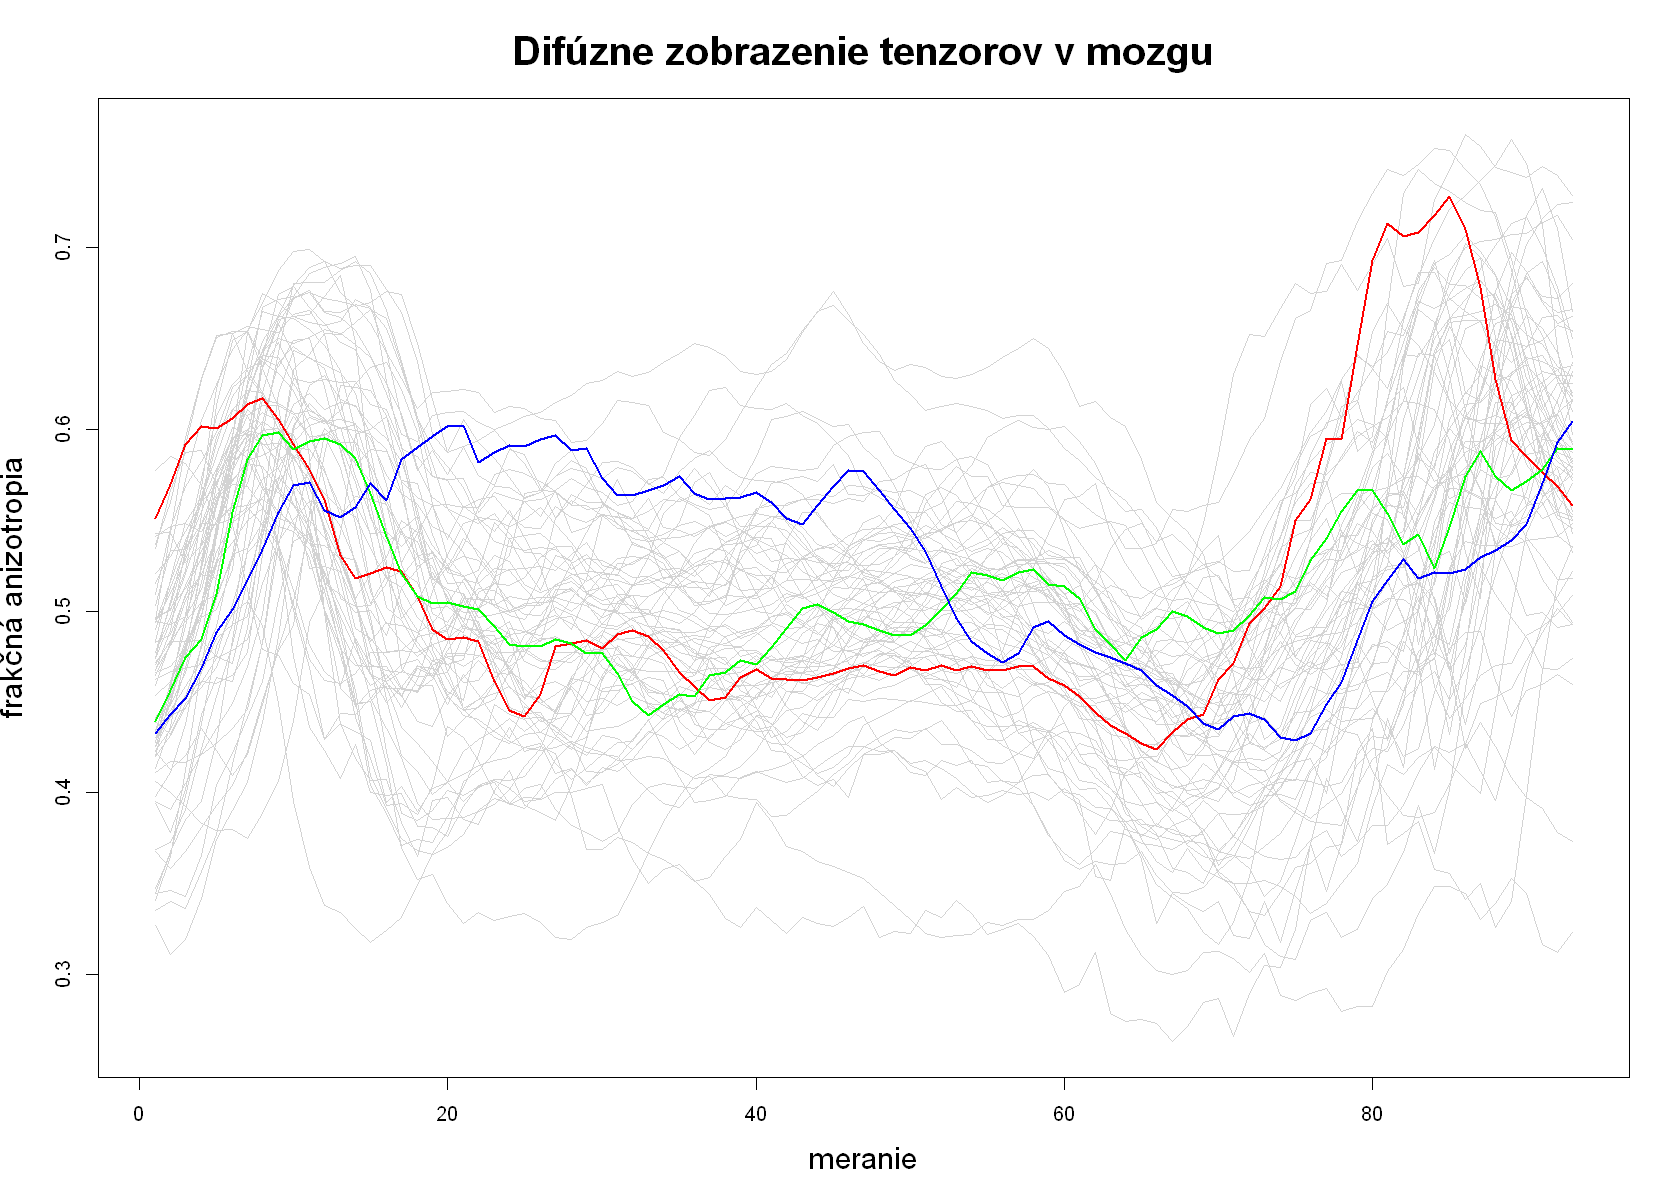

In [44]:
options(repr.plot.width=14, repr.plot.height=10)
matplot(meranie, t(DTI.baseline$cca), 
        type='l', lty=1, col="light grey",
        main = "Difúzne zobrazenie tenzorov v mozgu",
        xlab="meranie", ylab="frakčná anizotropia", cex.main=2, cex.lab=1.55)
sel.crv <- sample(1:n, size = 3, replace = FALSE)
matlines(meranie, t(DTI.baseline$cca[sel.crv,]), 
         type='l', lty=1, lwd=2, col = rainbow(3))

Na grafe môžeme vidieť celkom výraznú variabilitu dát. Túto variabilitu sa budeme snažiť vysvetliť pomocou funkcionálnej verzie metódy hlavných komponentov.

**<font size=4 color=darkblue> 2.2 Implementácia FPCA a interpretácia výsledkov </font>** <br>

Teraz si vyhladíme všetky naše krivky pomocou funkcie gam a následne si vykreslíme pôvodné a vyhladené vybrané krivky.

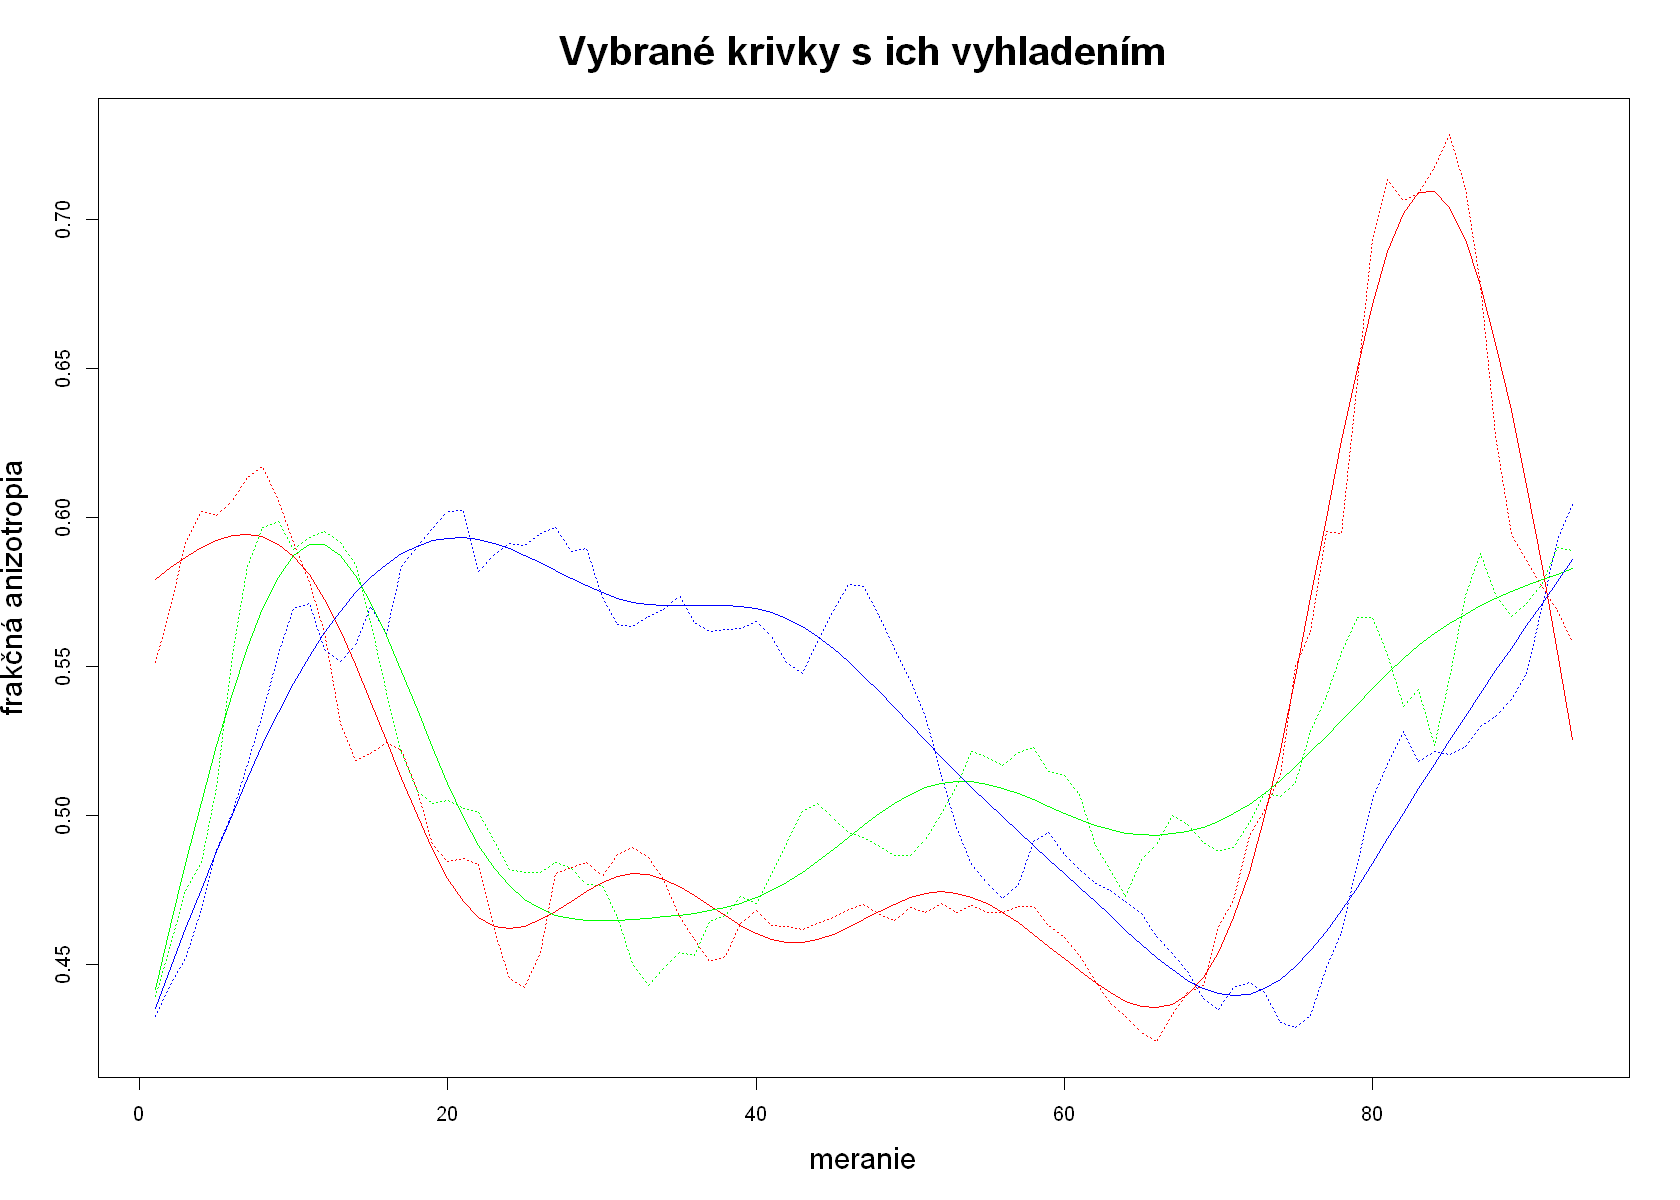

In [45]:
library(mgcv)

smooth.curves <- array(0, dim(DTI.baseline$cca))
n <- nrow(DTI.baseline$cca)
# vyhladime si krivky pomocou funkcie gam s desiatimi funkciami v baze
for(j in 1:n){
    fit <- gam(DTI.baseline$cca[j,] ~ s(meranie, k = 10, bs = 'cr'), method = "REML")
    smooth.curves[j,] <- fit$fitted
}
# vykreslime si par kriviek s vyhladenim
options(repr.plot.width=14, repr.plot.height=10)
matplot(meranie, t(DTI.baseline$cca[sel.crv,]), 
         type='l', lty=3, lwd=1, col = rainbow(3), main="Vybrané krivky s ich vyhladením", 
        cex.main=2, cex.lab=1.5, xlab="meranie",ylab="frakčná anizotropia")
matlines(meranie, t(smooth.curves[sel.crv,]), 
         type='l', lty=1, lwd=1, col = rainbow(3))

Pre FPCA je dôležitá:

* **funkcia priemeru** vyhladených kriviek; 


* **kovariančná matica** potrebná na spektrálny rozklad. 

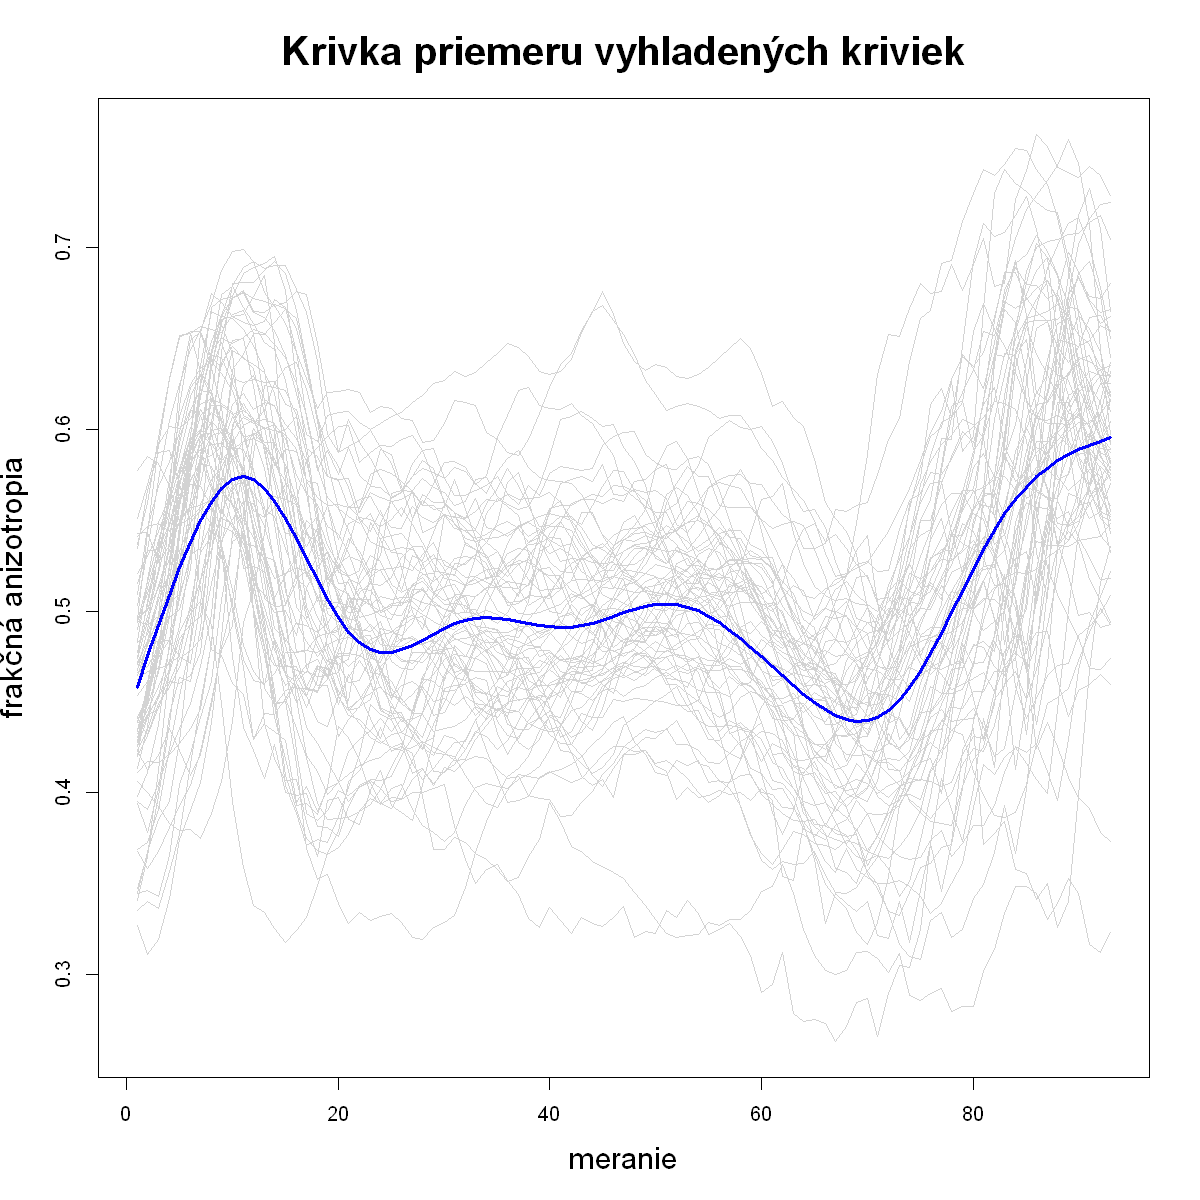

In [46]:
options(repr.plot.width=10, repr.plot.height=10)
mean.hat <- colMeans(smooth.curves)
matplot(meranie, t(DTI.baseline$cca), 
        type='l', lty=1, col="light grey",
        main="Krivka priemeru vyhladených kriviek", cex.main=2, cex.lab=1.55,xlab="meranie",
       ylab="frakčná anizotropia")
lines(meranie, mean.hat, col='blue', lwd=3)

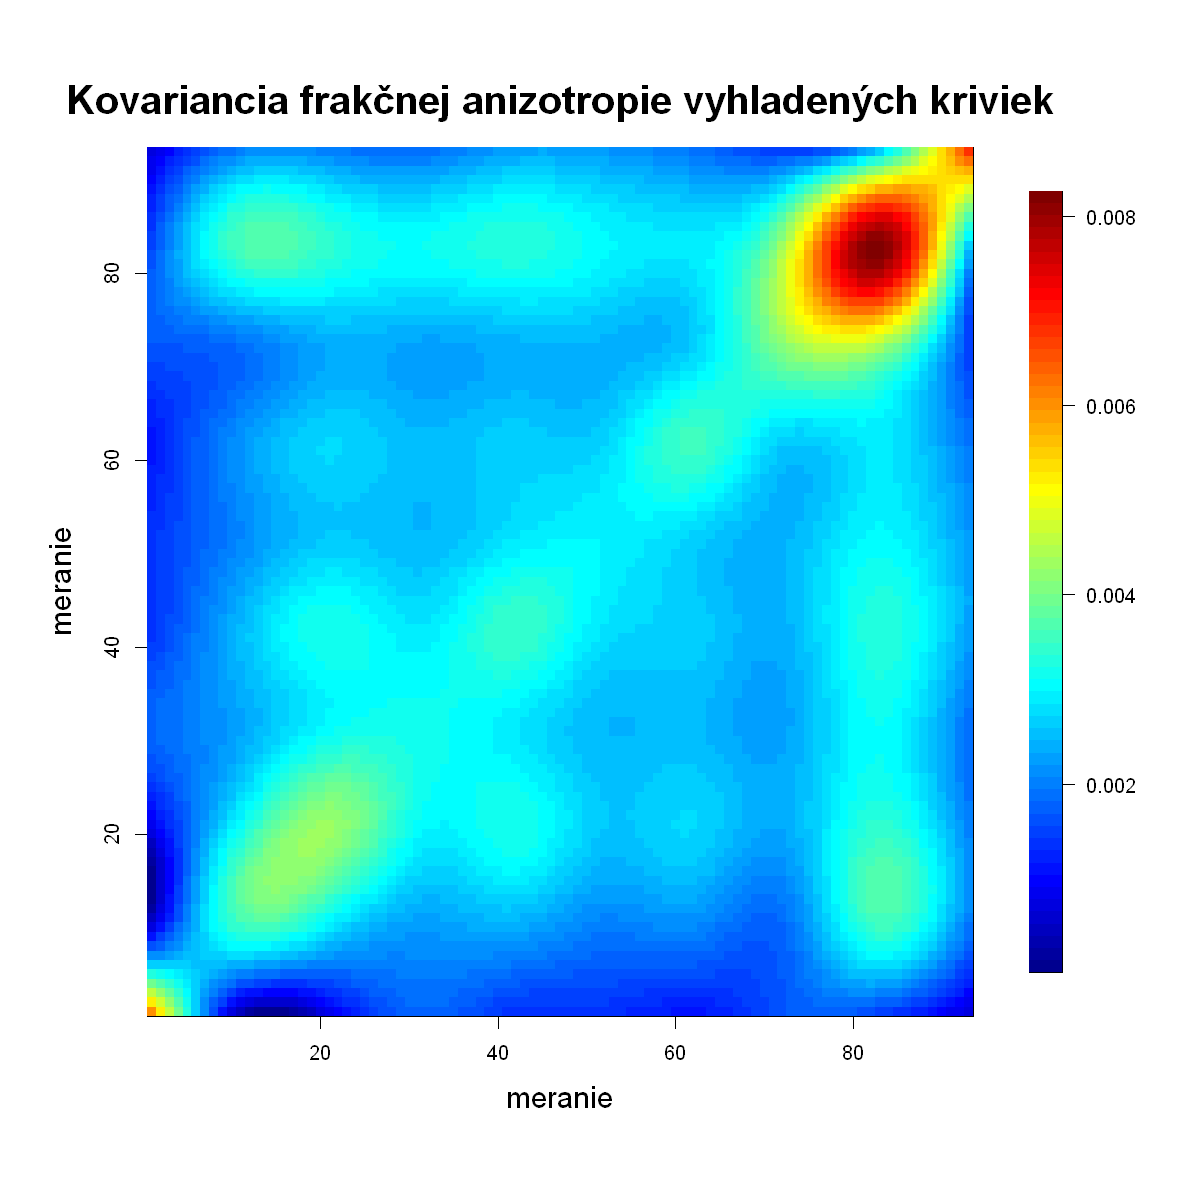

In [47]:
library(fields)
smooth.cov <- cov(smooth.curves)
image.plot(meranie, meranie, smooth.cov, 
           main='Kovariancia frakčnej anizotropie vyhladených kriviek', xlab="meranie", ylab="meranie", cex.main=2, cex.lab=1.5)

Pre hodnoty traktu 80 a viac môžeme vidieť kovarianciu slabo nad nulou v dátach. Inak je kovariancia takmer nulová.

Ďalej demonštrujeme postupný "ručný" výpočet vlastných funkcií a čísel. Je potrebné nezabudnúť ich aj správne škálovať. 

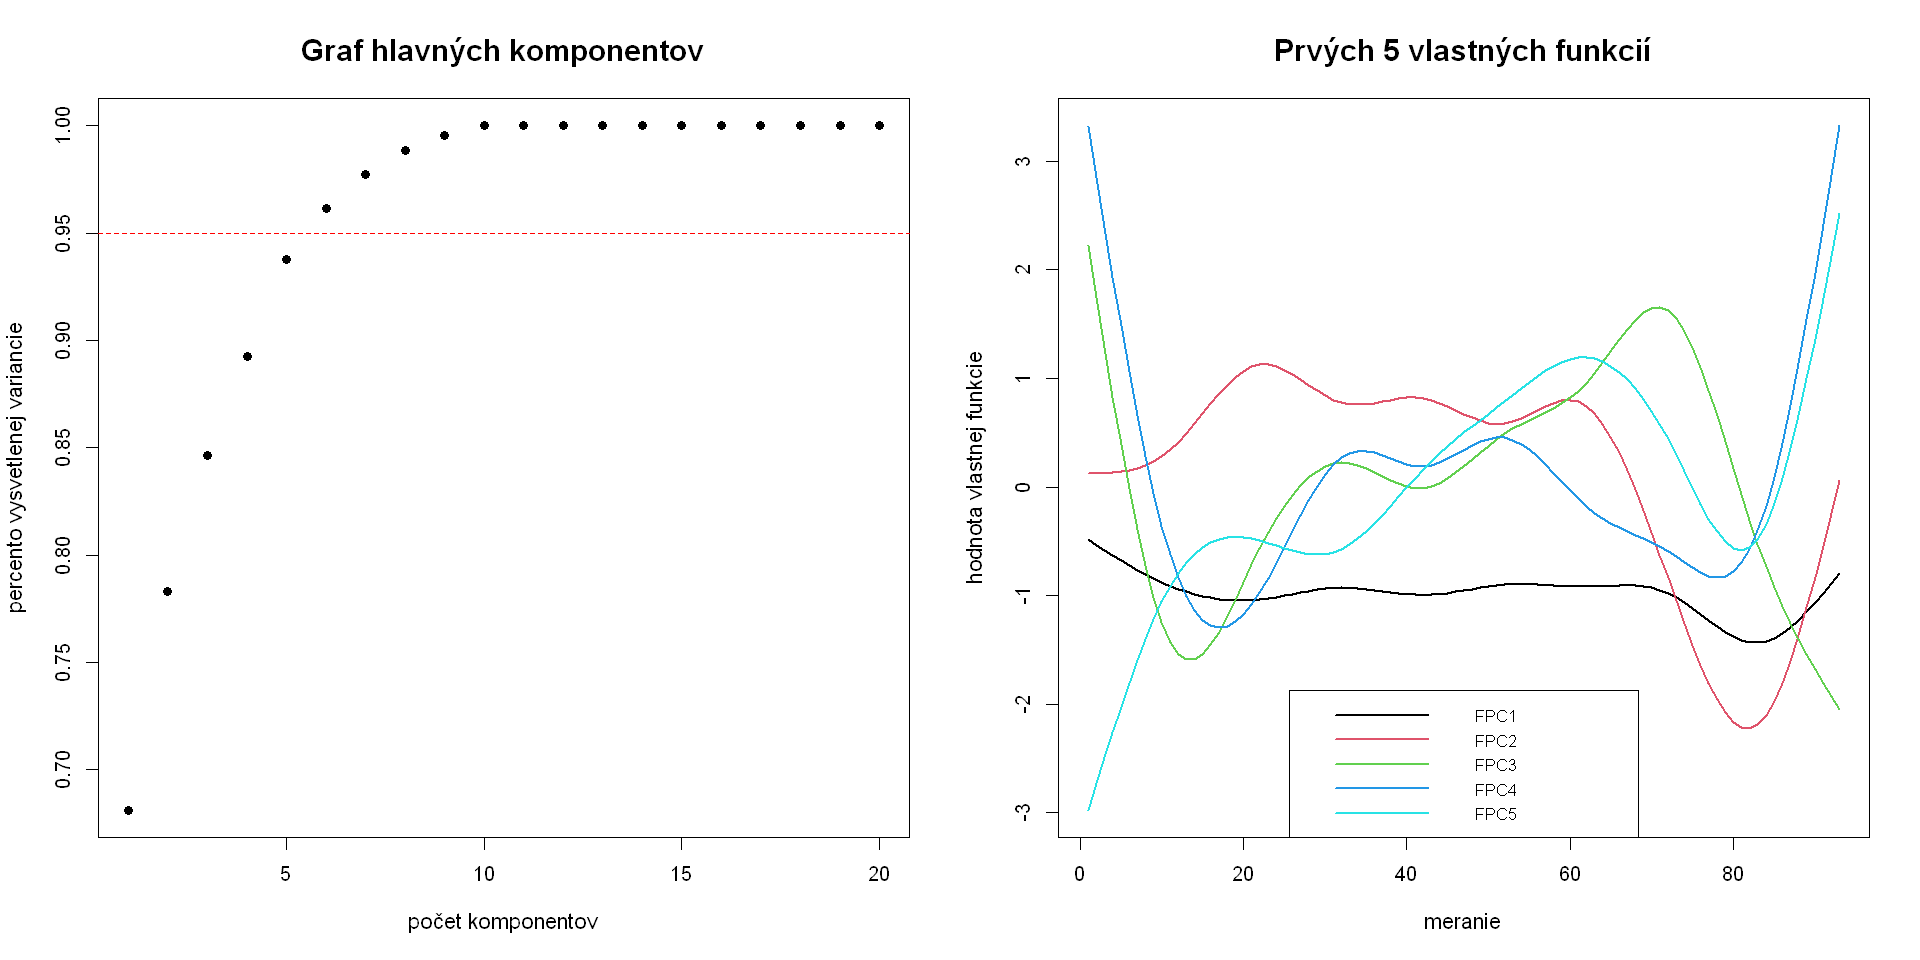

In [48]:
# spektralne si rozlozime symetricku kovariancnu maticu
svd.result0 <- eigen(smooth.cov, symmetric = TRUE)

evectors <- svd.result0$vectors[,svd.result0$values > 0]
evalues <- svd.result0$values[svd.result0$values > 0]

par(mfrow=c(1,2))

# skalujeme vlastne vektory a hodnoty
efns0 <- evectors*sqrt(93)
evals0 <- evalues/93
# ulozime si percento vysvetlenej kovariancie pre dany poceet komponentov
pve <- cumsum(evals0)/sum(evals0)
# ulozime si pocet potrebnych komponentov, ktore ma vysvetlit 95% variability 
npc <- sum(pve < 0.95) + 1

# ulozime si maximalne tolko vektorov a hodnot, kolko nam treba na vysvetlenie 95% variability
efns <- efns0[,1:npc]
evals <- evals0[1:npc]

options(repr.plot.width=16, repr.plot.height=8)
plot(1:20, pve[1:20], pch = 16, 
     ylab="percento vysvetlenej variancie", xlab="počet komponentov",
     main="Graf hlavných komponentov", cex.main=1.5, cex.lab=1.1)
abline(h = 0.95, lty=2, col='red')

matplot(meranie, efns[,1:5], col=1:5, 
        type='l', lty=1, lwd=2,
        ylab="hodnota vlastnej funkcie", xlab="meranie",
        main="Prvých 5 vlastných funkcií",cex.main=1.5, cex.lab=1.1)
legend("bottom", lwd=2, lty=1, col=1:5, 
      legend = paste0("FPC", 1:5),cex=0.8)

Podľa grafu sme určili, že približne 94% variancie vysvetlí až 5 komponentov. Vysvetlenie a určenie vlastných funkcií je na tejto metóde najťažšie. Avšak existujú i tzv. pomocné grafy ktoré nám pomáhajú určit resp. interpretovať, čo ktorá komponenta vysvetľuje.

Ešte predtým si ale zobrazíme vlastné funkcie pomocou vstavanej funkcie v softvéri R. Nasledujúci kód nám vypočíta a vykreslí aj vlastné funkcie, ktoré porovnáme s ručne vypočítanými funkciami.

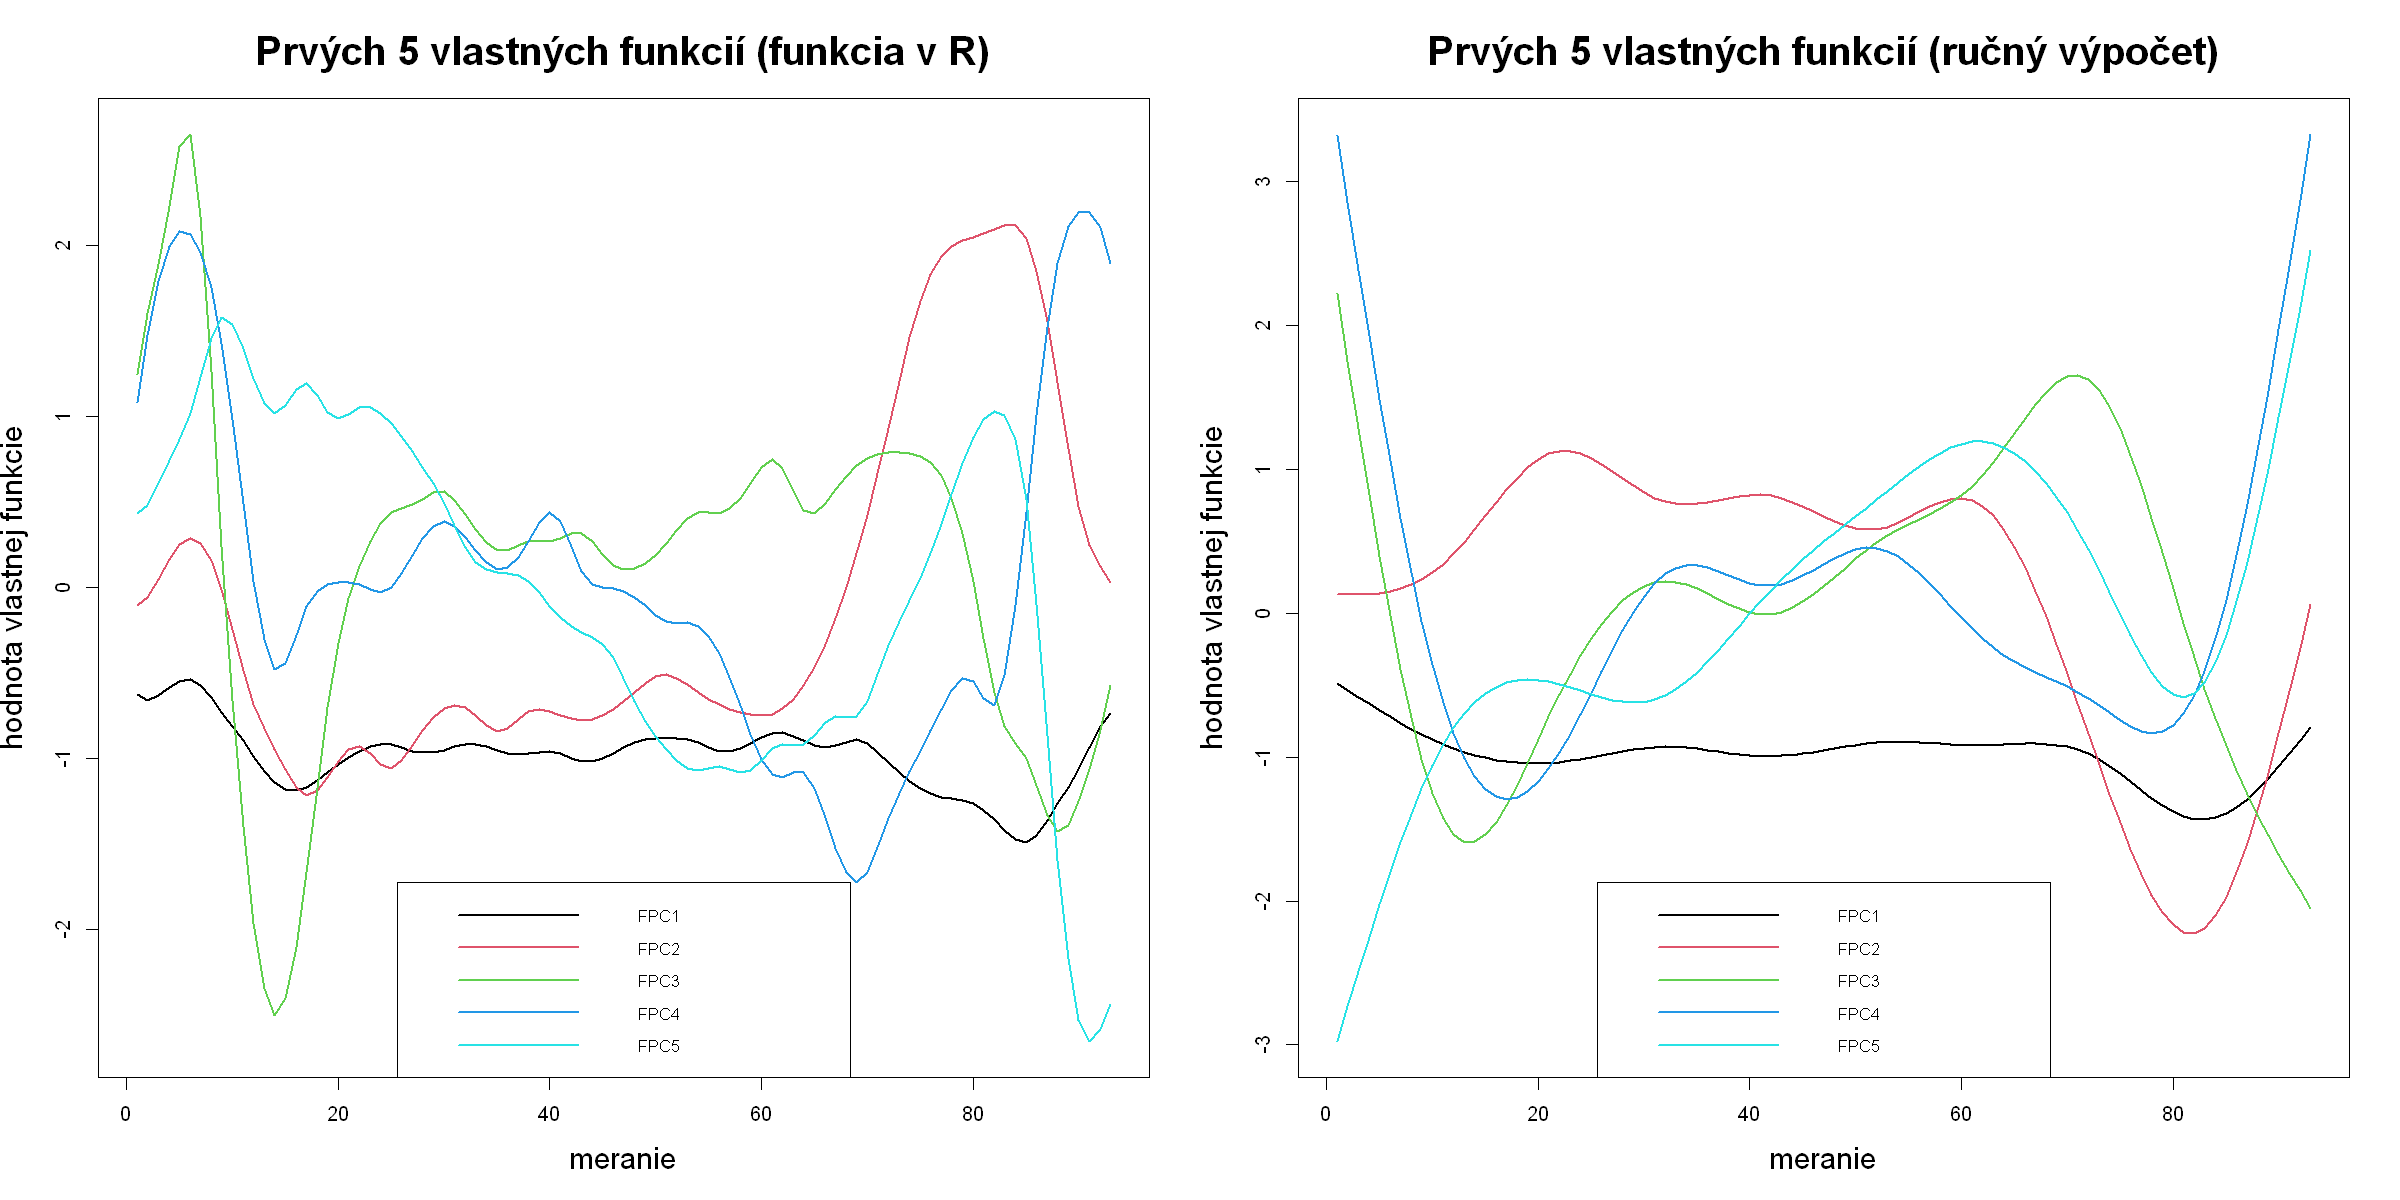

In [49]:
res.face <- fpca.face(Y = DTI.baseline$cca, argvals = meranie , pve = 0.95)

efn.face <- res.face$efunctions*sqrt(93)
eval.face <- res.face$evalues/93

options(repr.plot.width=20, repr.plot.height=10)
par(mfrow=c(1,2))

matplot(meranie, efn.face[,1:5], col=1:5, 
        type='l', lty=1, lwd=2,
        ylab="hodnota vlastnej funkcie", xlab="meranie",
        main="Prvých 5 vlastných funkcií (funkcia v R)", cex.main=2, cex.lab=1.5)
legend("bottom", lwd=2, lty=1, col=1:5, 
      legend = paste0("FPC", 1:5),cex=0.8)

matplot(meranie, efns[,1:5], col=1:5, 
        type='l', lty=1, lwd=2,
        ylab="hodnota vlastnej funkcie", xlab="meranie",
        main="Prvých 5 vlastných funkcií (ručný výpočet)", cex.main=2, cex.lab=1.5)
legend("bottom", lwd=2, lty=1, col=1:5, 
      legend = paste0("FPC", 1:5),cex=0.8)

Z grafov môžeme vidieť, že nami vyrátané vlastné funkcie (graf napravo) sú hladšie, ako vlastné funkcie vyrátané pomocou fukcie v R. Rozdiel spôsobuje rozdielny prístup k vyhladeniu pôvodných dát. Stačí, ak na začiatku pri ručnom rátaní uvedieme iný počet funkcií v báze pri vyhladzovaní kriviek. Taktiež niekoré vlastné funkcie majú prevrátené hodnoty, čo je tiež v poriadku.

Účinok každého komponentu môžeme vyzualizovať pomocou vzťahu 
$\mu(t) \pm 2\sqrt{\lambda_k}\phi_k(t).$

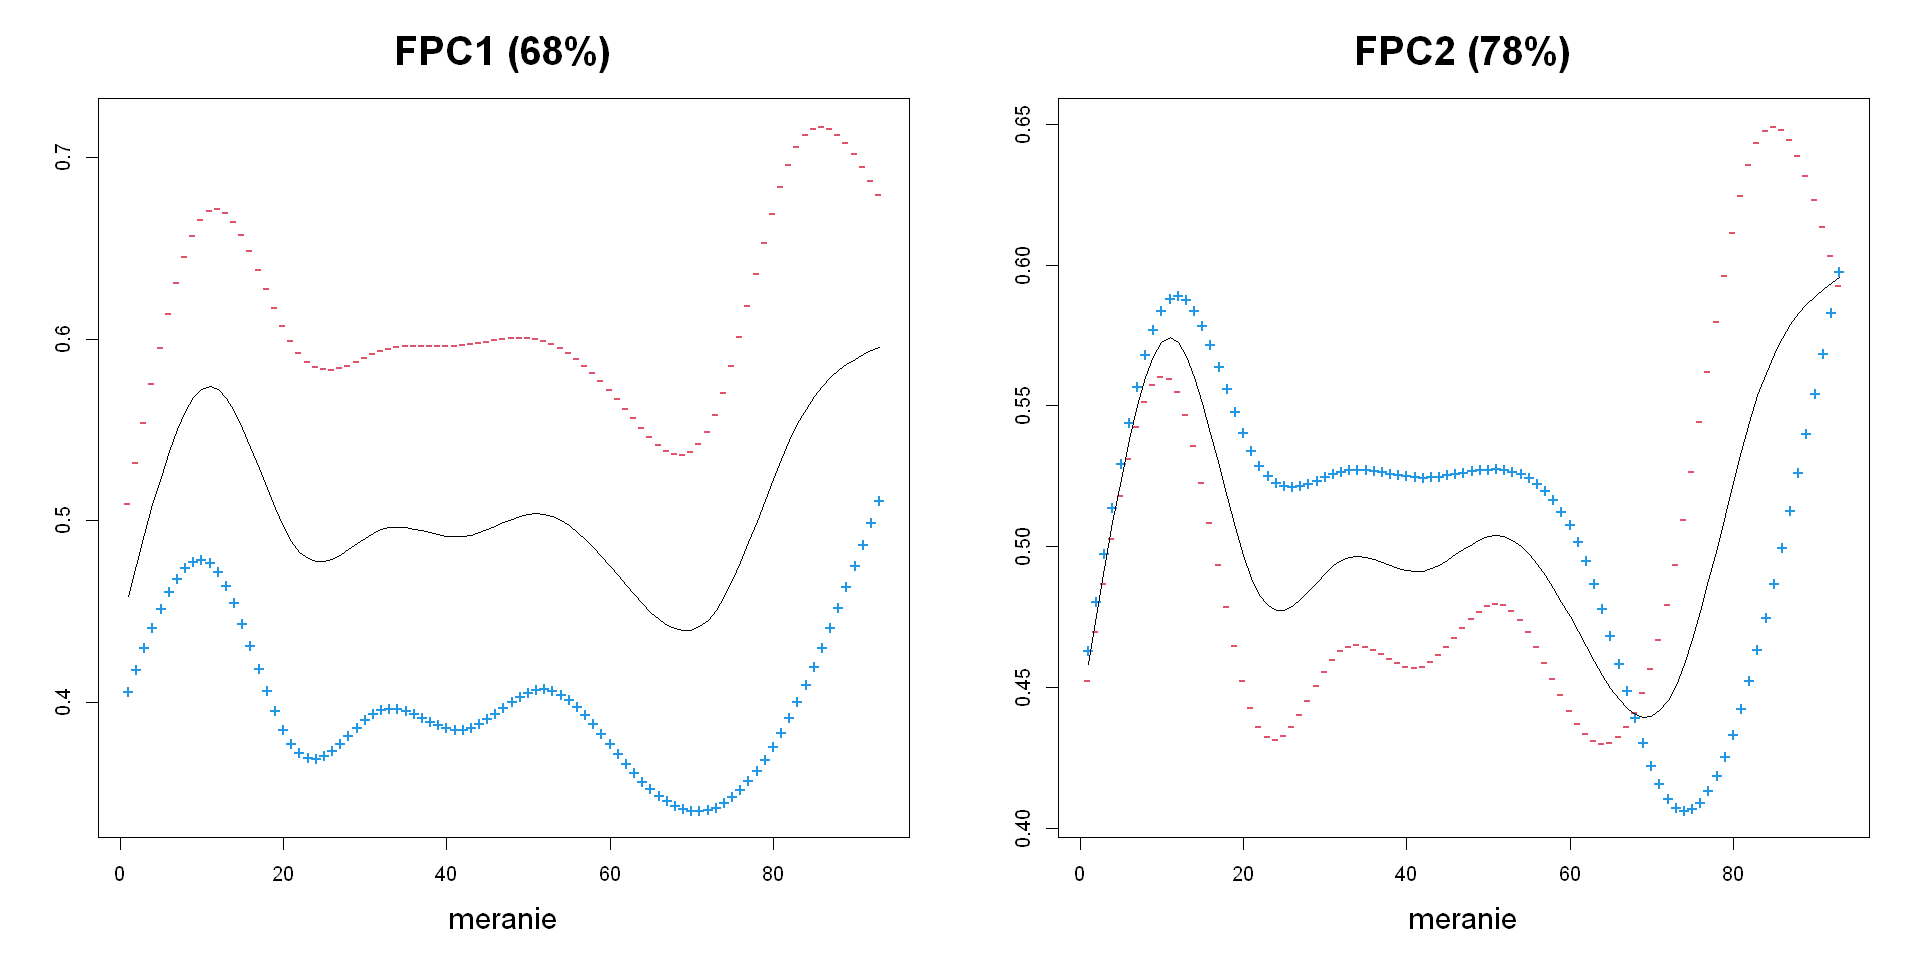

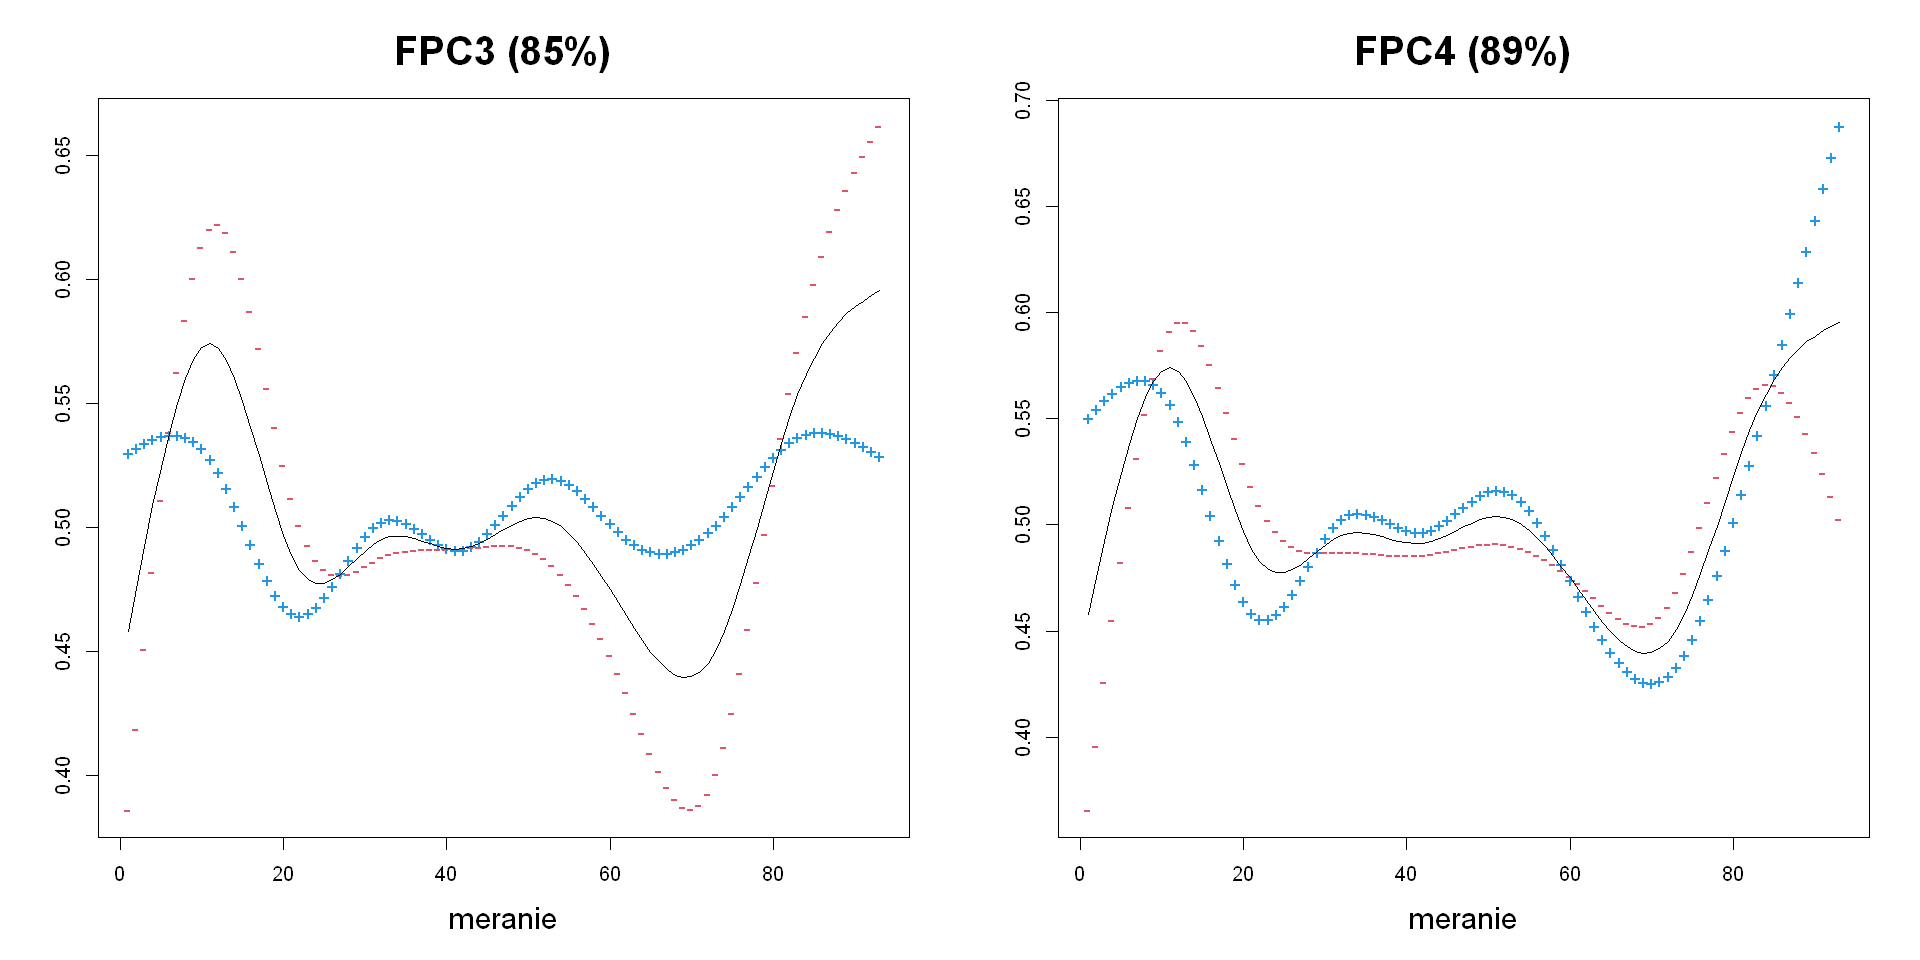

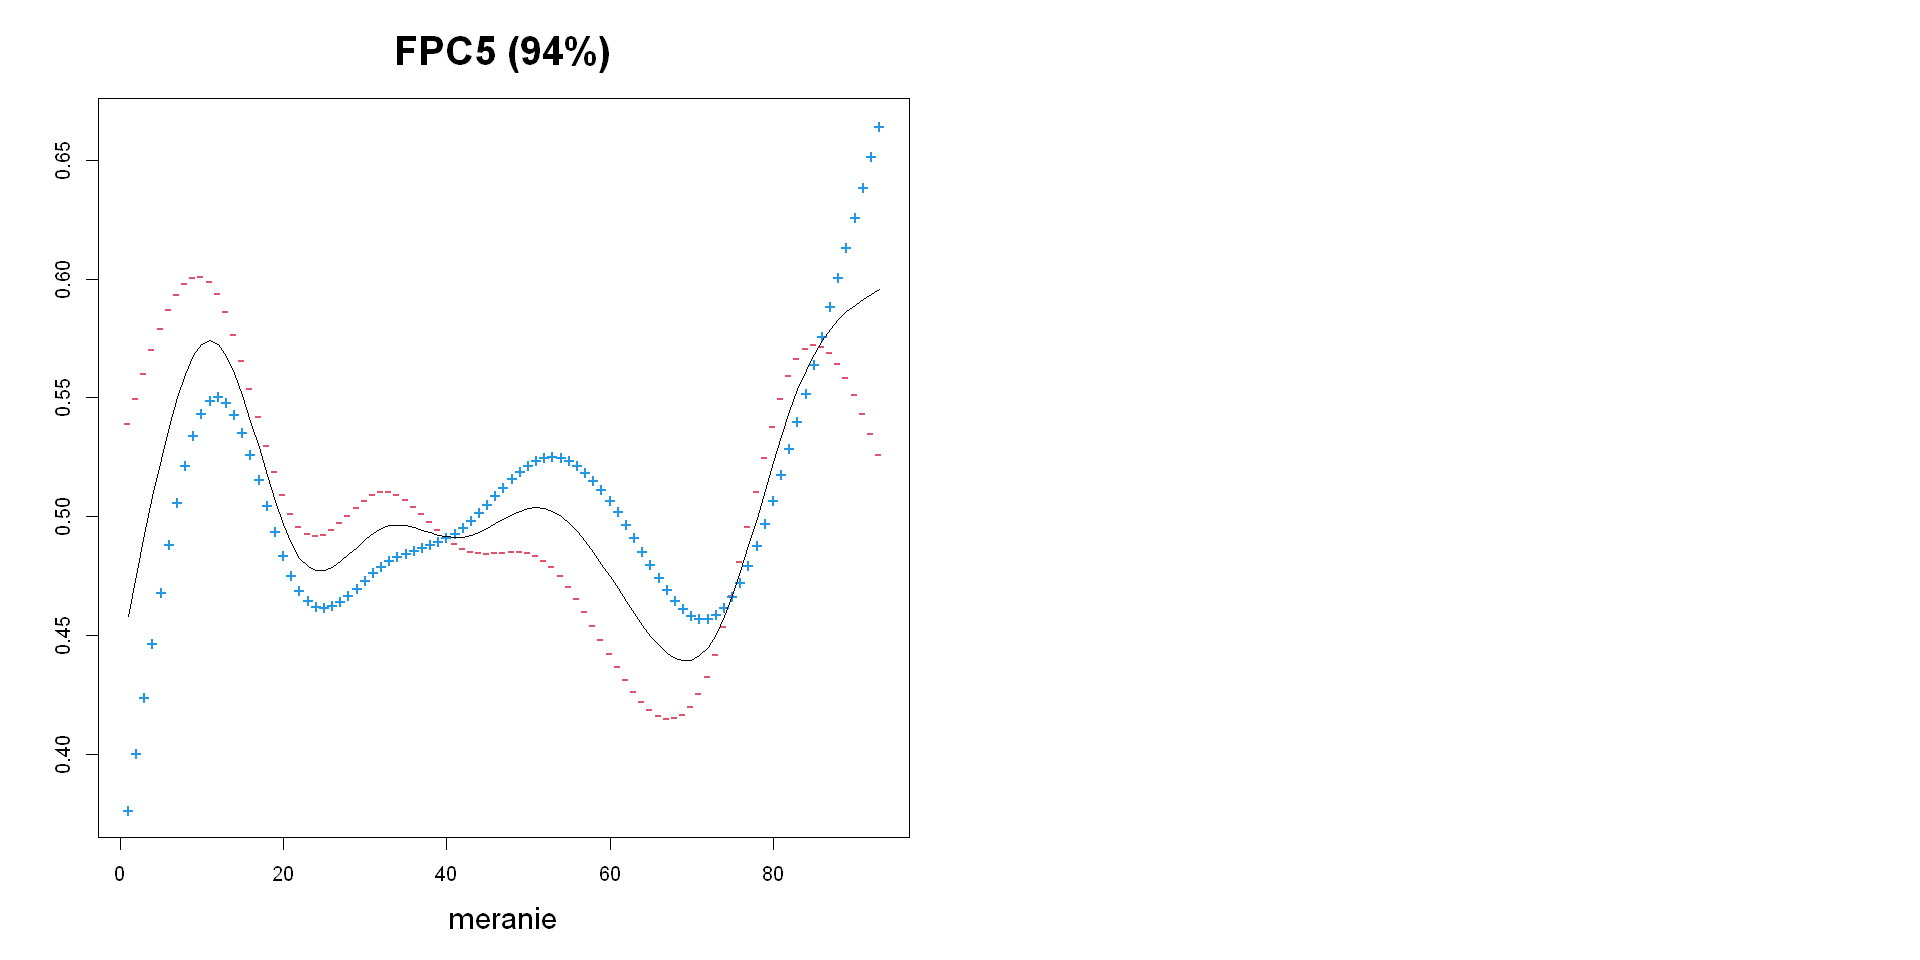

In [50]:
par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=8)

for (i in 1:5){
k.pc <- i
effect <- efns[, k.pc]*2*sqrt(evals[k.pc])
mat <- cbind(mean.hat - effect,  mean.hat + effect)

matplot(meranie, mat, type='p', col=c(2,4), pch = c("-", "+"),
        ylab="", xlab="meranie", 
        main = paste0("FPC",k.pc, " (",round(pve[k.pc]*100),"%)"), cex.main=2, cex.lab=1.55)
lines(meranie, mean.hat, lty=1, lwd=1)
    }

* Prvý komponent ukazuje, že dáva do kontrastu ľudí, ktorí majú nízke a vysoké namerané hodnoty, teda ukazuje všeobecnú úroveň. 


* Druhý komponent dáva do kontrastu ľudí, ktorý majú medzi desiatym a sedemdesiatym meraním nadpriemerne namerané hodnoty a medzi sedemdesiatym a posledným meraním pod priemerné hodnoty a naopak. 


* Tretí komponent dáva do kontrastu ľudí, ktorí majú počatočné aj koncové hodnoty podhodnotené a zvyšné hodnoty mierne nadhodnotené vzhľadom na priemer a naopak.


* Zvyšné koponenty sa už ťažšie interpretujú aj vzhľadom na povahu dát. Avšak interpretácia je viacmenej podobná.


Treba podotknúť, že interpretácia výsledkov dát tohto (medicínskeho) typu je pre laikov pomerne náročná, ale v konečnom dôsledku to ani nebolo našim cieľom. Cieľom vŠak bolo ukázať, že metóda FPCA je aplikovateľná aj pre nematematický typ dát, ktorý nám ukáže rozumné výsledky, hoci im nemusíme do hĺbky rozumieť. 

Medzi ďalšie grafy, ktoré nám pomáhajú interpretovať výsledky sú grafy skóre komponentov. Tieto grafy ukazujú, ako sú pozorované jednotky (v našom prípade sledovaní ľudia) rozmiestnené vzhľadom na hodnoty skóre rôznych vysvetľujúcich komponentov.  

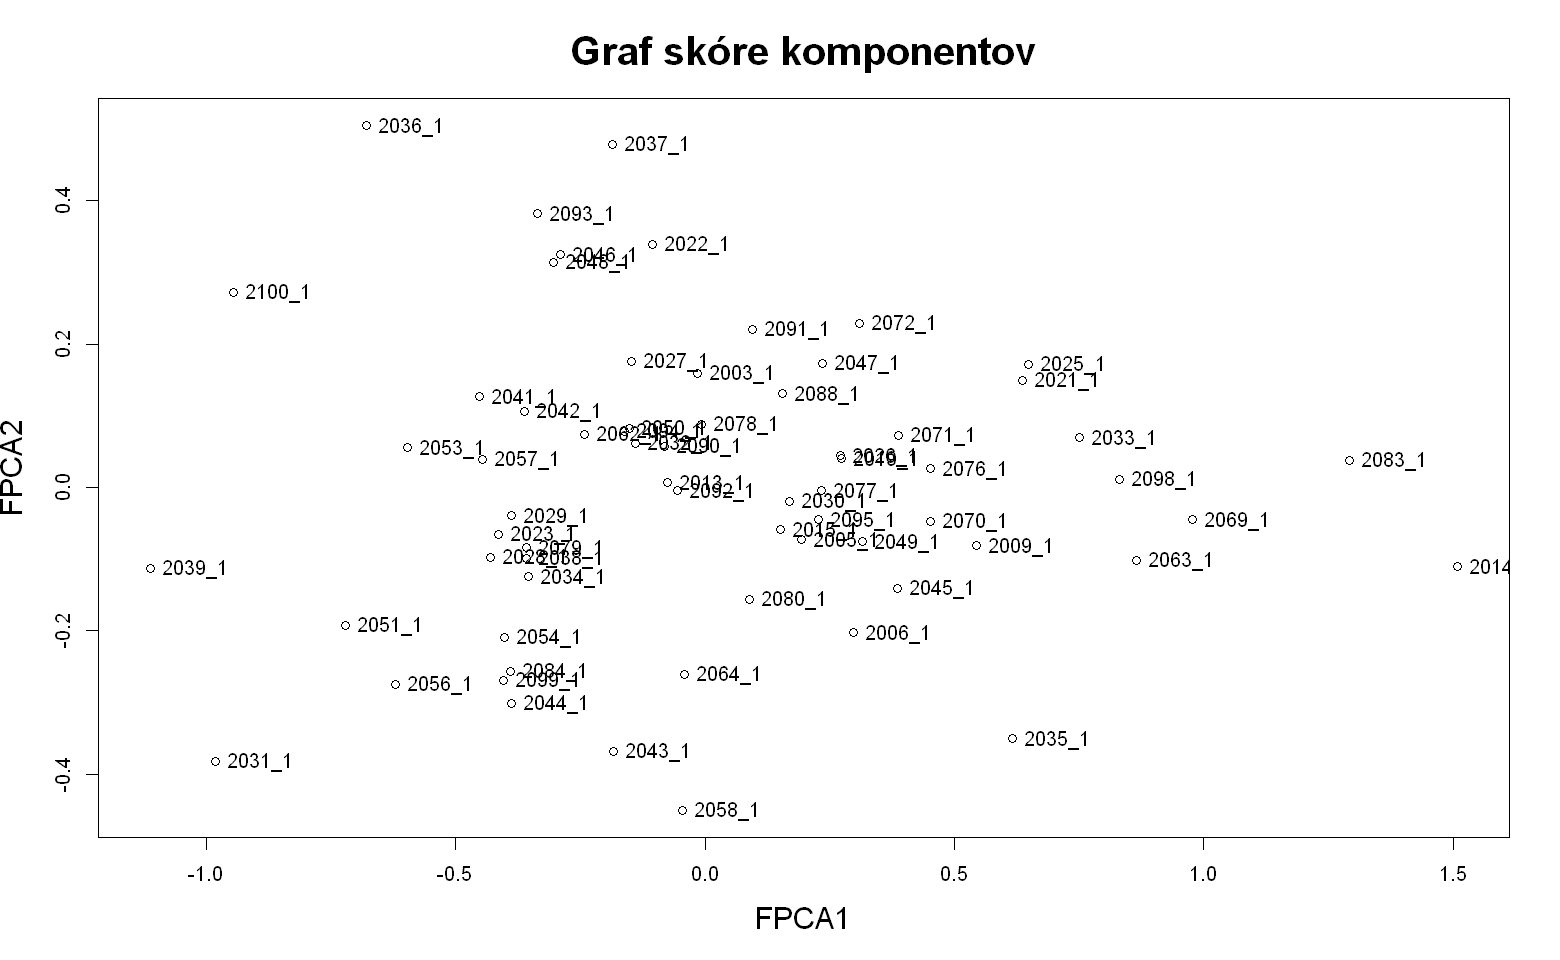

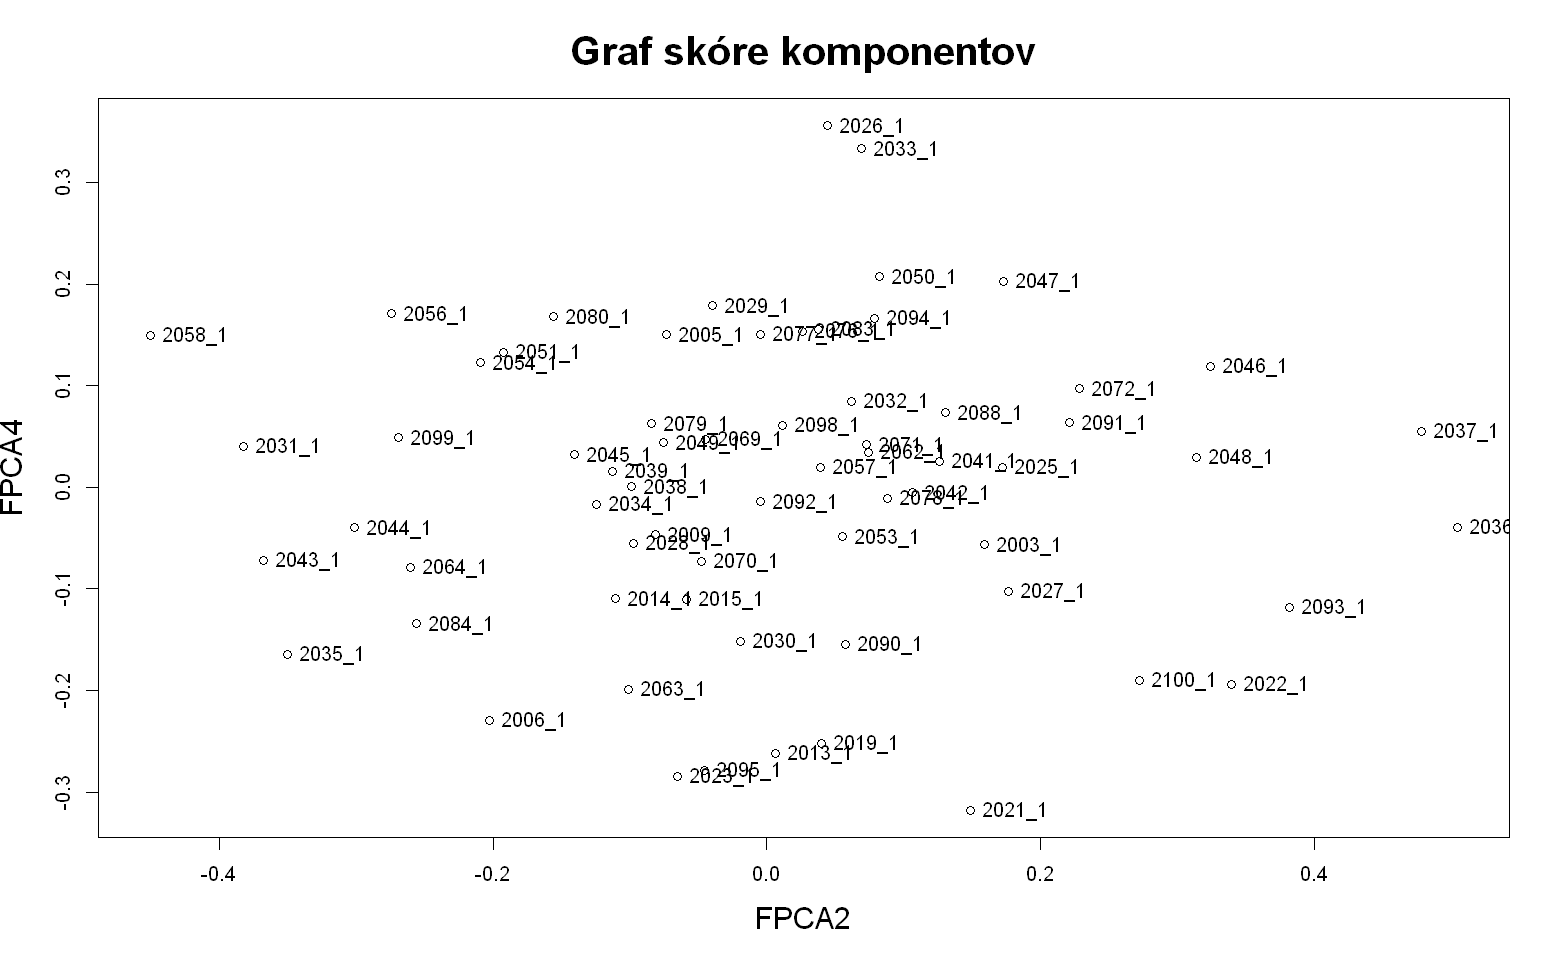

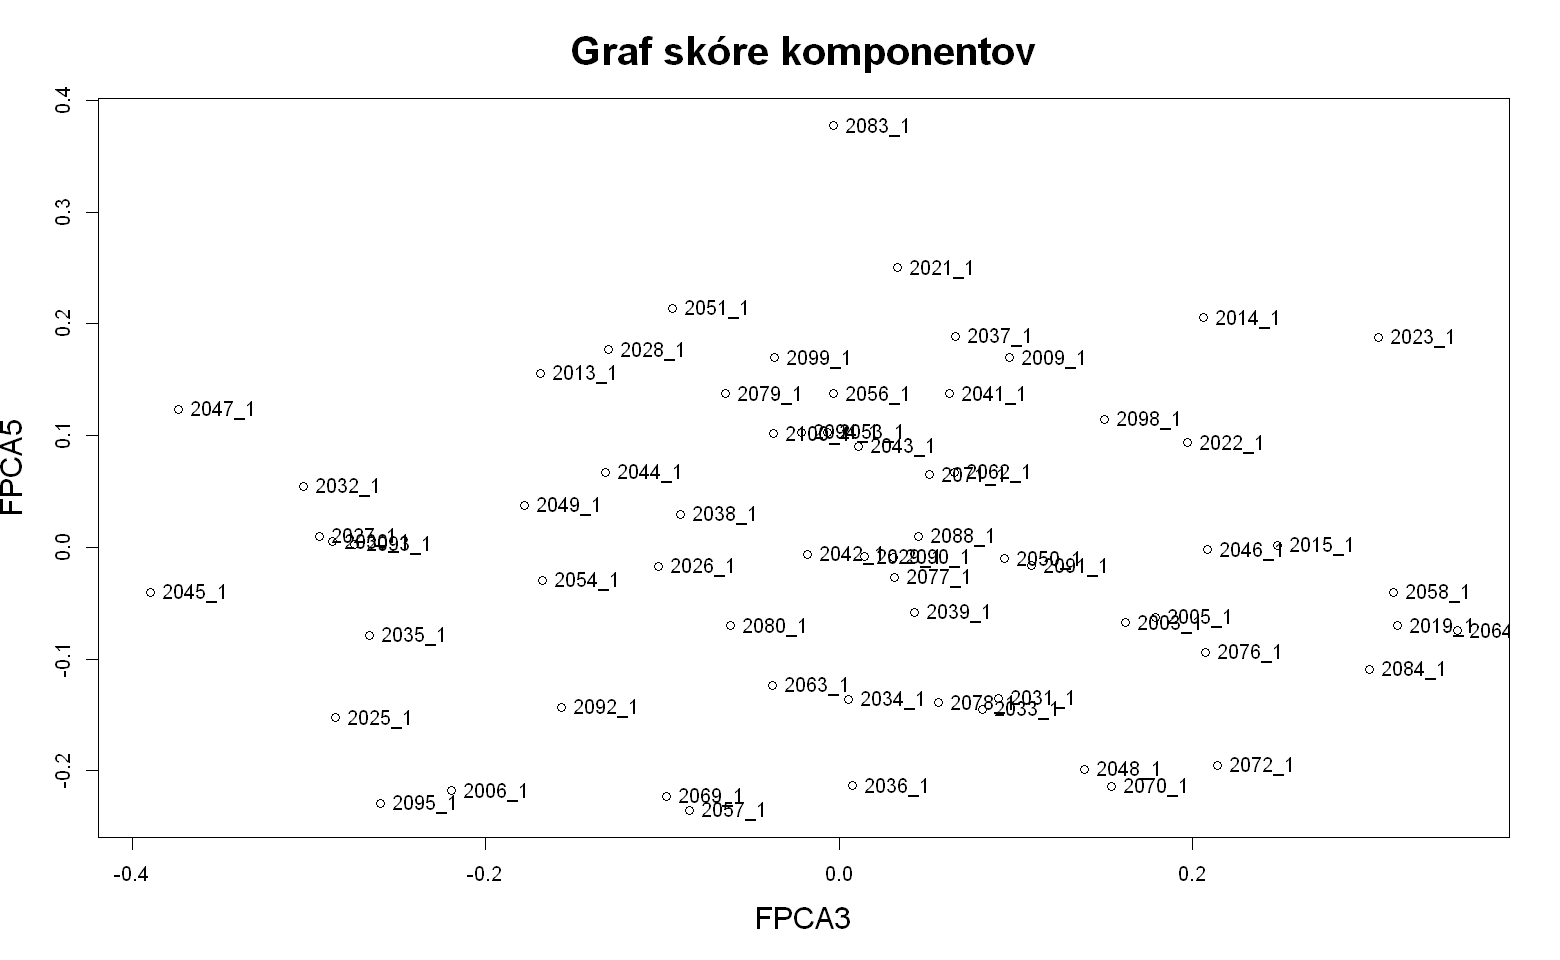

In [51]:
options(repr.plot.width=13, repr.plot.height=8)
plot(res.face$scores[,1],res.face$scores[,2], xlab="FPCA1", ylab="FPCA2", main="Graf skóre komponentov", 
     cex.main=2, cex.lab=1.5)
text(res.face$scores[,1],res.face$scores[,2],rownames(res.face$scores),pos=4)

plot(res.face$scores[,2],res.face$scores[,4], xlab="FPCA2", ylab="FPCA4", main="Graf skóre komponentov", 
     cex.main=2, cex.lab=1.5)
text(res.face$scores[,2],res.face$scores[,4],rownames(res.face$scores),pos=4)

plot(res.face$scores[,3],res.face$scores[,5], xlab="FPCA3", ylab="FPCA5", main="Graf skóre komponentov", 
     cex.main=2, cex.lab=1.5)
text(res.face$scores[,3],res.face$scores[,5],rownames(res.face$scores),pos=4)

* Ak by sme si vykreslili krivky zodpovedajúde ID: 2014, 2083, 2031 a 2039 tak vidíme, že krivky s najvyšším skóre pre prvý komponent sú pomerne kontinuálne pod priemerom a tiež krivky s najnižším skóre pre prvý komponent sú pomerne kontinuálne nad priemerom. Čo zodpovedá všeobecnej úrovne. Tento záver nám potvrdzuje aj vyššie uvedený účinok prvej vlastnej funkcie na priemer.


* Ak by sme si vykreslili krivky zodpovedajúde ID: 2036, 2037, 2031 a 2058 tak vidíme, že krivky s najvyšším skóre pre druhý komponent sa až po meranie č. 70 nachádzajú pod krivkami s najnižším skóre pre druhý komponent. Tento fakt nám ukazuje aj graf účinku druhého komponentu. 


* Pre tretí komponent by nám vyšlo analogicky to isté, ako pre graf účinku pre tretí komponent. 

**<font size=5 color=darkblue> 3. FPCA pre neúplné dáta </font>** <br>

**<font size=4 color=darkblue> 3.1 Popis skúmaných dát </font>** <br>

V predchádzajúcej časti sme mali dáta, ktoré boli úplné v tom zmysle, že išlo o rovnako dlhé krivky s rovnakým počtom pozorovaní v každej krivke. Lenže takéto typu nie su všetky dáta. Nasledujúci dataset obsahuje krivky, ktoré majú rozdielny interval pozorovaní, čo aj uvidíme na grafe. 
Samotné dáta nám reprezentujú koncentráciu CD4 buniek (inak aj T-lymfocyty) v krvi u 283 HIV pozitívnych mužov sledovanými medzi rokmi 1984 až 1991, ktorú sledujeme vzhľadom na sérokonverziu (https://en.wikipedia.org/wiki/Seroconversion). 

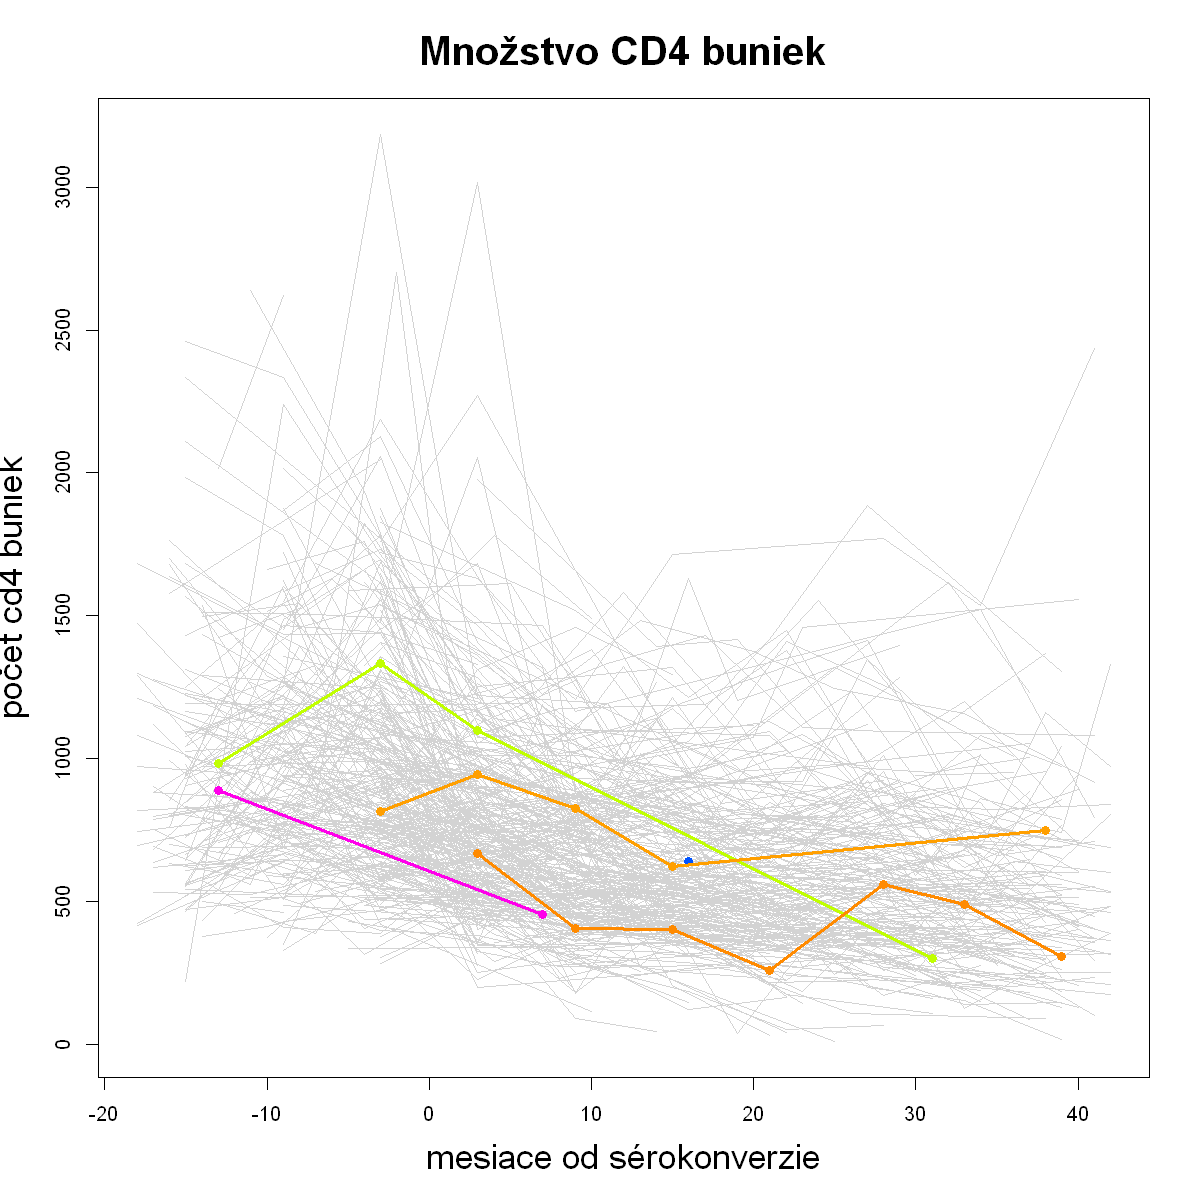

In [52]:
library(refund)
data(cd4)
n <- nrow(cd4)
month <- as.numeric(colnames(cd4)) 
m <- ncol(cd4)

# vykreslime si teraz nahodne vybrate krivky so zvysnimi krivkami v pozadi
options(repr.plot.width=10, repr.plot.height=10)

matplot(month, t(cd4), type='n', 
        main="Množstvo CD4 buniek", ylab="počet cd4 buniek", 
        xlab="mesiace od sérokonverzie" , cex.main=2, cex.lab=1.75)
for(irow in 1:n){
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
    lines(temp$x, temp$y, col="light grey")
}

set.seed(9425)
n.crv <- 5
sel.crv <- sample(1:n, size = n.crv, replace = FALSE)

for(i in 1:n.crv){
  irow <- sel.crv[i]
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  points(temp$x, temp$y, col=rainbow(n)[sel.crv[i]], pch = 16, cex=1)
  lines(temp$x, temp$y, col=rainbow(n)[sel.crv[i]], lwd=3)
}

**<font size=4 color=darkblue> 3.2 Implementácia FPCA a interpretácia výsledkov </font>** <br>

Pre FPCA je podstatné určenie funkcie priemeru z vyhladených kriviek. Pre tento typ dát to bude trochu komplikovanejšie, ako môžeme vidieť v prvých riadkoch kódu. Vyhladíme dáta, ktoré následne použijeme do predikcie funkcie priemeru vyhladených kriviek. Ďalej už použijeme funkcie, ktoré nám program R ponúka na výpočty.


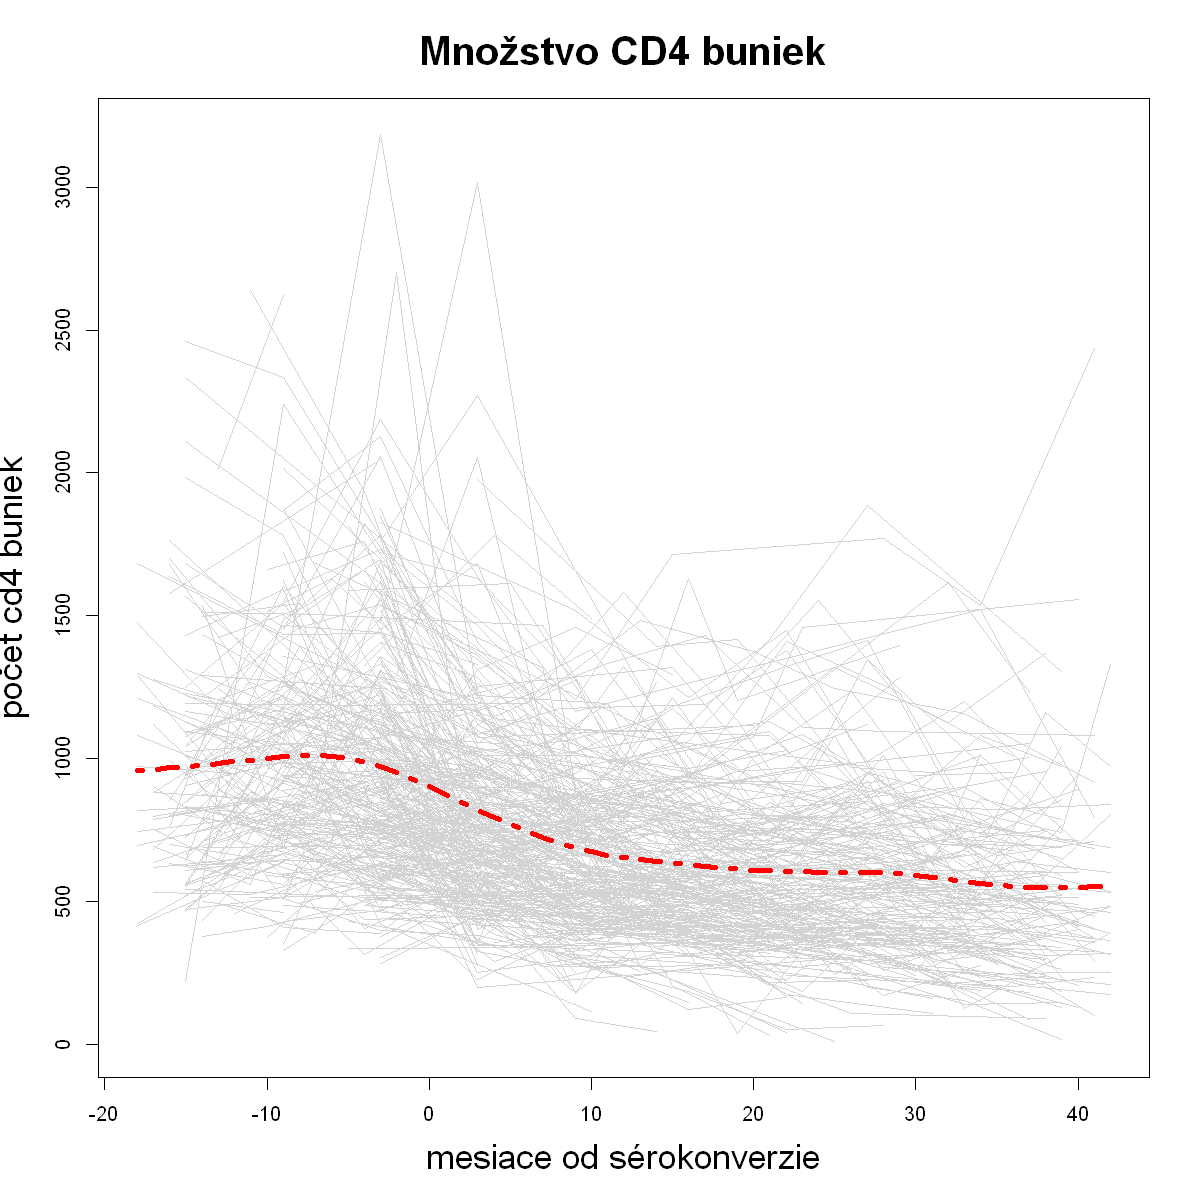

In [53]:
library(mgcv)

dat.vec <- data.frame(na.omit(cbind(rep(1:n, each = length(month)), 
                                        rep(month, n), as.vector(t(cd4)))))
colnames(dat.vec) <- c("id", "t","y")
# kvoli krivke priemeru, si vyhladime povodne krivky, ktore potom pouzijeme do predikcie krivky priemeru
fit <- gam(y ~ s(t, k = 10, bs = "cr"), method="REML", data = dat.vec)
mean.hat <- predict(fit, newdata = data.frame("t" = month))

# vykreslenie grafu 
options(repr.plot.width=10, repr.plot.height=10)

matplot(month, t(cd4), type='n', 
        main="Množstvo CD4 buniek", ylab="počet cd4 buniek", 
        xlab="mesiace od sérokonverzie", cex.main=2, cex.lab=1.75)
for(irow in 1:n){
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  lines(temp$x, temp$y, col="light grey")
}
lines(month, mean.hat, type='l', lwd=4, lty=4, col='red')

Taktiež si vykreslíme niekoľko (prvých) vlastných funkcií. Ich interpretácia je obtiažna (ako platí vo všeobecnosti). Prvá môže popisovať funkciu priemeru. Druhá vlastná funkcia môže popisovať ariabilitu od krivky priemeru.

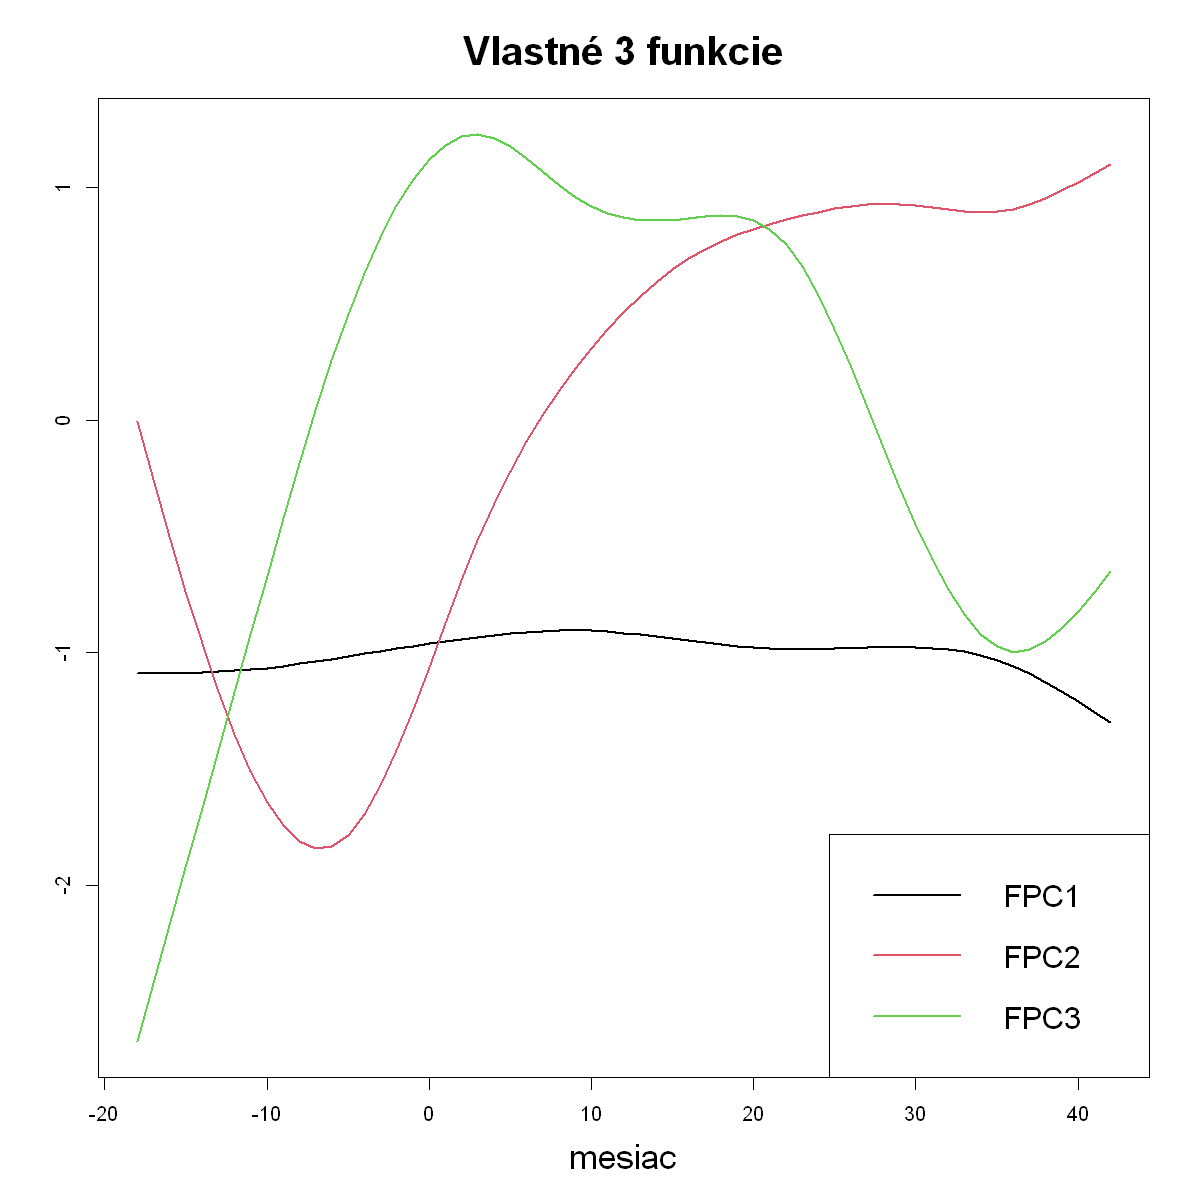

In [54]:
library(refund)

fpca.res <- fpca.sc(cd4, argvals = month, pve = 0.95, var = TRUE)
m <- length(month)
# skalovanie vektorov a hodnot 
efns <- fpca.res$efunctions*sqrt(m)
evals <- fpca.res$evalues/m
pve <- cumsum(evals)/sum(evals)

options(repr.plot.width=10, repr.plot.height=10)
matplot(month, efns, type='l', lwd=2, lty=1, 
        ylab="", xlab="mesiac", main=paste0("Vlastné ",fpca.res$npc, " funkcie"), cex.main=2, cex.lab=1.75)
legend("bottomright", lwd=2, lty=1, col=1:fpca.res$npc, 
      legend = paste0("FPC", 1:fpca.res$npc), cex=1.5)

Na ilustráciu môžeme vykresliť aj grafy účinku jednotlivých vlastných funkcií na krivku priemeru.

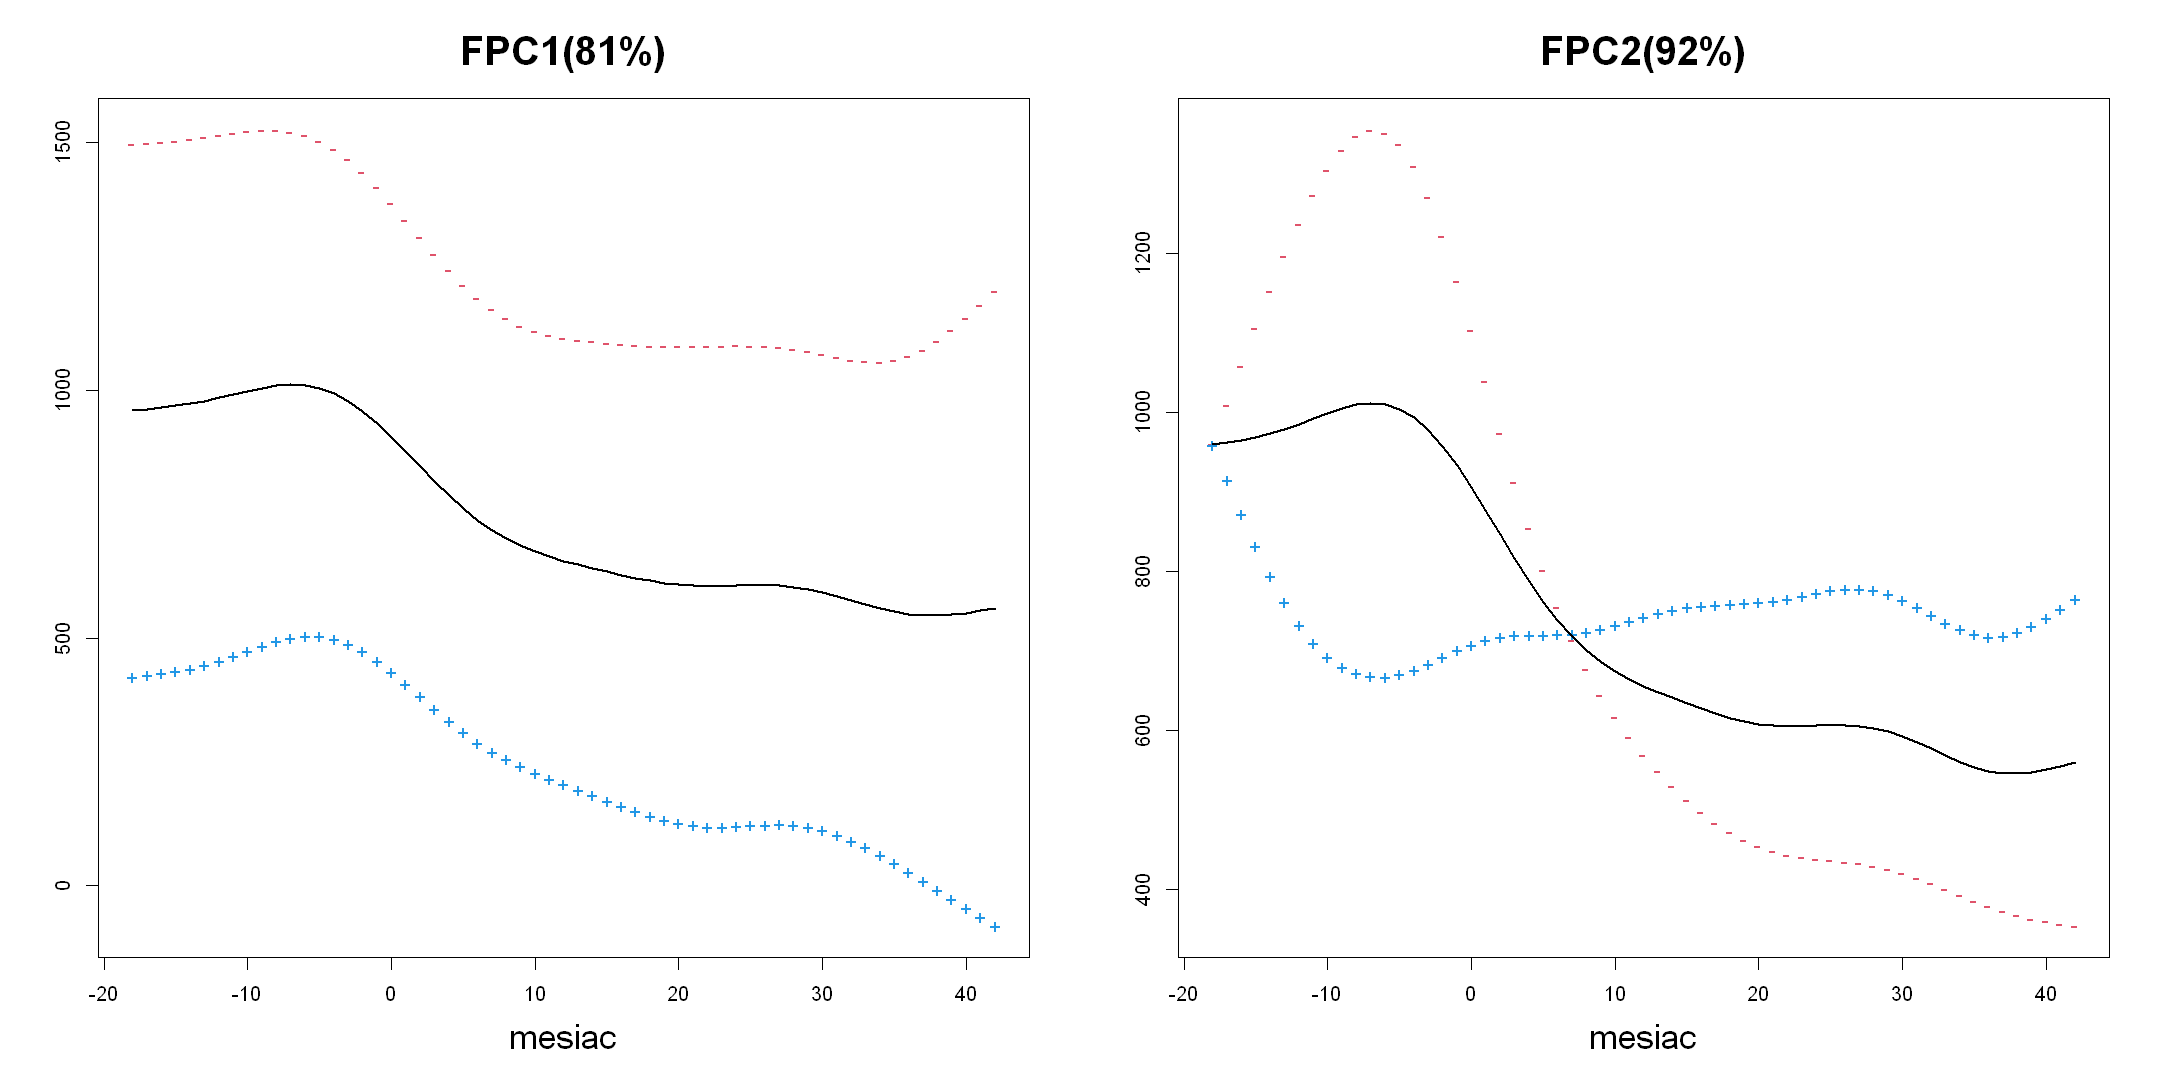

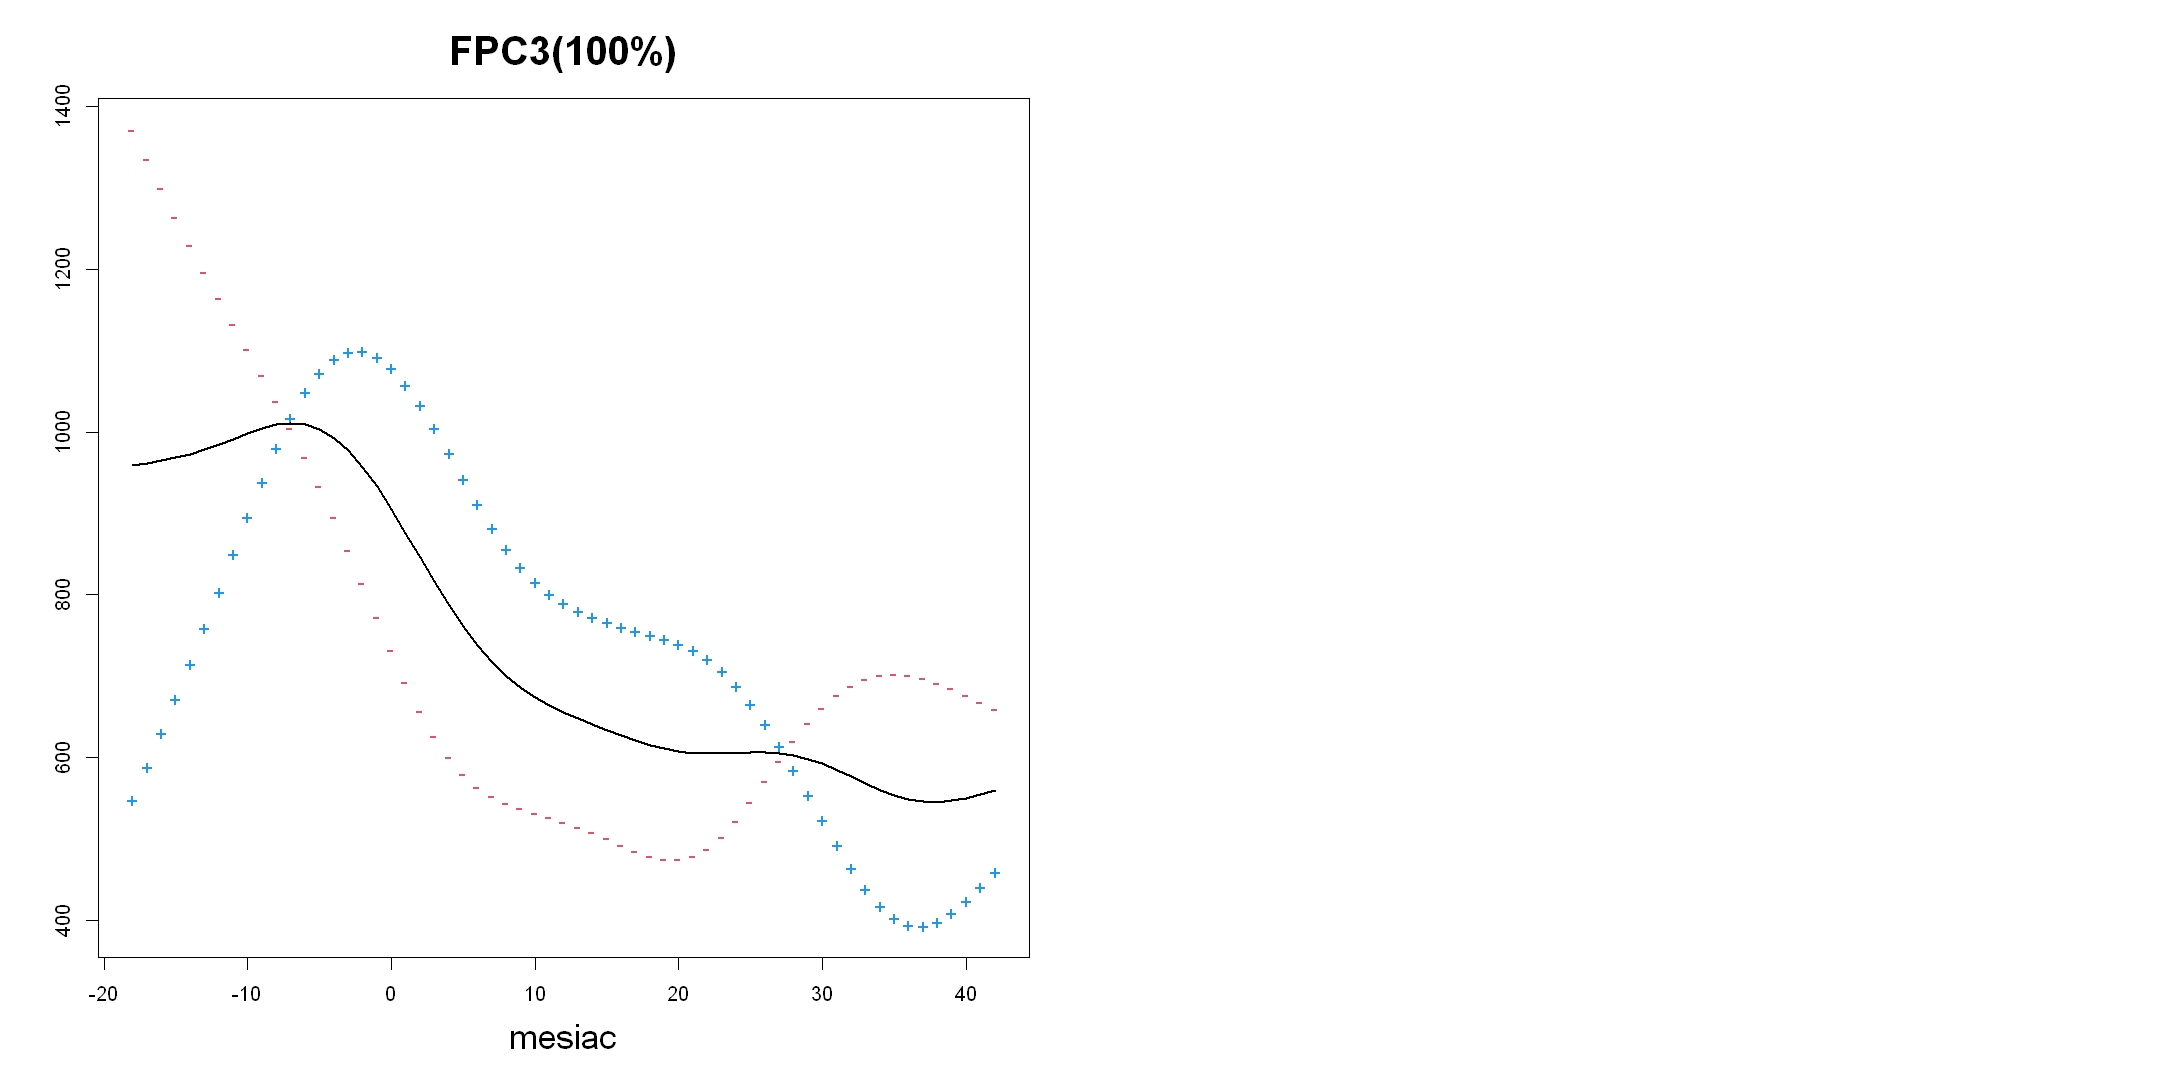

In [55]:
options(repr.plot.width=18, repr.plot.height=9)
par(mfrow=c(1,2))

for ( i in 1:3) {
k.pc <- i
mean.hat <- fpca.res$mu
effect <- 2*sqrt(evals[k.pc])*efns[,k.pc]

matplot(month, cbind(mean.hat-effect, mean.hat+effect),
        pch = c("-", "+"), col = c(2,4),
        ylab="", xlab="mesiac", main=paste0("FPC", k.pc,"(", round(pve[k.pc]*100) ,"%)"),cex.main=2, cex.lab=1.75, lwd=4)
lines(month, mean.hat, type='l', lwd=2)  
} 

* Prvý komponent popisuje dáta vo všeobecnej rovine. Zároveň popisuje až 81% variability.


* Druhý komponent delí dáta na dve časti, kde do zhruba 8 mesiaca sú dáta pod priemerom a ďalej sú nadpriemerné a naopak. Zároveň s druhým komponentom máme vysvetlených 92% variability.


* Tretí komponent dáva do kontrastu dáta, ktoré majú podpriemernú prvú a poslednú štvrtinu pozorovaní a zvyšné sú nadpriemerné a naopak. Zároveň prvý, druhý a tretí komponent nám vysvetlí už takmer 100% variability.

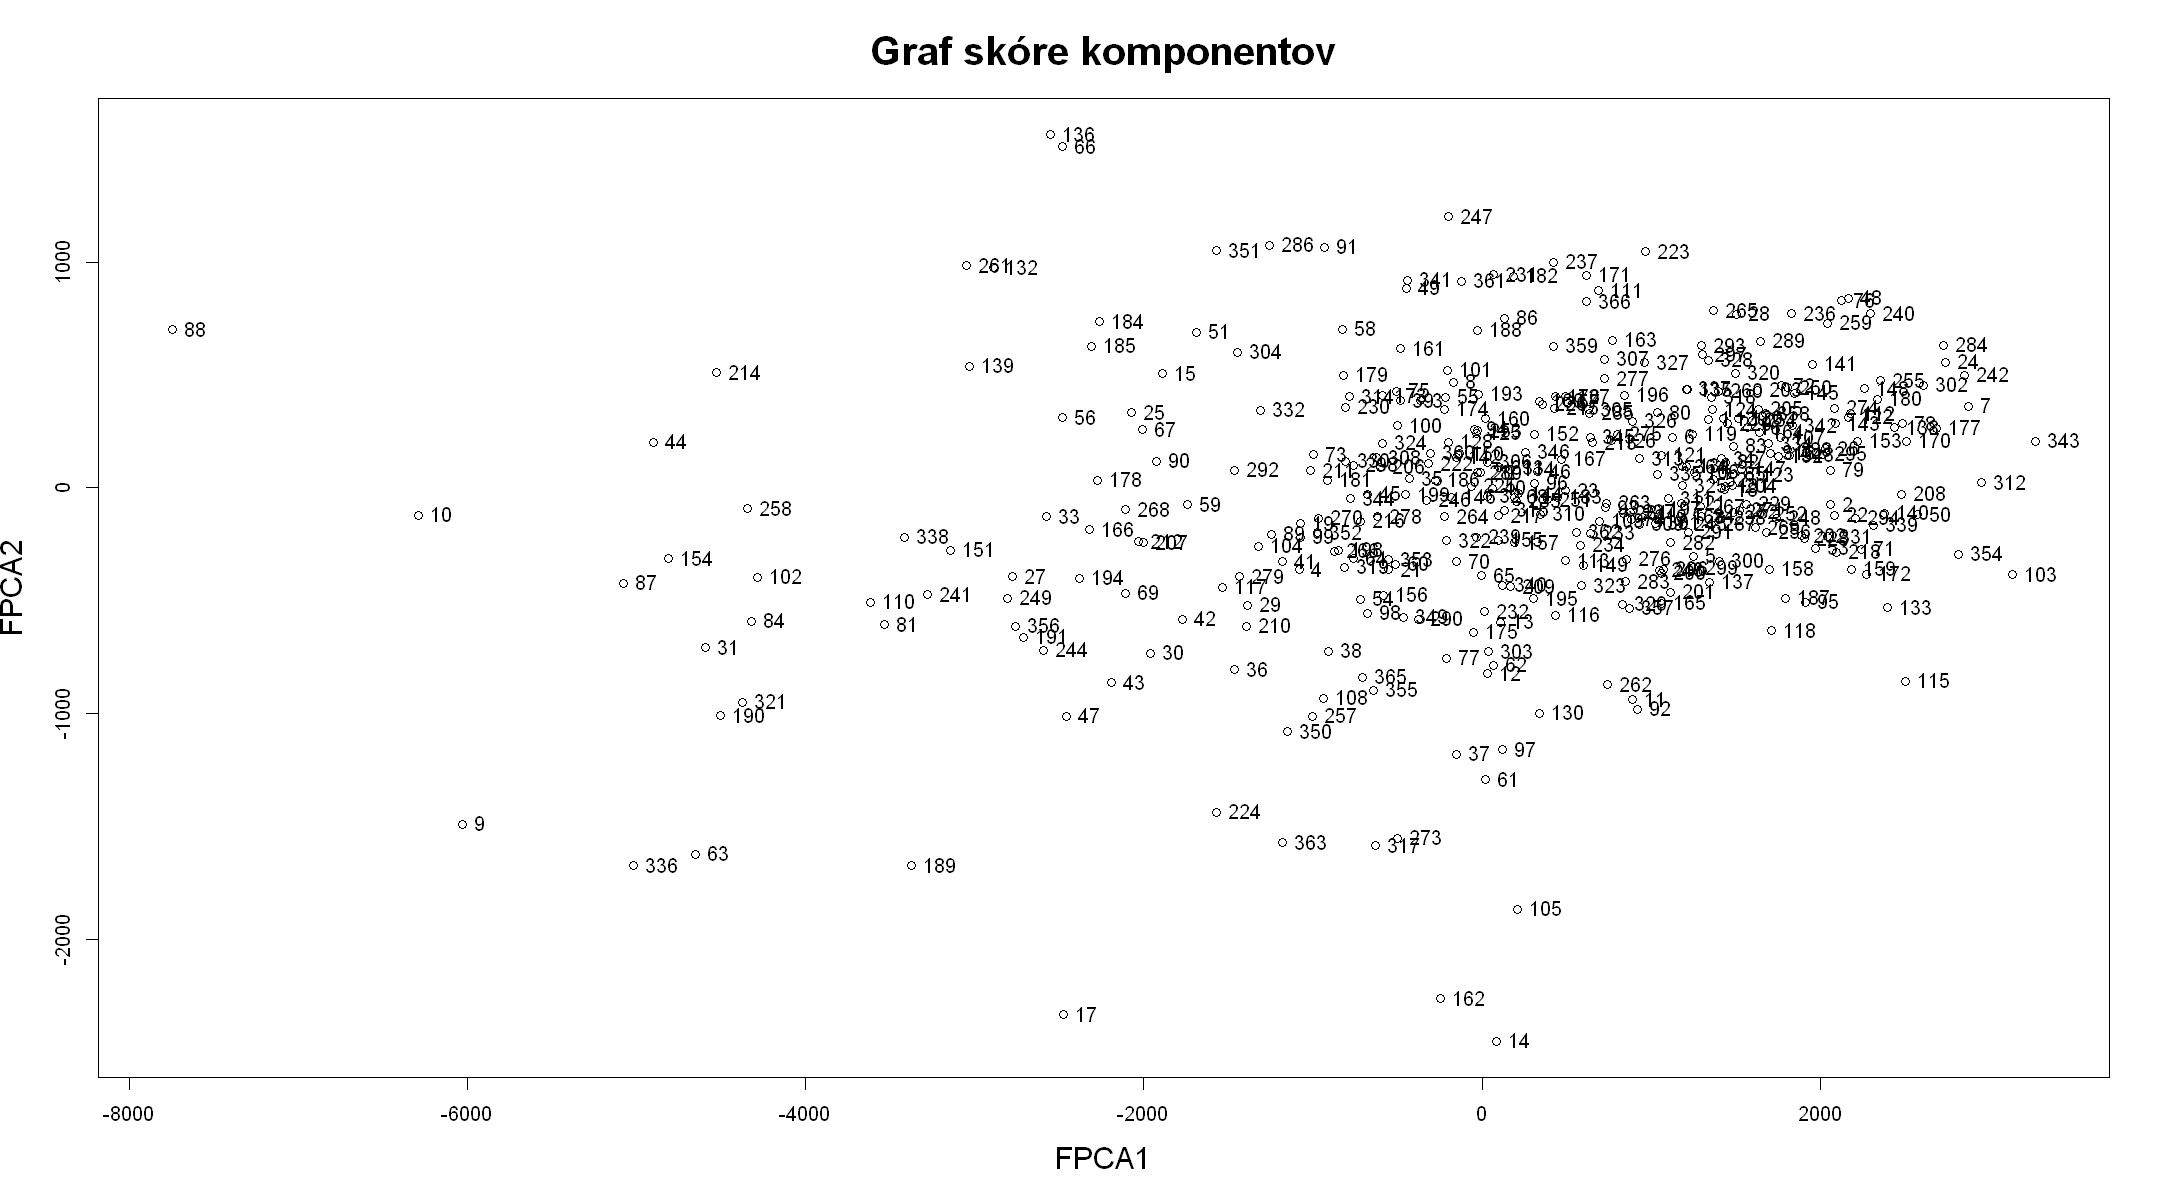

In [56]:
vektor<-1:366
rownames(fpca.res$scores)<-c(vektor)
options(repr.plot.width=18, repr.plot.height=10)
plot(fpca.res$scores, xlab="FPCA1", ylab="FPCA2", cex.lab=1.5, main="Graf skóre komponentov", cex.main=2)
text(fpca.res$scores[,1],fpca.res$scores[,2],rownames(fpca.res$scores),pos=4)

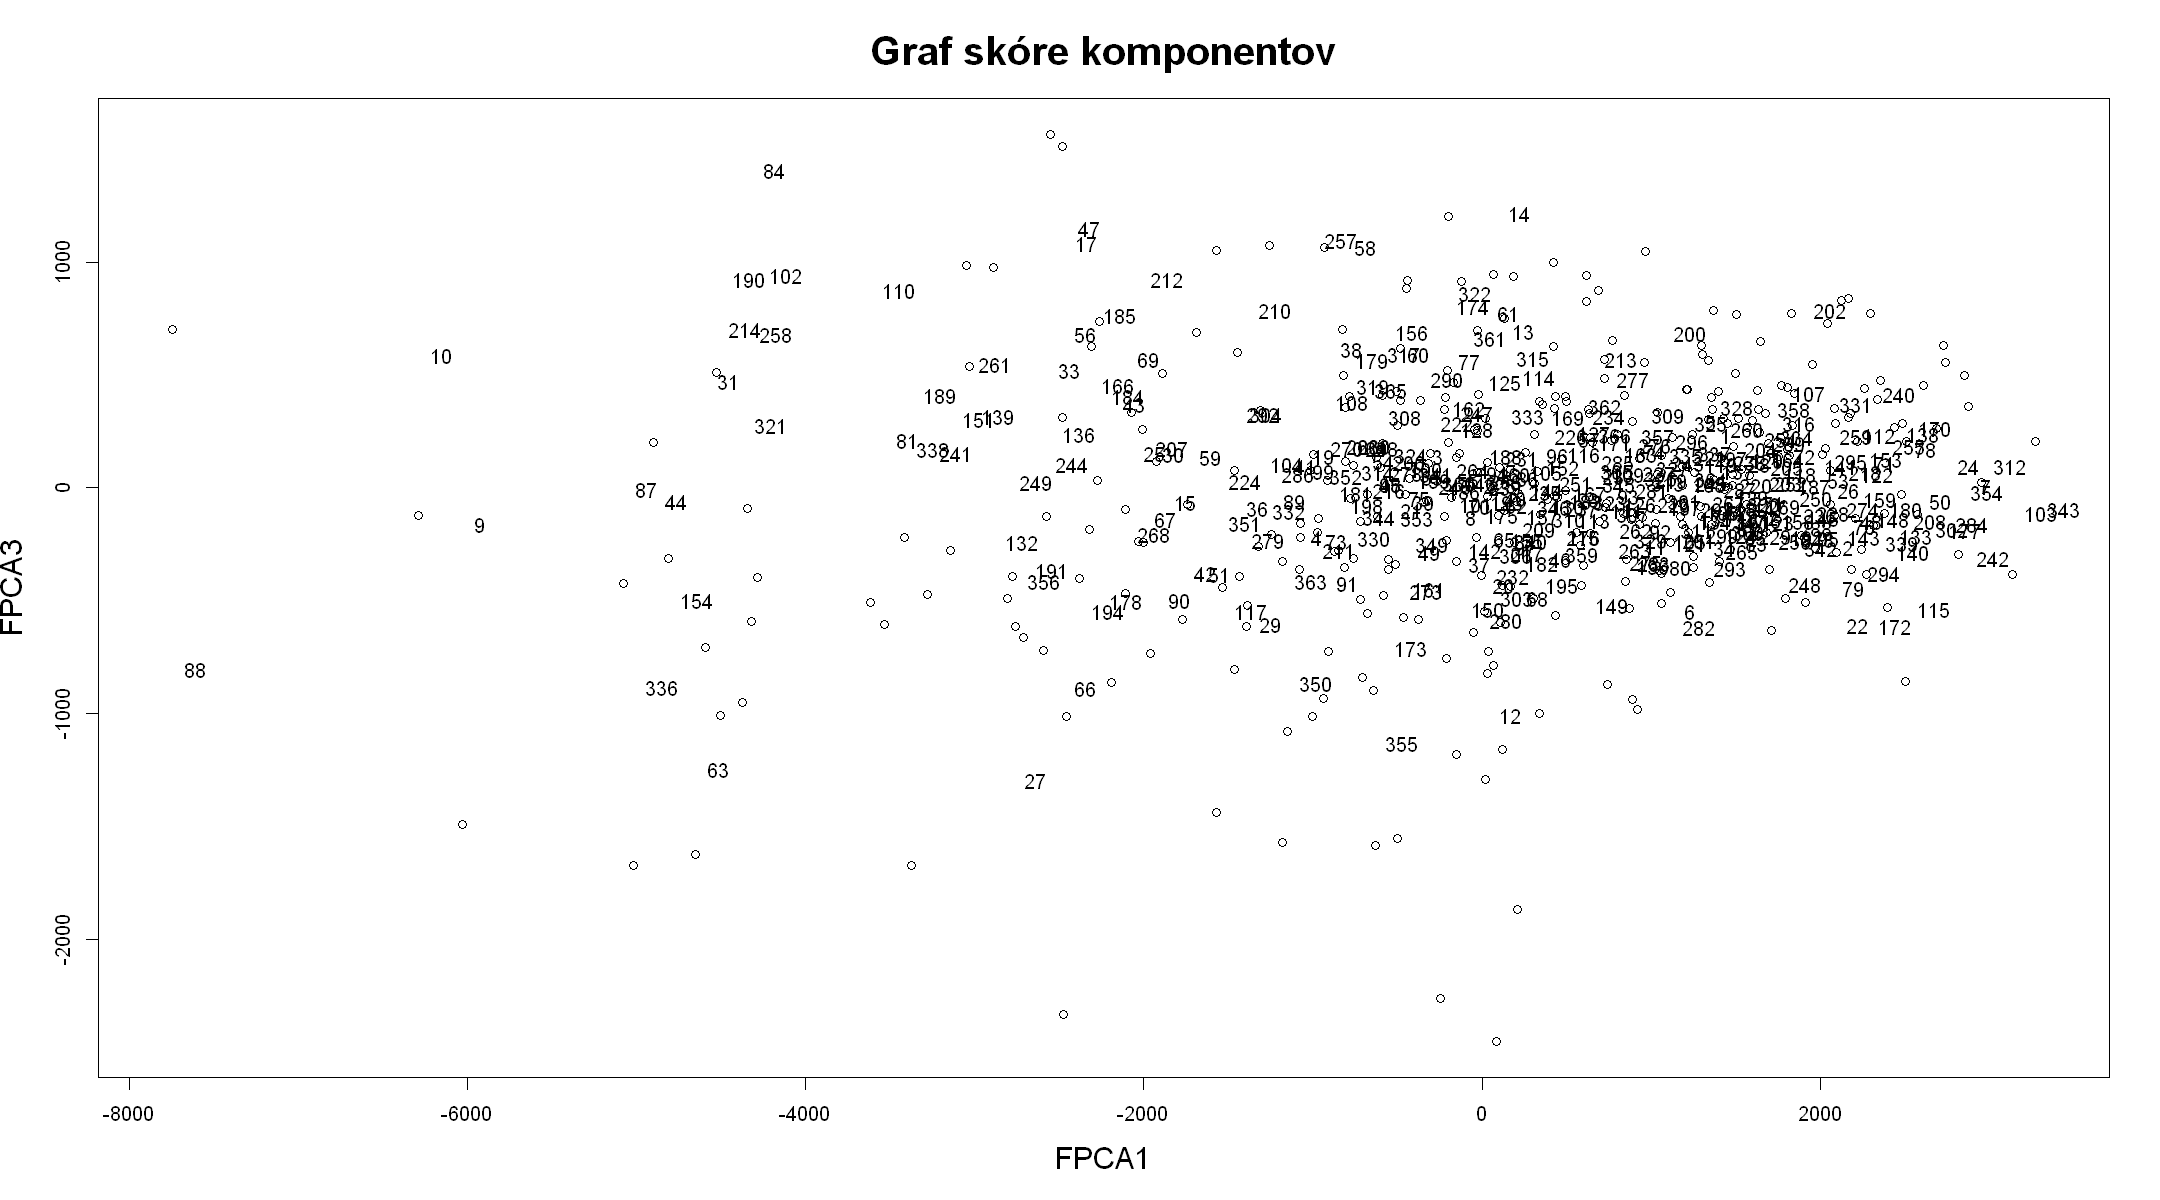

In [57]:
options(repr.plot.width=18, repr.plot.height=10)
plot(fpca.res$scores, xlab="FPCA1", ylab="FPCA3", cex.lab=1.5, main="Graf skóre komponentov", cex.main=2)
text(fpca.res$scores[,1],fpca.res$scores[,3],rownames(fpca.res$scores),pos=4)

Ak by sme si vykreslili krivky s najvyšším a najnižším skóre pre každý komponent a porovnali s krivkou priemeru, dostali by sme rovnakú interpretáciu, ako pri grafoch s účinkom vlastných funkcií na krivku priemeru. 

Pomocou odhadnutých vlastných funkcií a skóre môžeme tiež doplniť pôvodné krivky tak, aby mali rovnaký počet pozorovaní pomocou vzťahu $$\hat{Y}_i(t) = \hat{\mu}(t) + \sum_{k=1}^{npc}\hat{\xi}_ik\hat{\phi}_k(t).$$

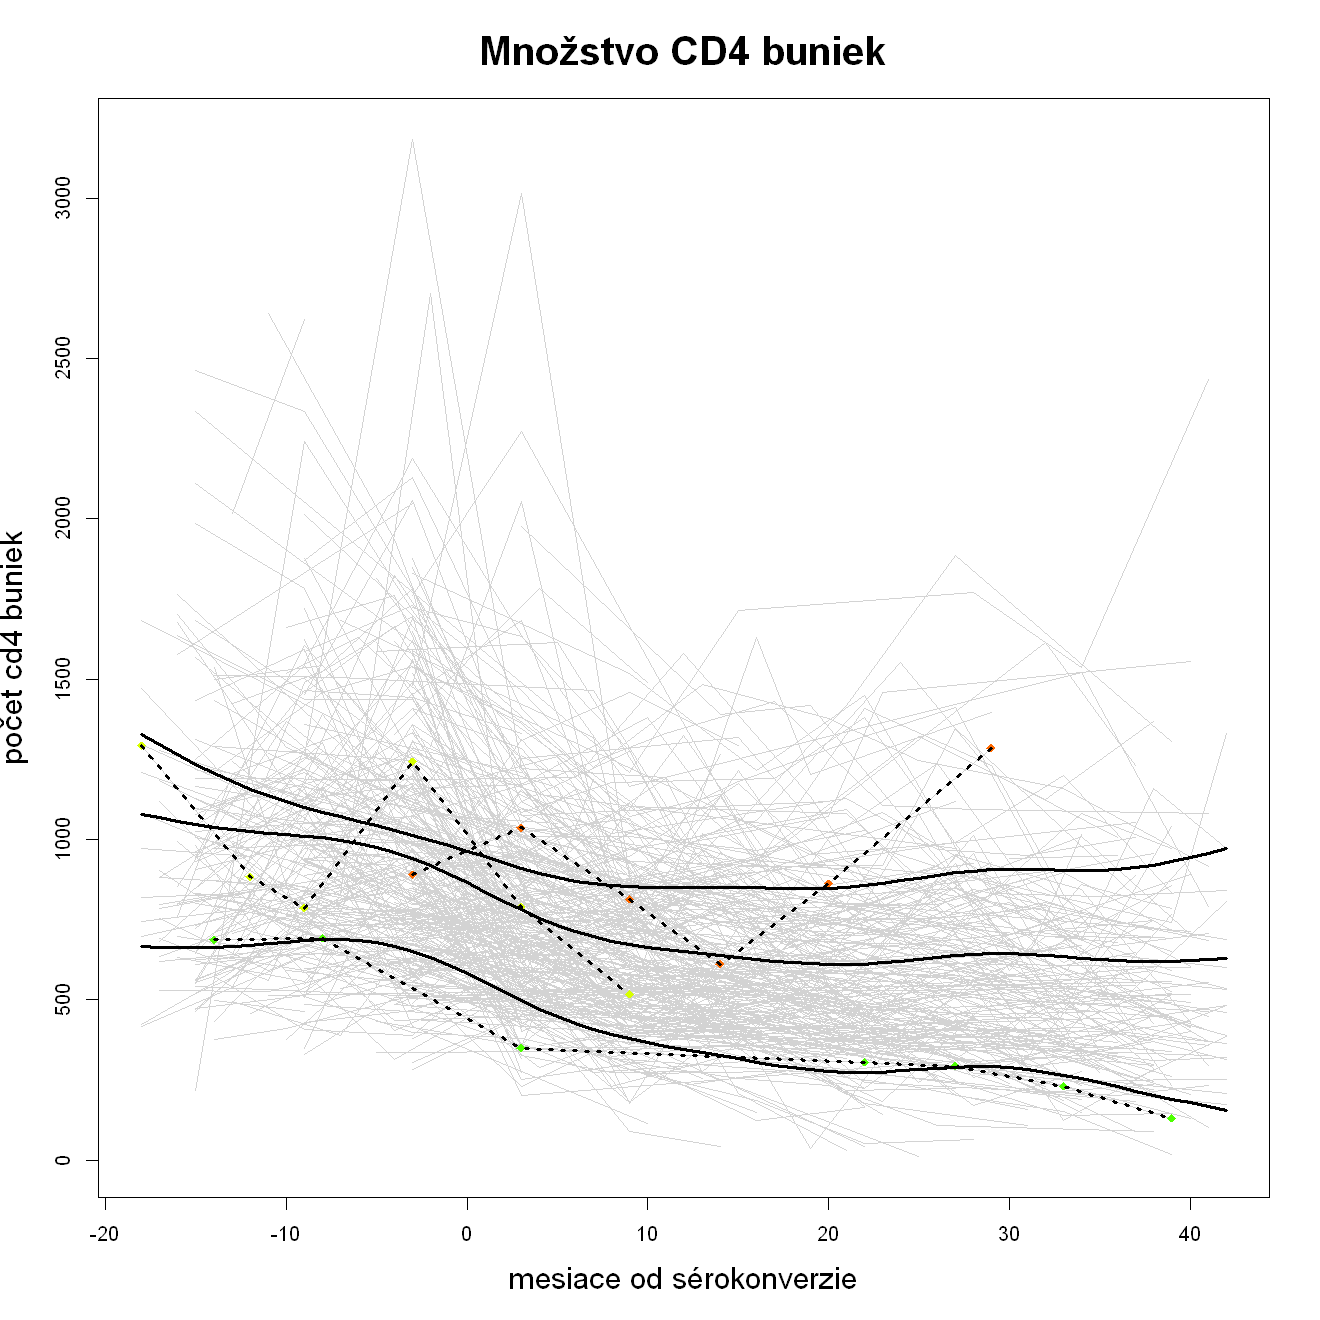

In [58]:
Yhat <- t(matrix(rep(fpca.res$mu, n), length(month))) + fpca.res$scores %*% t(fpca.res$efunctions)

options(repr.plot.width=11, repr.plot.height=11)

set.seed(12345)
n.crv <- 3
sel.crv <- sample(1:n, size = n.crv, replace = FALSE)

matplot(month, t(cd4), type='n', 
        main="Množstvo CD4 buniek", ylab="počet cd4 buniek", 
        xlab="mesiace od sérokonverzie", cex.main=2, cex.lab=1.55 )
for(irow in 1:n){
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  lines(temp$x, temp$y, col="light grey")
}
for(i in 1:n.crv){
  irow <- sel.crv[i]
  temp <- na.omit(data.frame(x = month, y = cd4[irow,]))
  points(temp$x, temp$y, col=rainbow(2*n)[sel.crv[i]], 
         pch = 18, cex=1)
  lines(temp$x, temp$y, col="black", lwd=3, lty=3)
  lines(month, Yhat[sel.crv[i],], 
        col="black", lwd=3)
}

**<font size=5 color=darkblue> 4. Dvojrozmerná FPCA </font>** <br>

**<font size=4 color=darkblue> 4.1 Od FPCA ku mFPCA </font>** <br>

V štandardnej FPCA sme skúmali dáta, ktoré boli meraniami množstva buniek vzhľadom na čas. Taktiež sme pozorovali priemernú teplotu v Kanadských mestách. Popri teplote by sme ale vedeli sledovať aj inú premennú, napr. úhrn zrážok. Predpokladajme, že pozorované krivky teploty sú $T_1, ... T_n$ a úhrnu zrážok $U_1, ..., U_n$. typický hlavný komponent je teraz definovaný ako 2-vektor $\xi = (\xi^T, \xi^U)'$ váhových funkcií, kde $\xi^T$ je variácia krivky pre teplotu a $\xi^U$ je variácia pre úhrn zrážok. Ak si zadefinujeme ešte skalárny súčin, tak PCA môže byť formálne zadefinovaná rovnakou myšlienkou, ako pri (F)PCA.

Predpokladajme, že $\xi_1$ a $\xi_2$ sú bivariančné funkcie (každá s teplotnou a zrážkovou časťou). Potom skalárny súčin $\xi_1$ a $\xi_2$ definujeme ako: $$\langle \xi_1, \xi_2 \rangle =\int\xi_{1}^T\xi_{2}^T + \int\xi_{1}^M\xi_{2}^M. $$

Zodpovedajúca druhá mocnina normy $ \lVert \xi\rVert^2 $ bivariančnej funkcie $\xi$ je súčet štvorcov noriem dvoch funkcií $\xi^T$ a $\xi^M$. 

Zadefinjume si $Počasie_i = (T_i, U_i)$. Potom vážená lineárna kombinácia (skóre hlavných komponentov) je $$f_i = \langle \xi, Počasie_i \rangle = \int \xi^T T_i + \int\xi^U U_i. $$

**<font size=4 color=darkblue> 4.2 Popis skúmaných dát </font>** <br>

Skúmané dáta sú denné priemerné teploty a denné priemerné úhrny zrážok v 35 mestách Kanady za jeden rok (resp. 365 dní) v sledovanom období v rokoch 1960 až 1994.

In [59]:
data(CanadianWeather)
attach(CanadianWeather)
library("funHDDC")
library("funHDDC")

The following objects are masked from CanadianWeather (pos = 4):

    coordinates, dailyAv, geogindex, monthlyPrecip, monthlyTemp, place,
    province, region


The following objects are masked from CanadianWeather (pos = 7):

    coordinates, dailyAv, geogindex, monthlyPrecip, monthlyTemp, place,
    province, region




**<font size=4 color=darkblue> 4.3 Implementácia mFPCA a interpretácia výsledkov </font>** <br>

V programe R tiež existuje funkcia pre viacrozmernú FPCA. Vstupom tejto funkcie budú už vyhladené dáta. Taktiež existuje funkcia, ktorá nám vykreslí všetky potrebné grafy na interpretáciu výsledkov. Nevýhodou je kúsok menej vizuálne spracovanie.  

In [60]:
# vstupom do mfpca su vyhladene data na intervale 0 az 365 so 65 funkciami v baze
daybasis65 <- create.fourier.basis(c(0, 365), nbasis=65, period=365)
daytempfd <- smooth.basis(day.5, CanadianWeather$dailyAv[,,"Temperature.C"], daybasis65,
                          fdnames=list("Day", "Station", "Deg C"))$fd
dayprecfd<-smooth.basis(day.5, CanadianWeather$dailyAv[,,"Precipitation.mm"], daybasis65,
                        fdnames=list("Day", "Station", "Mm"))$fd

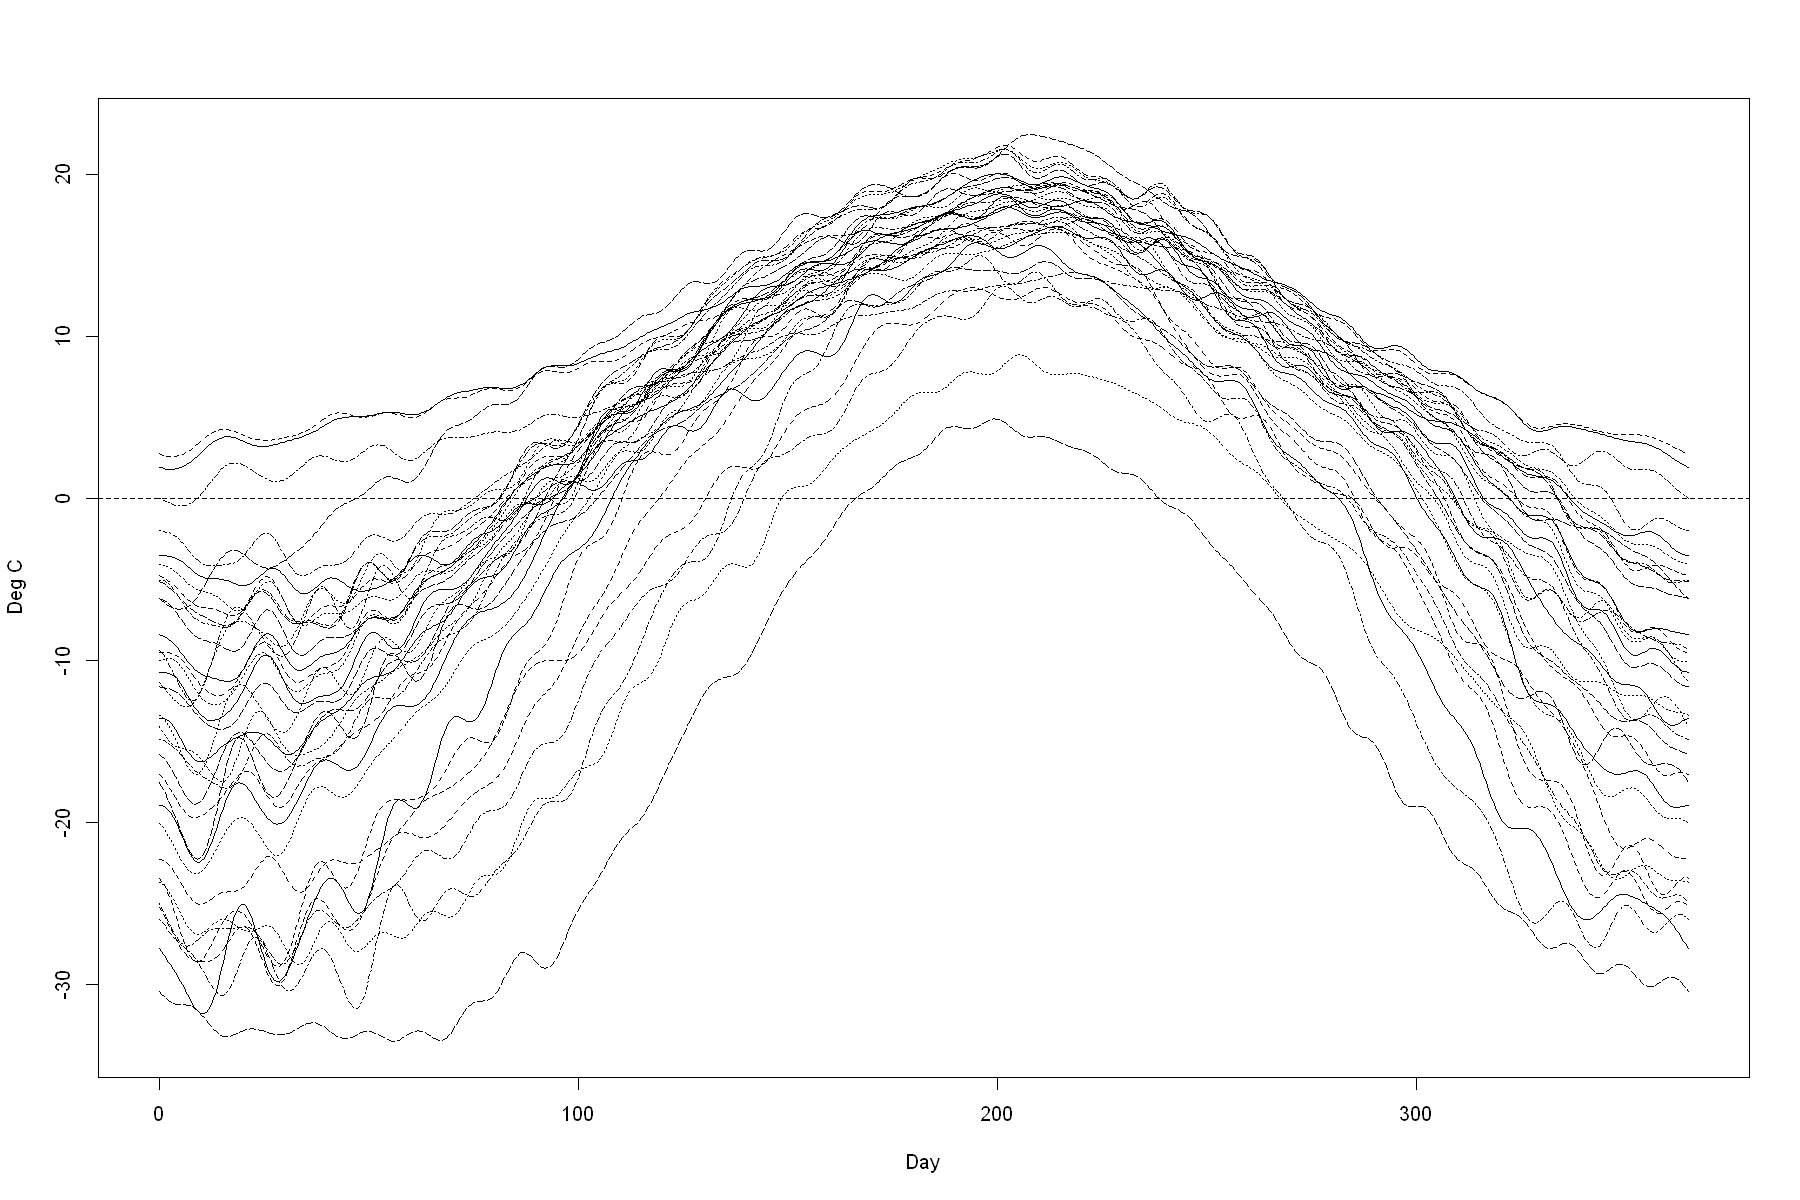

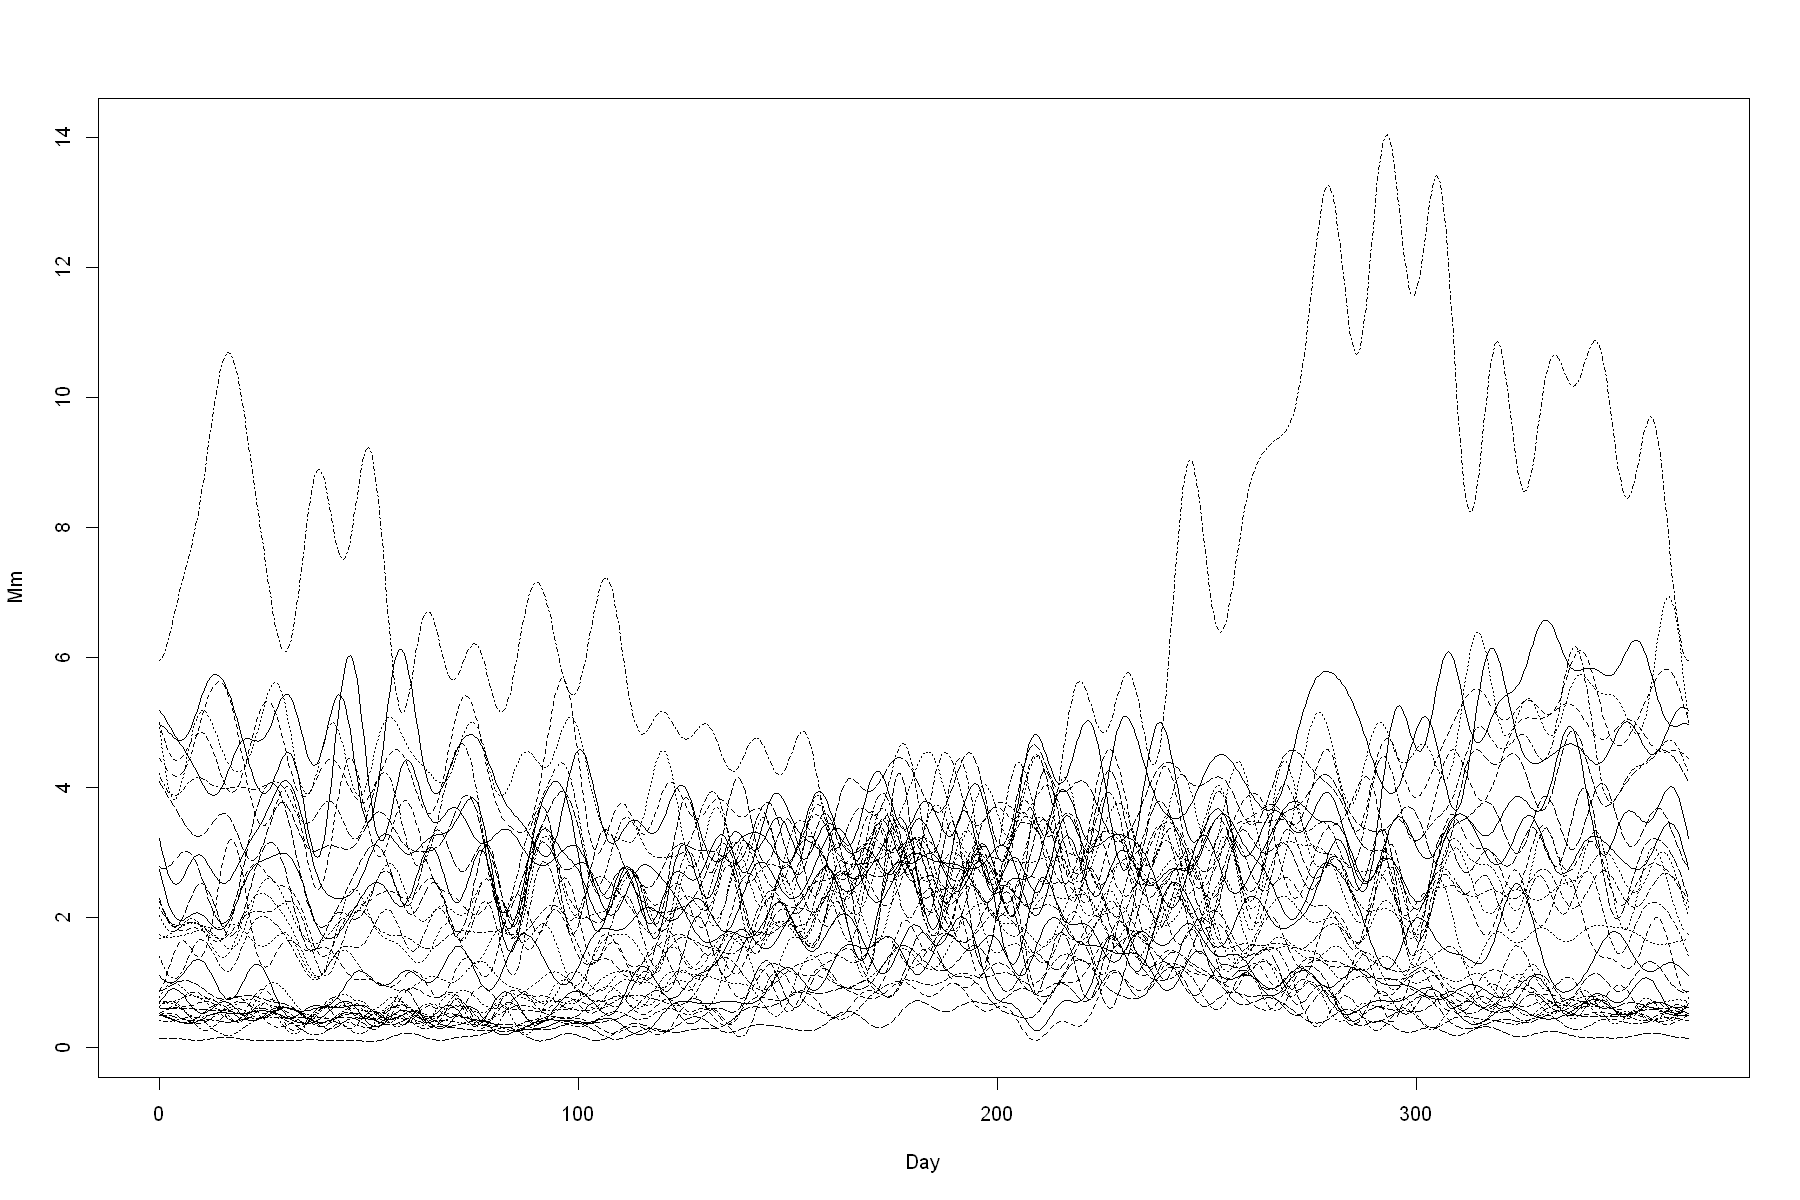

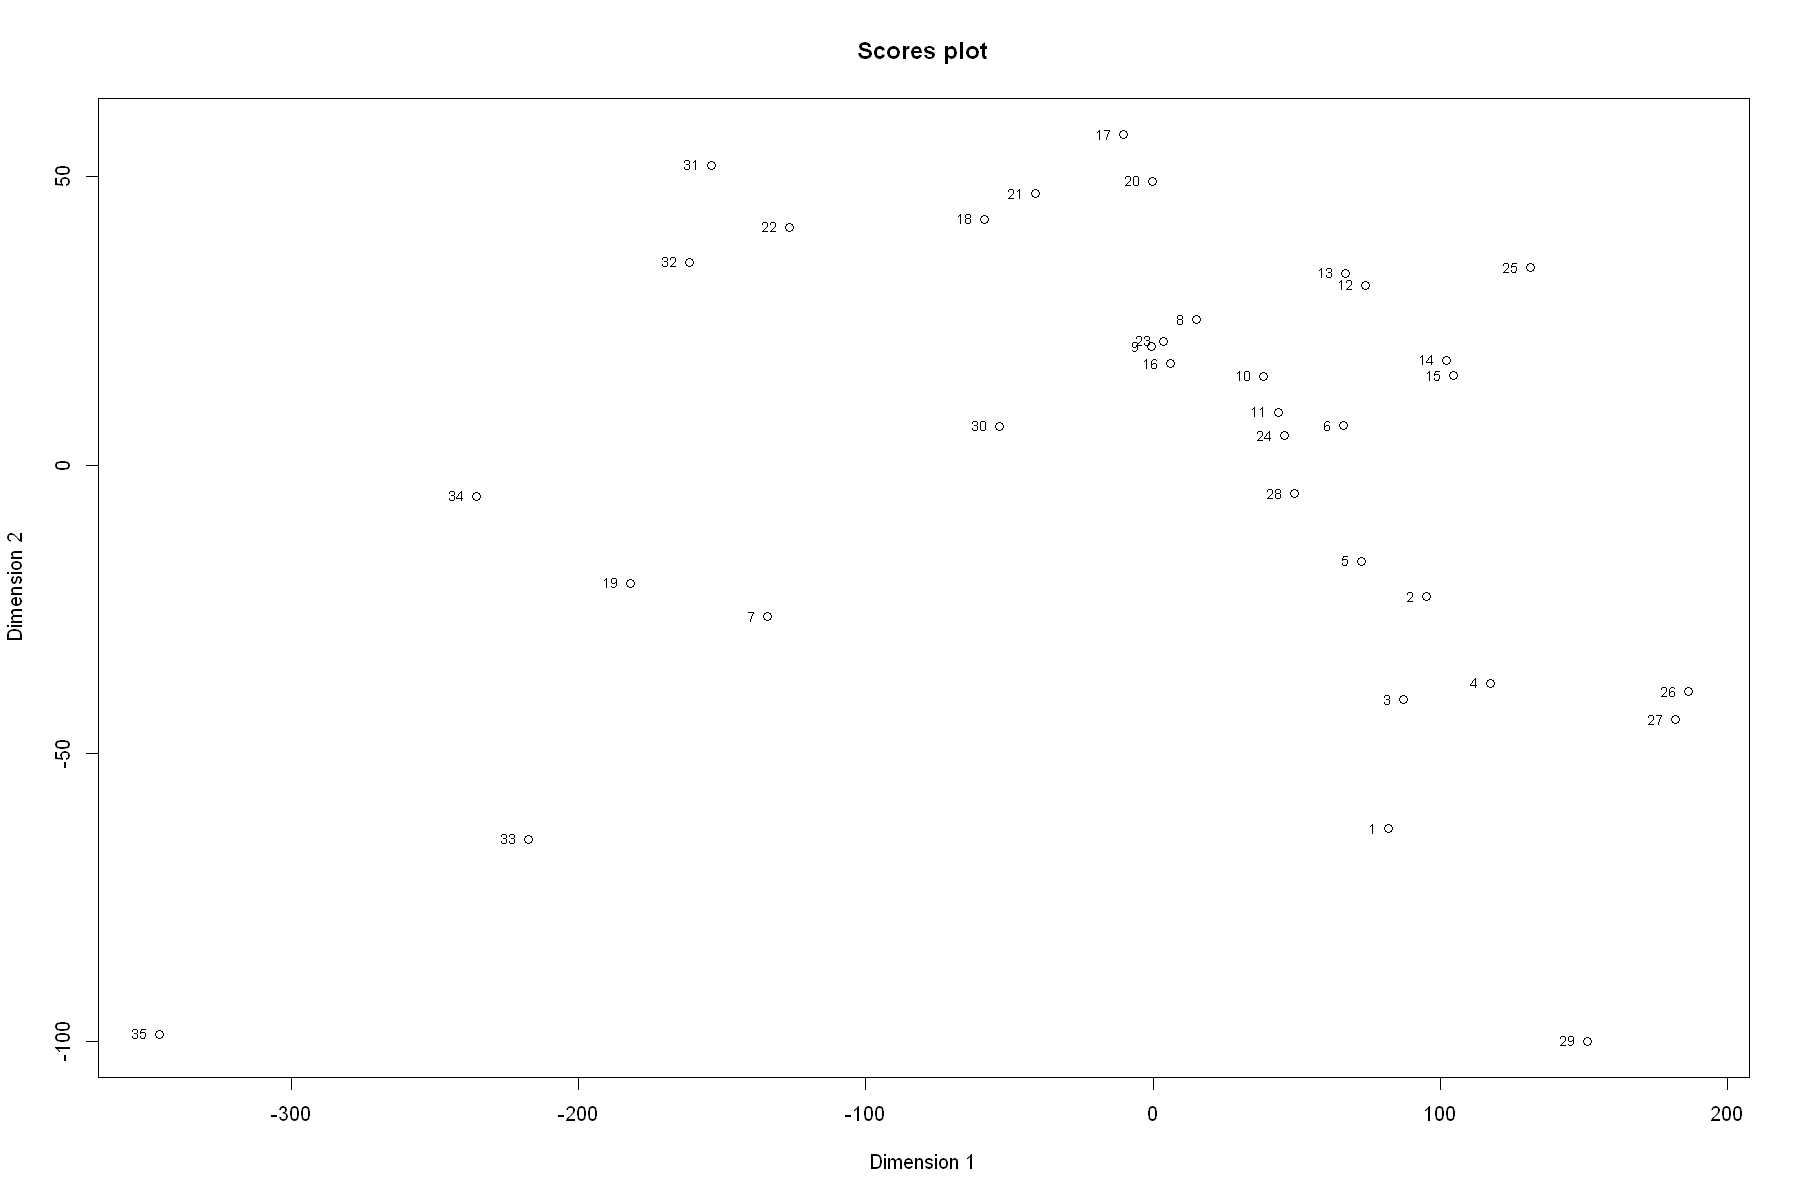

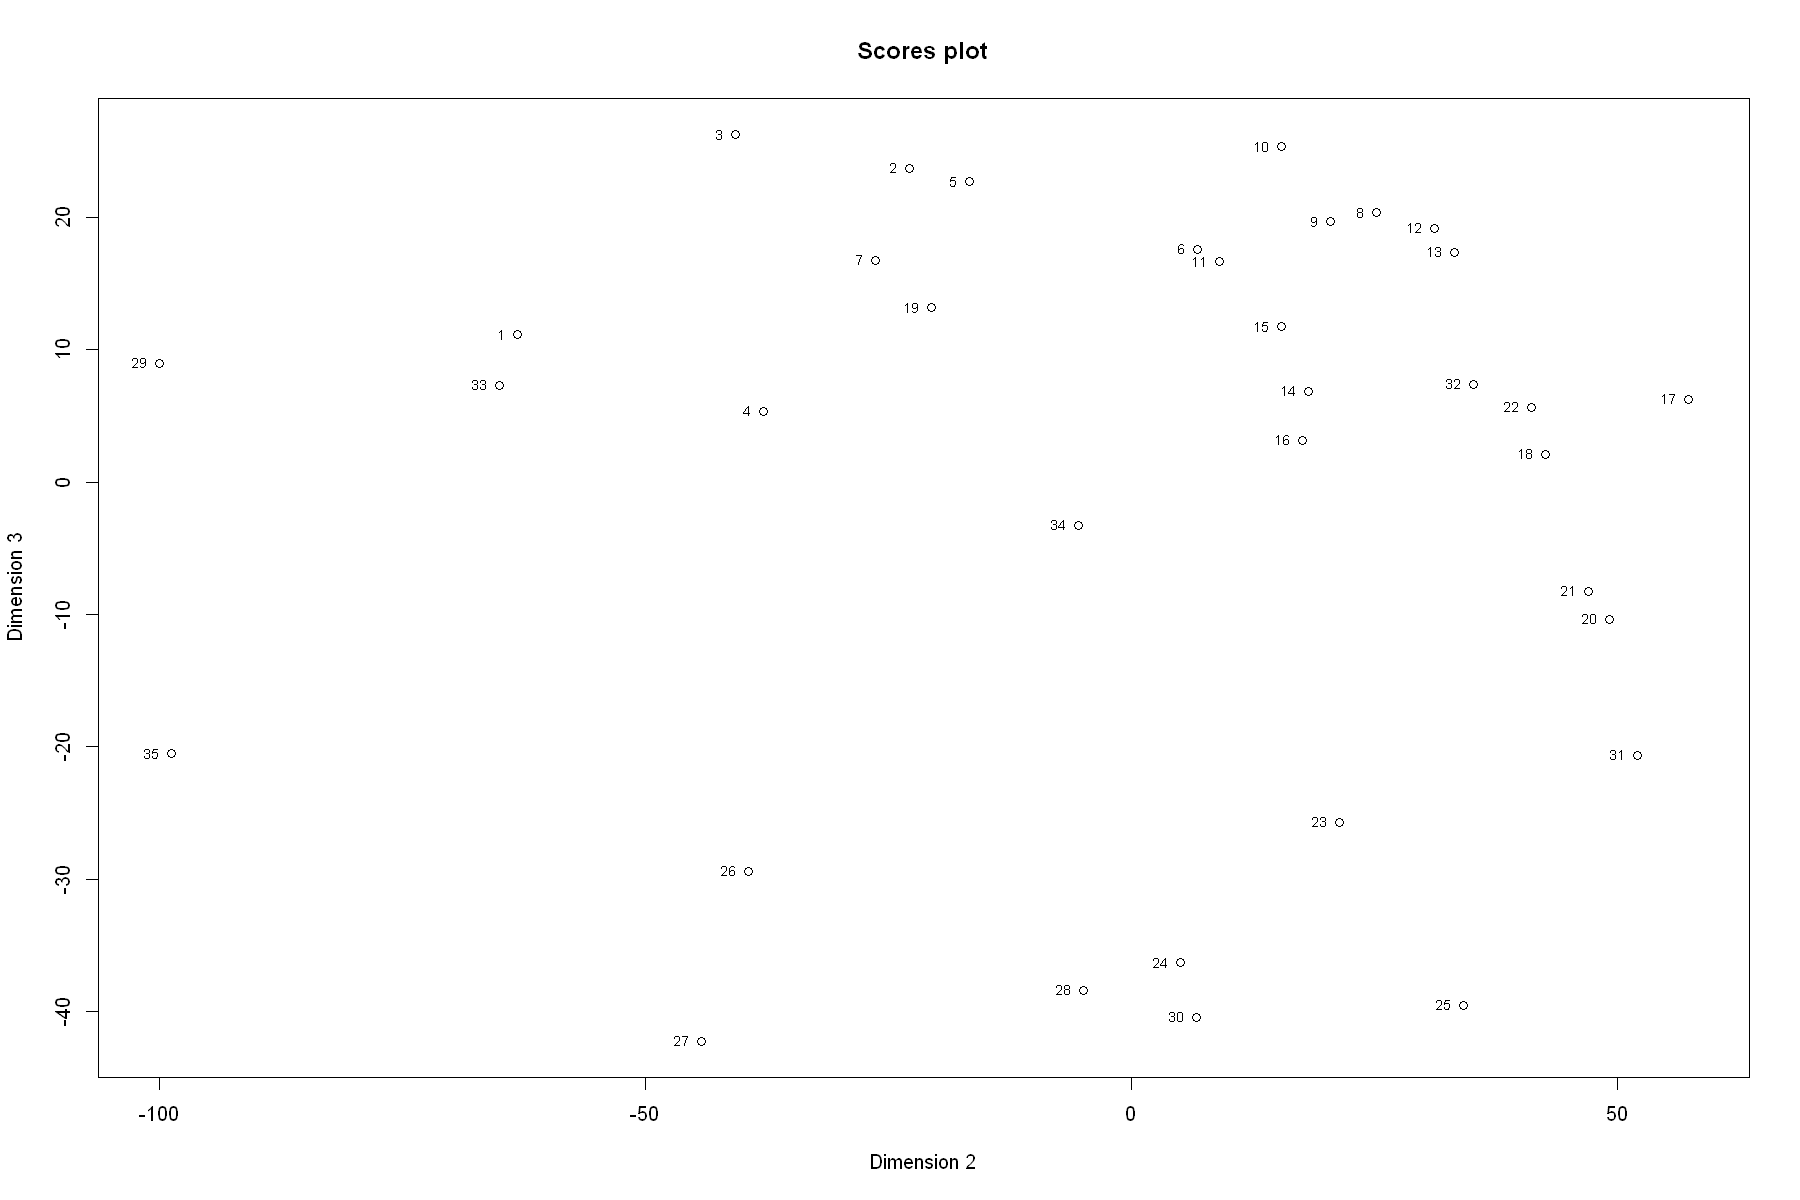

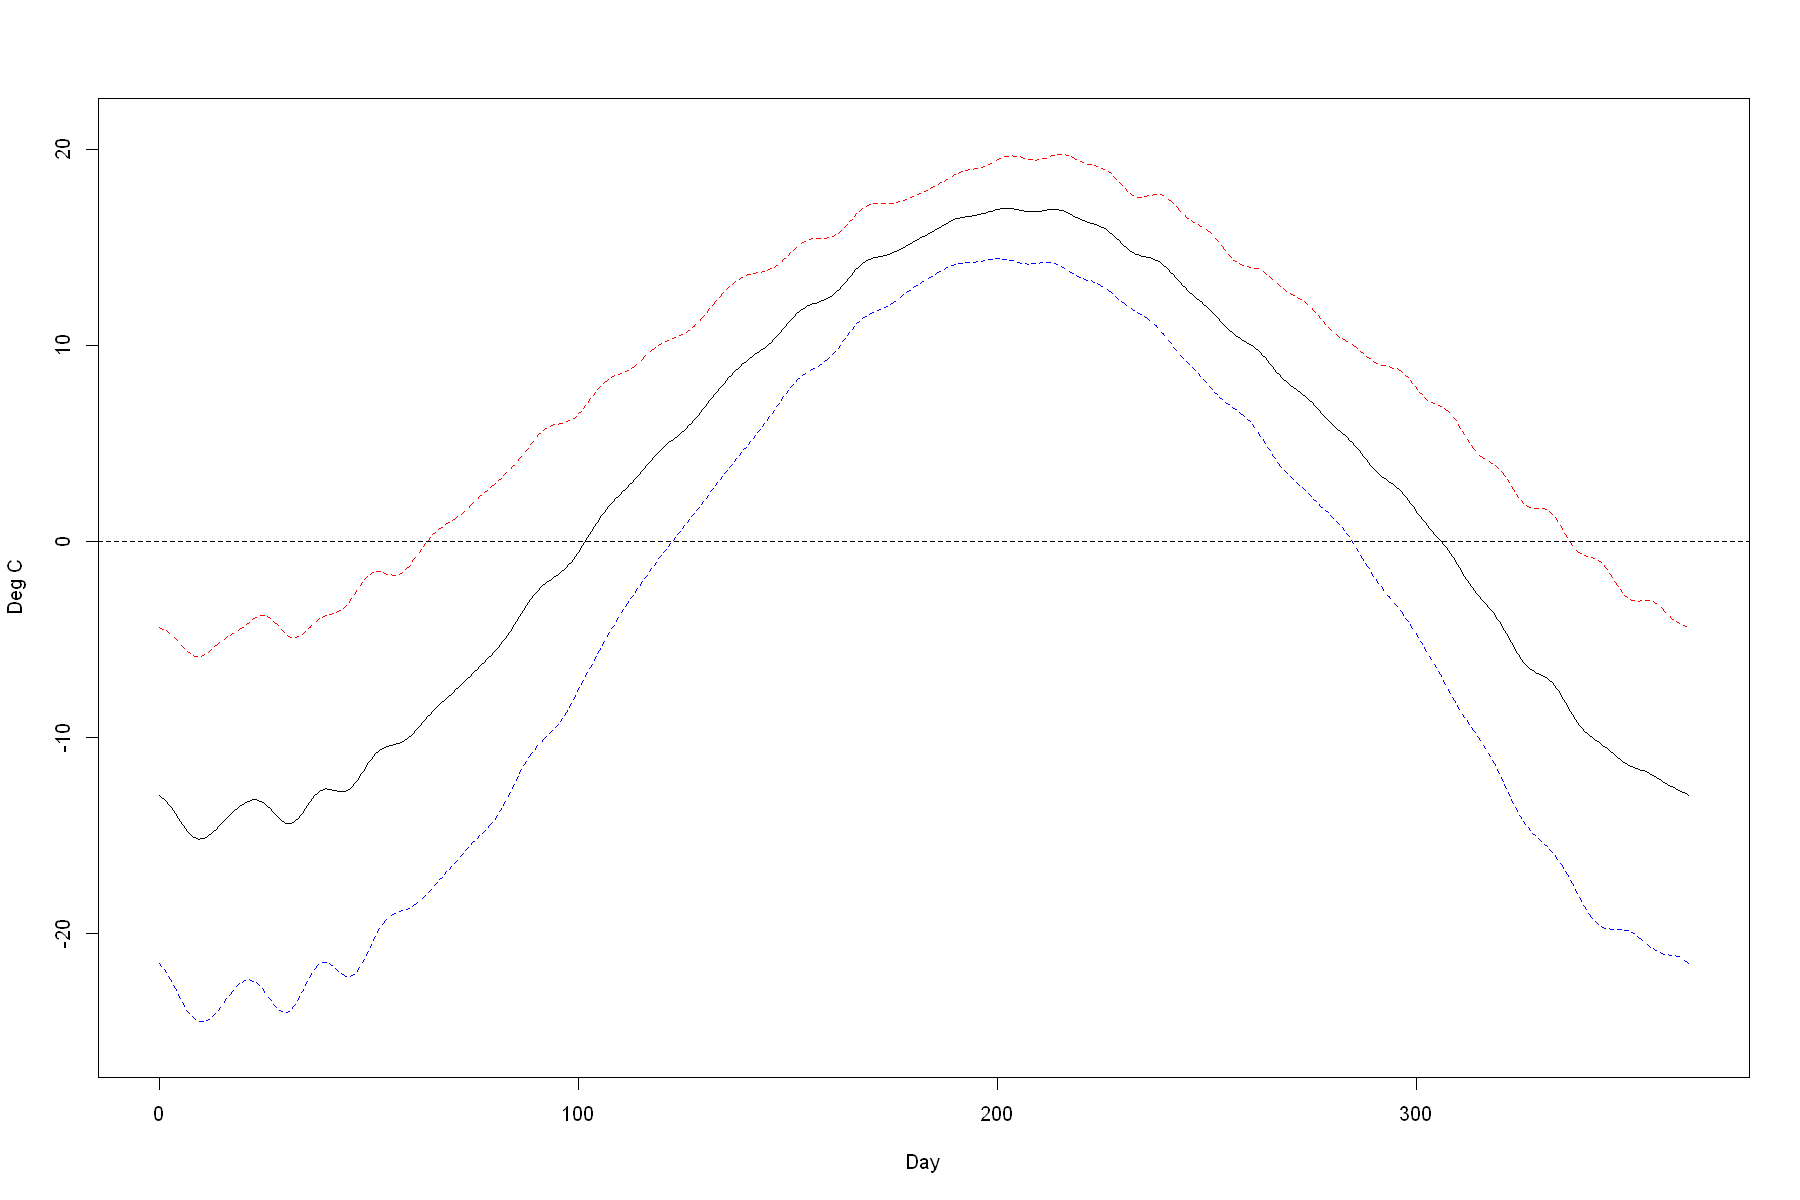

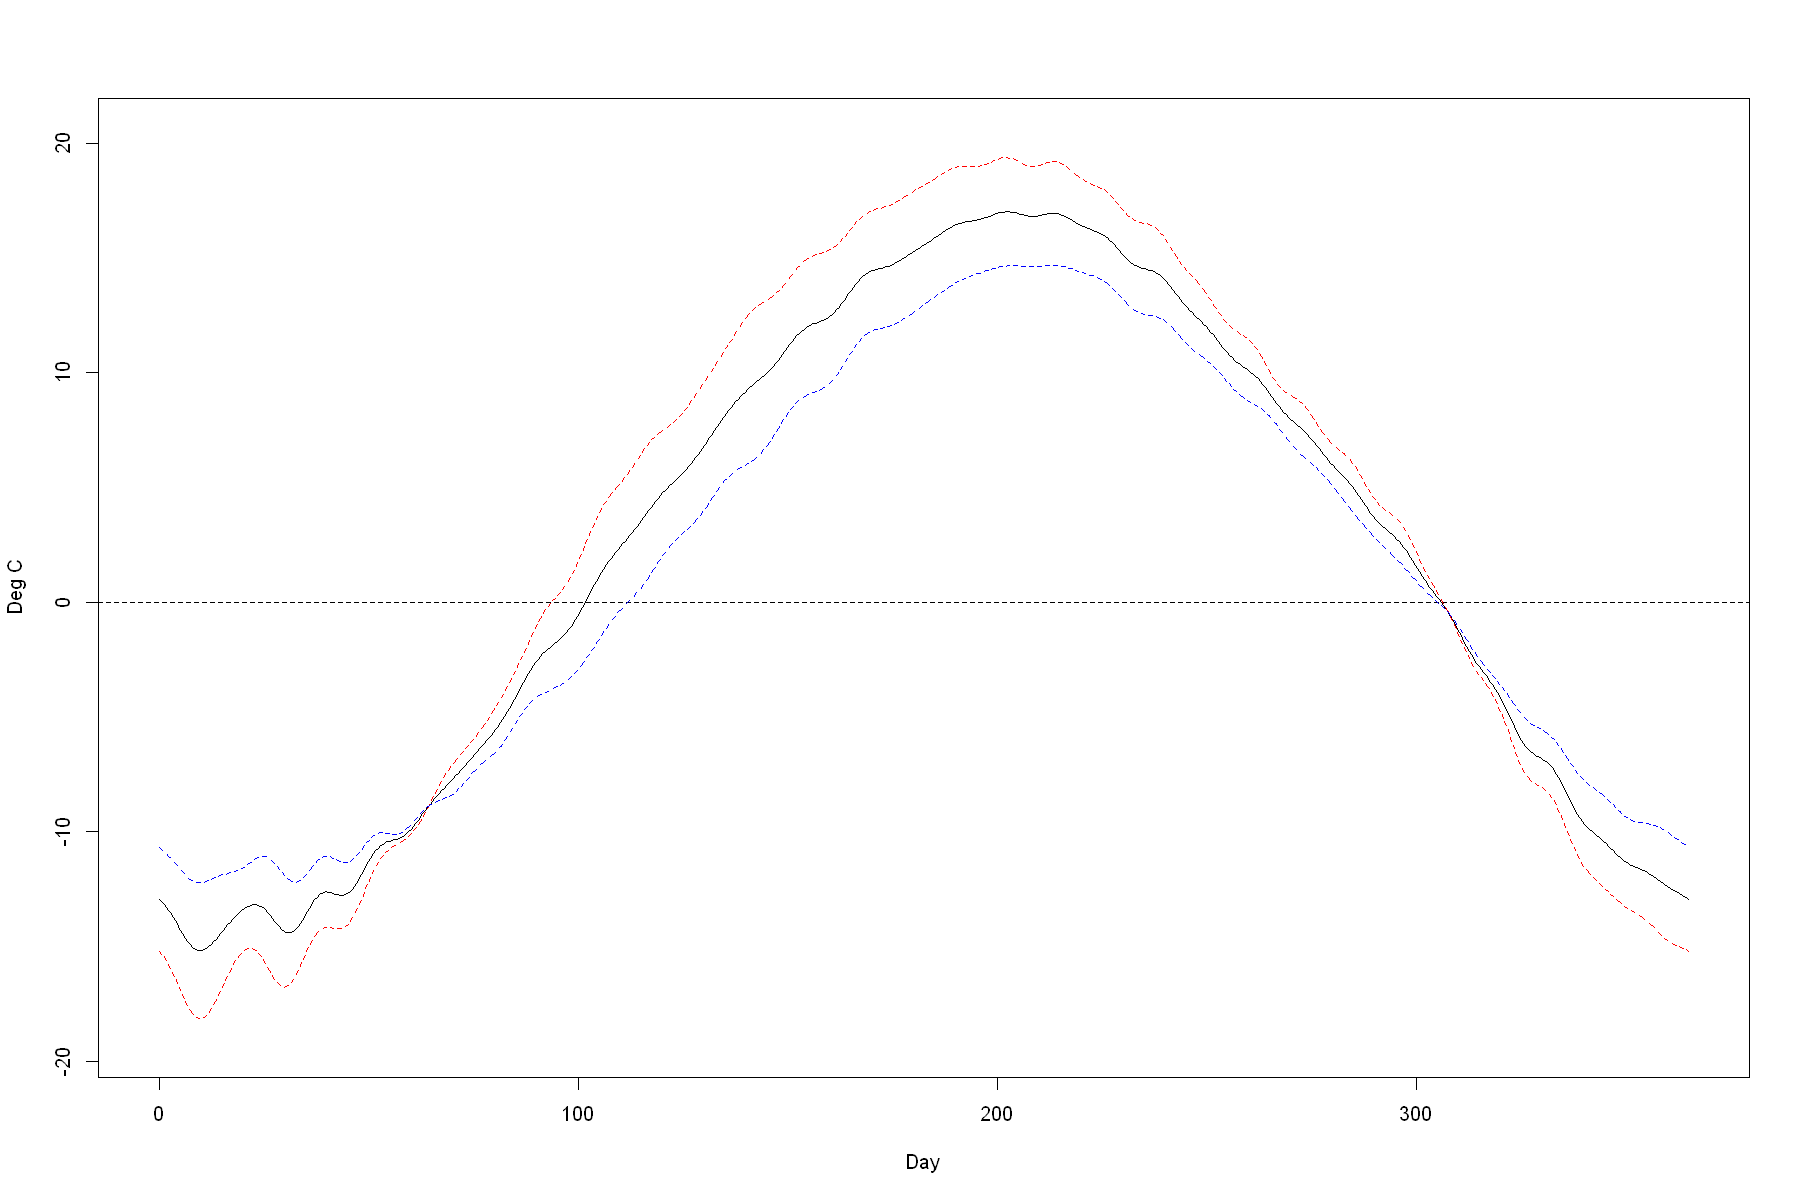

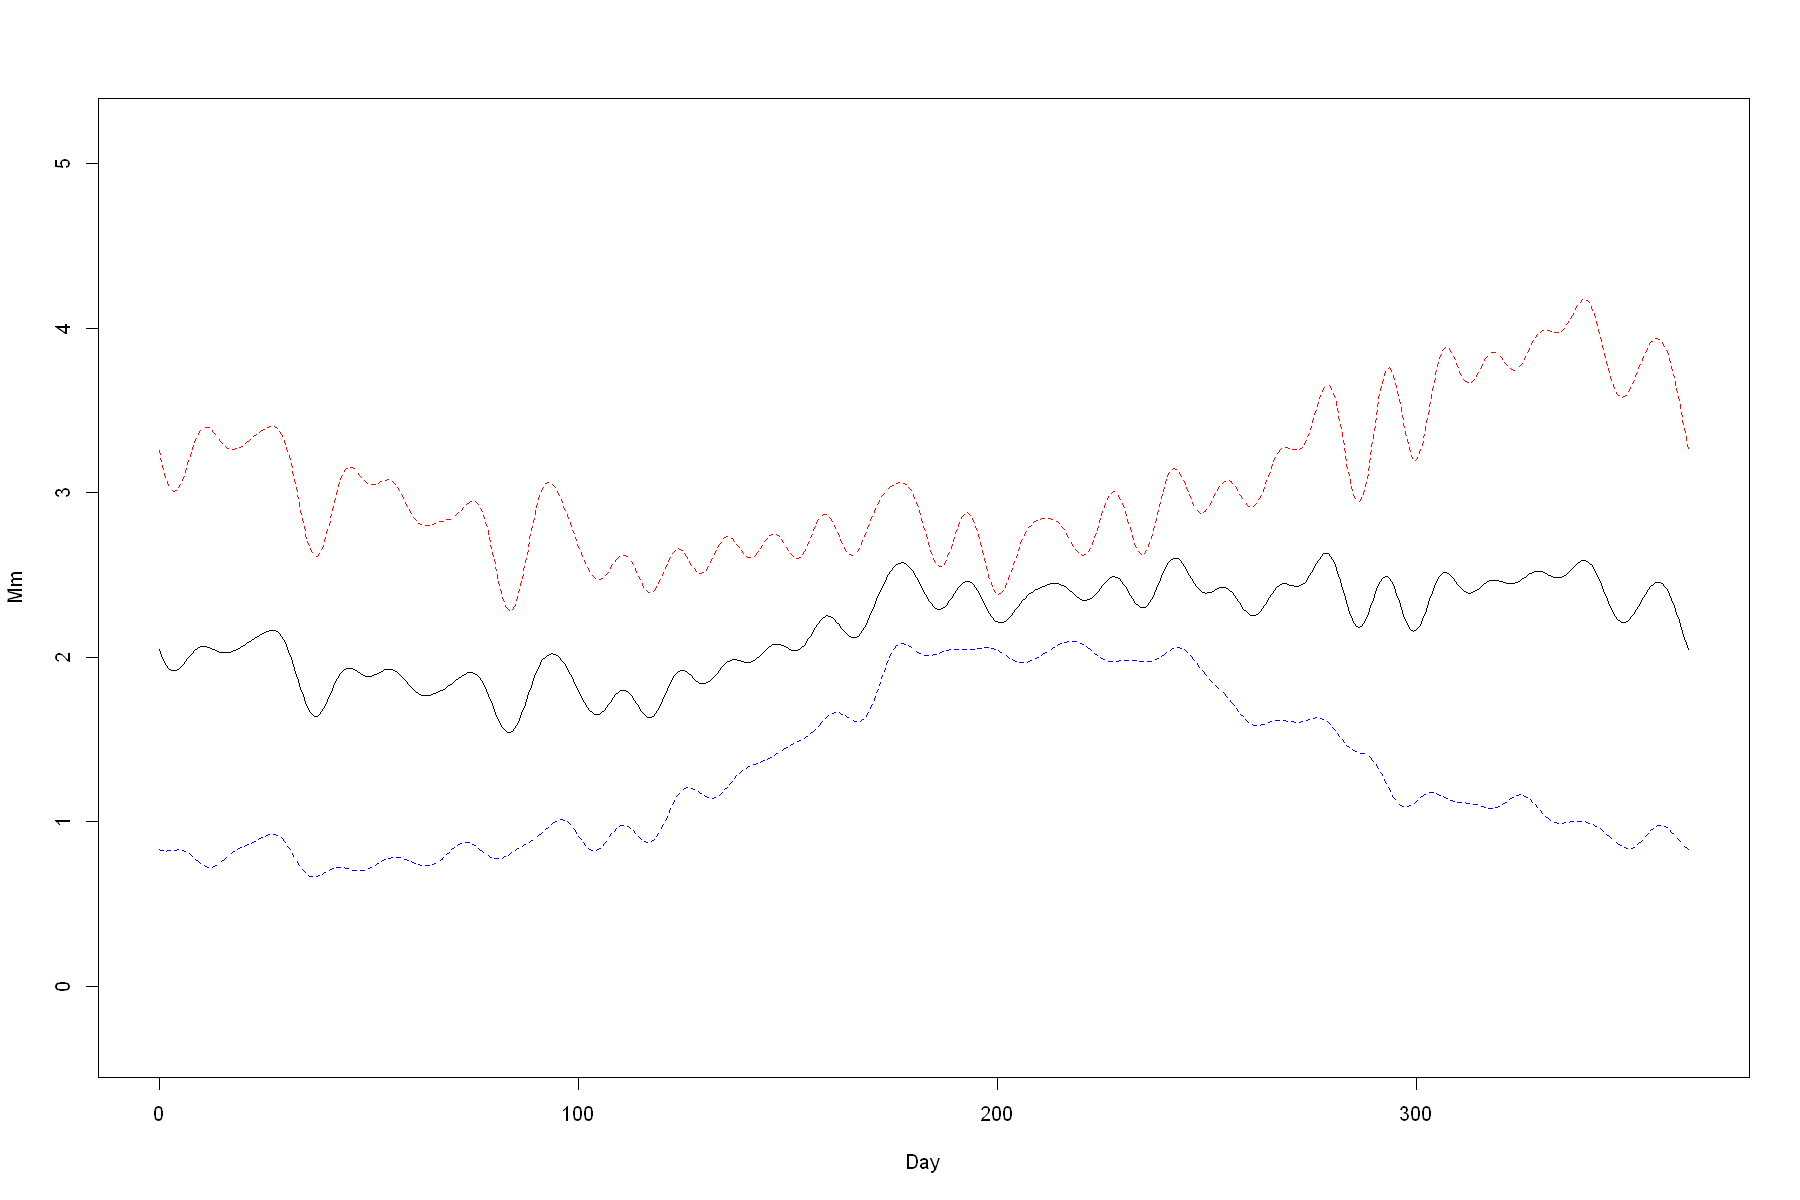

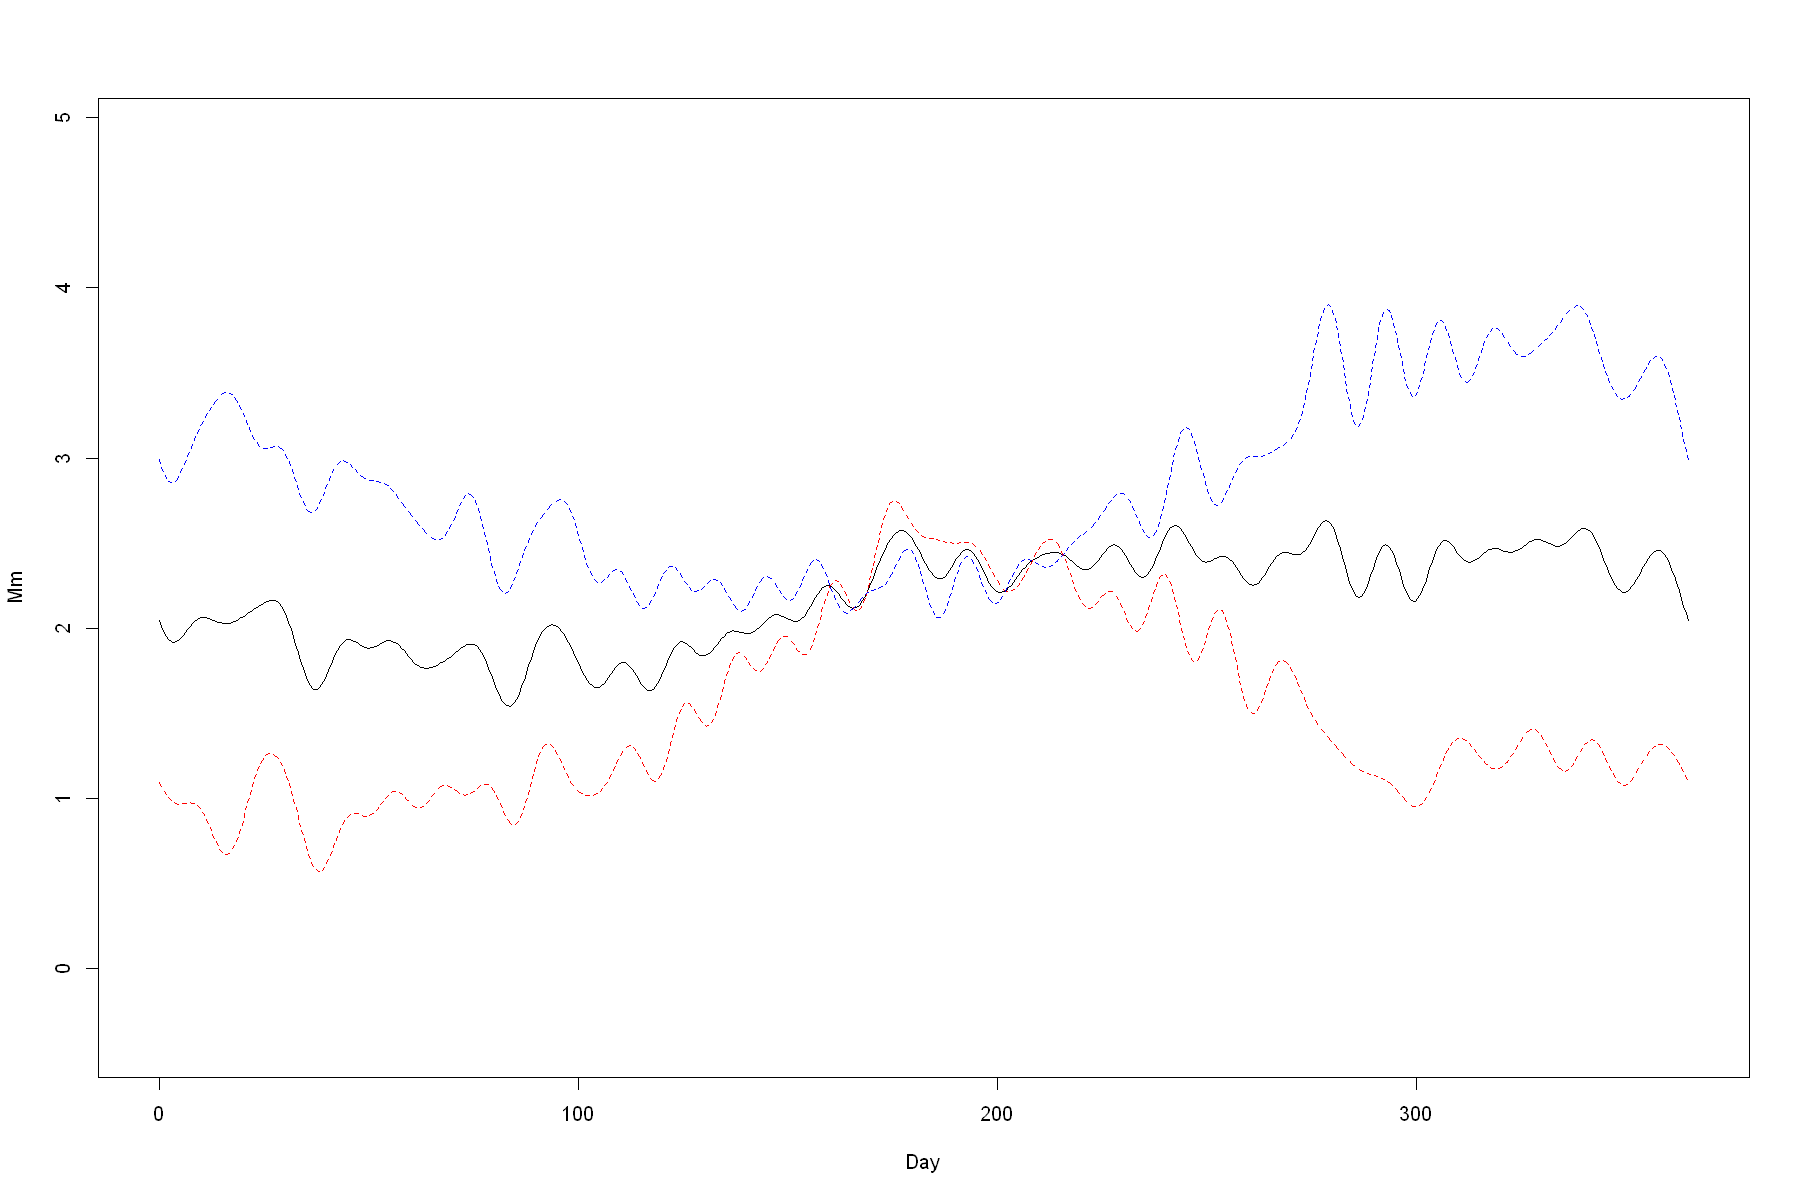

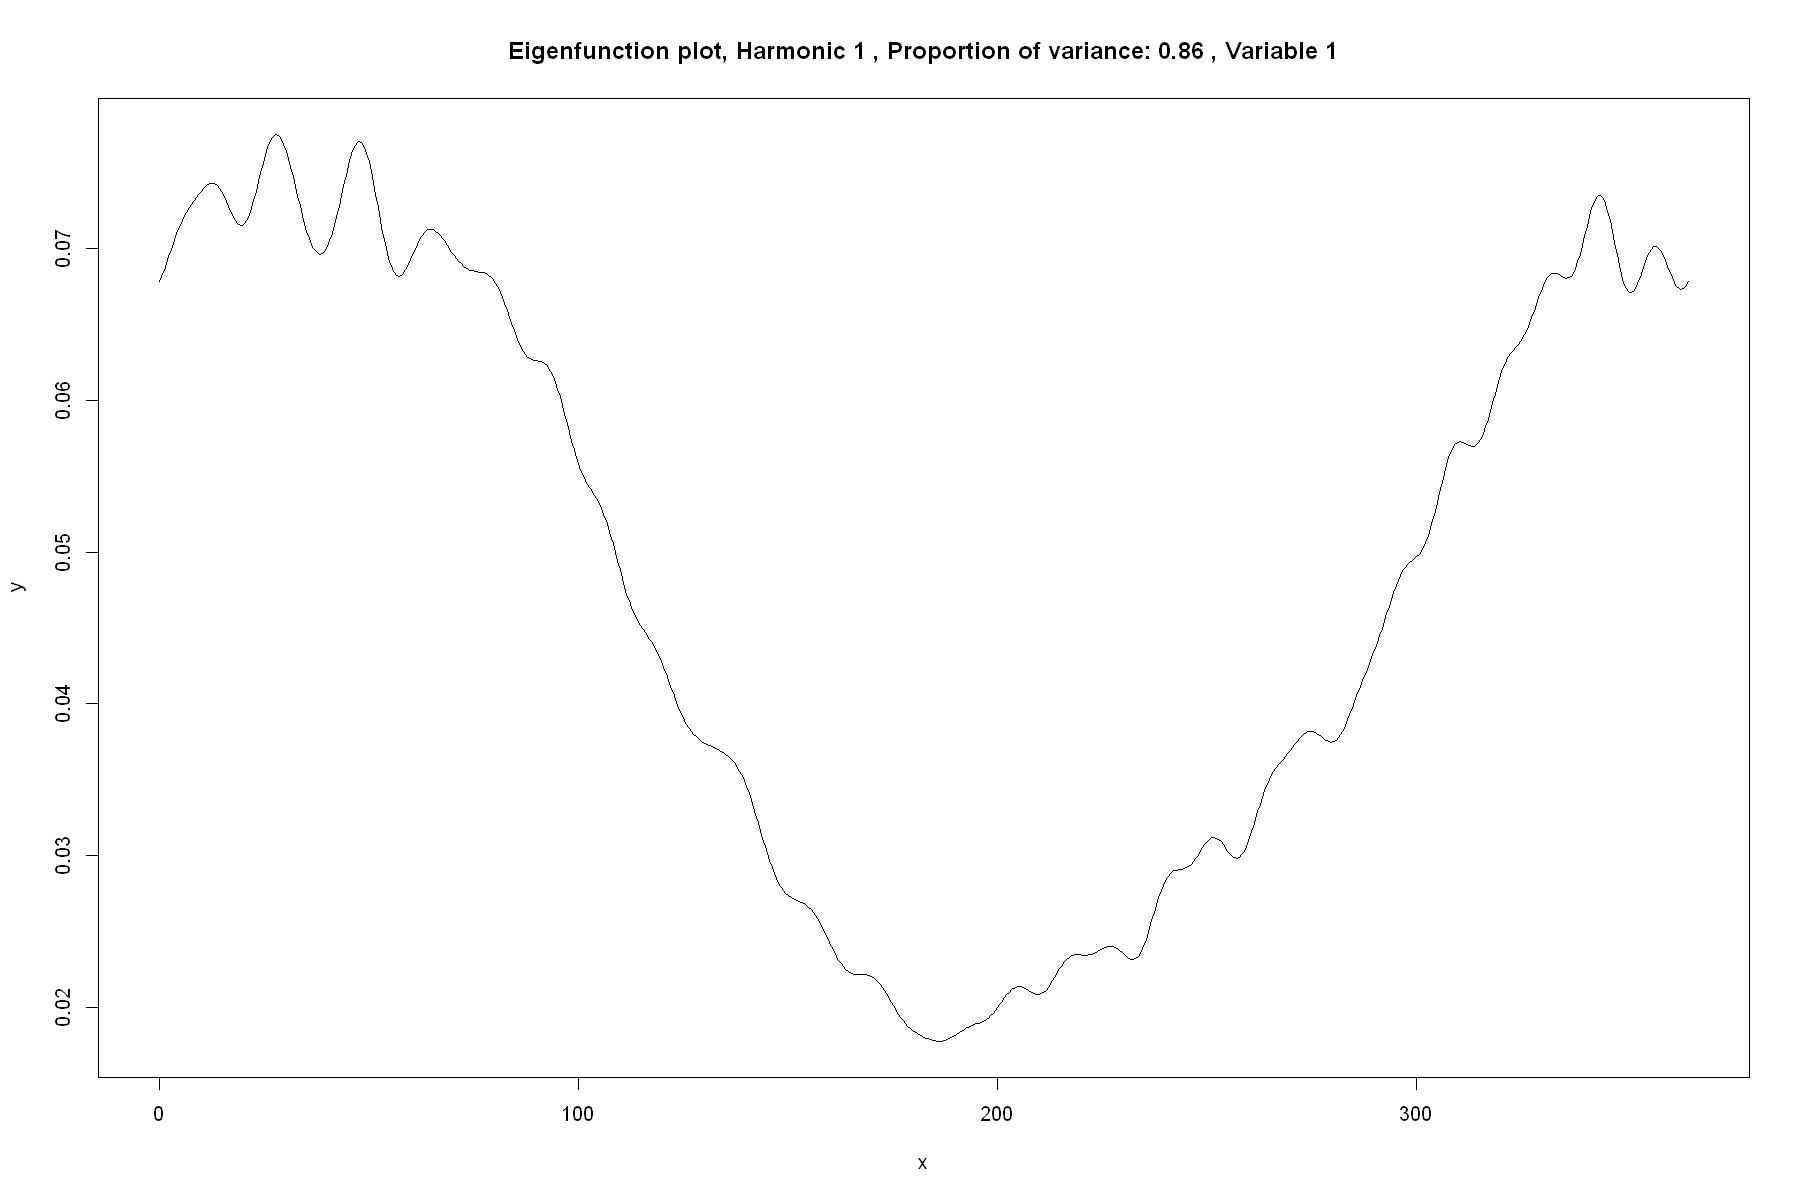

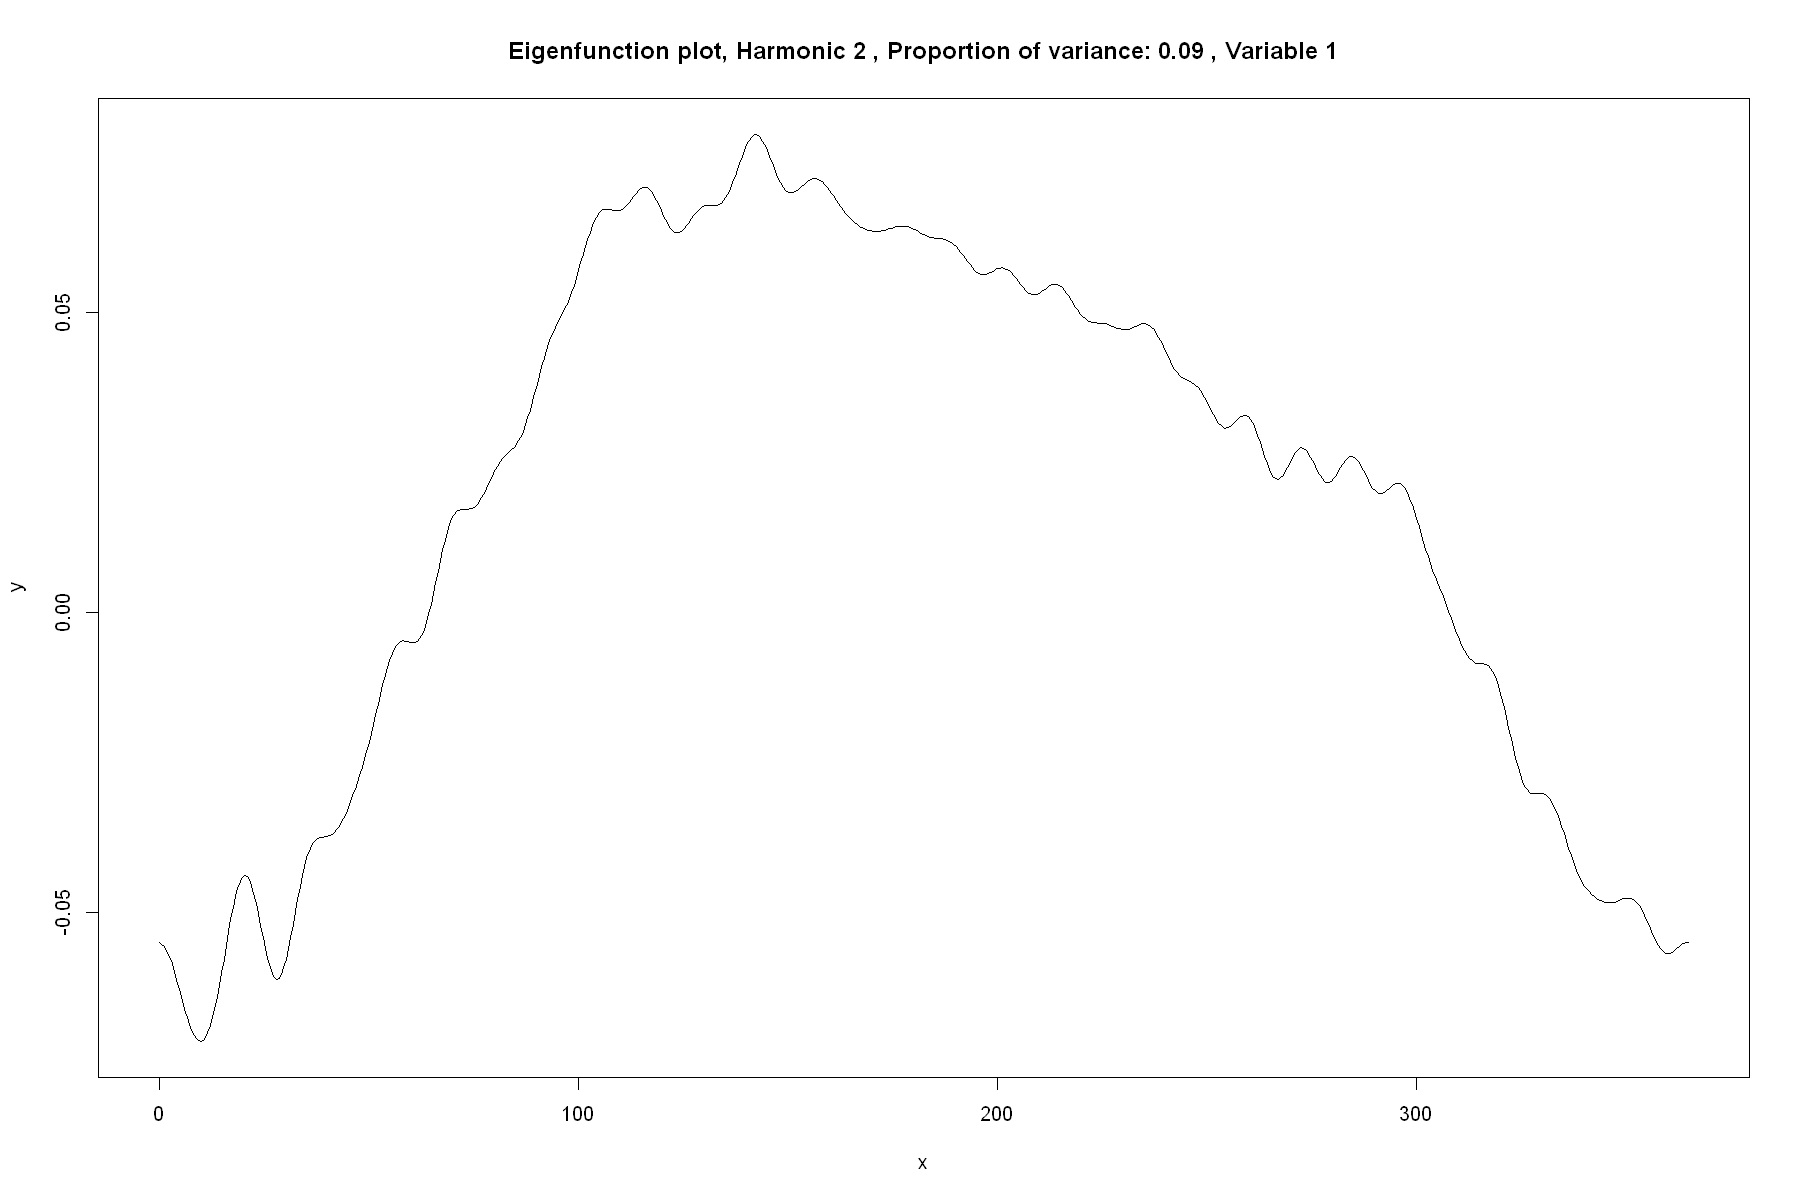

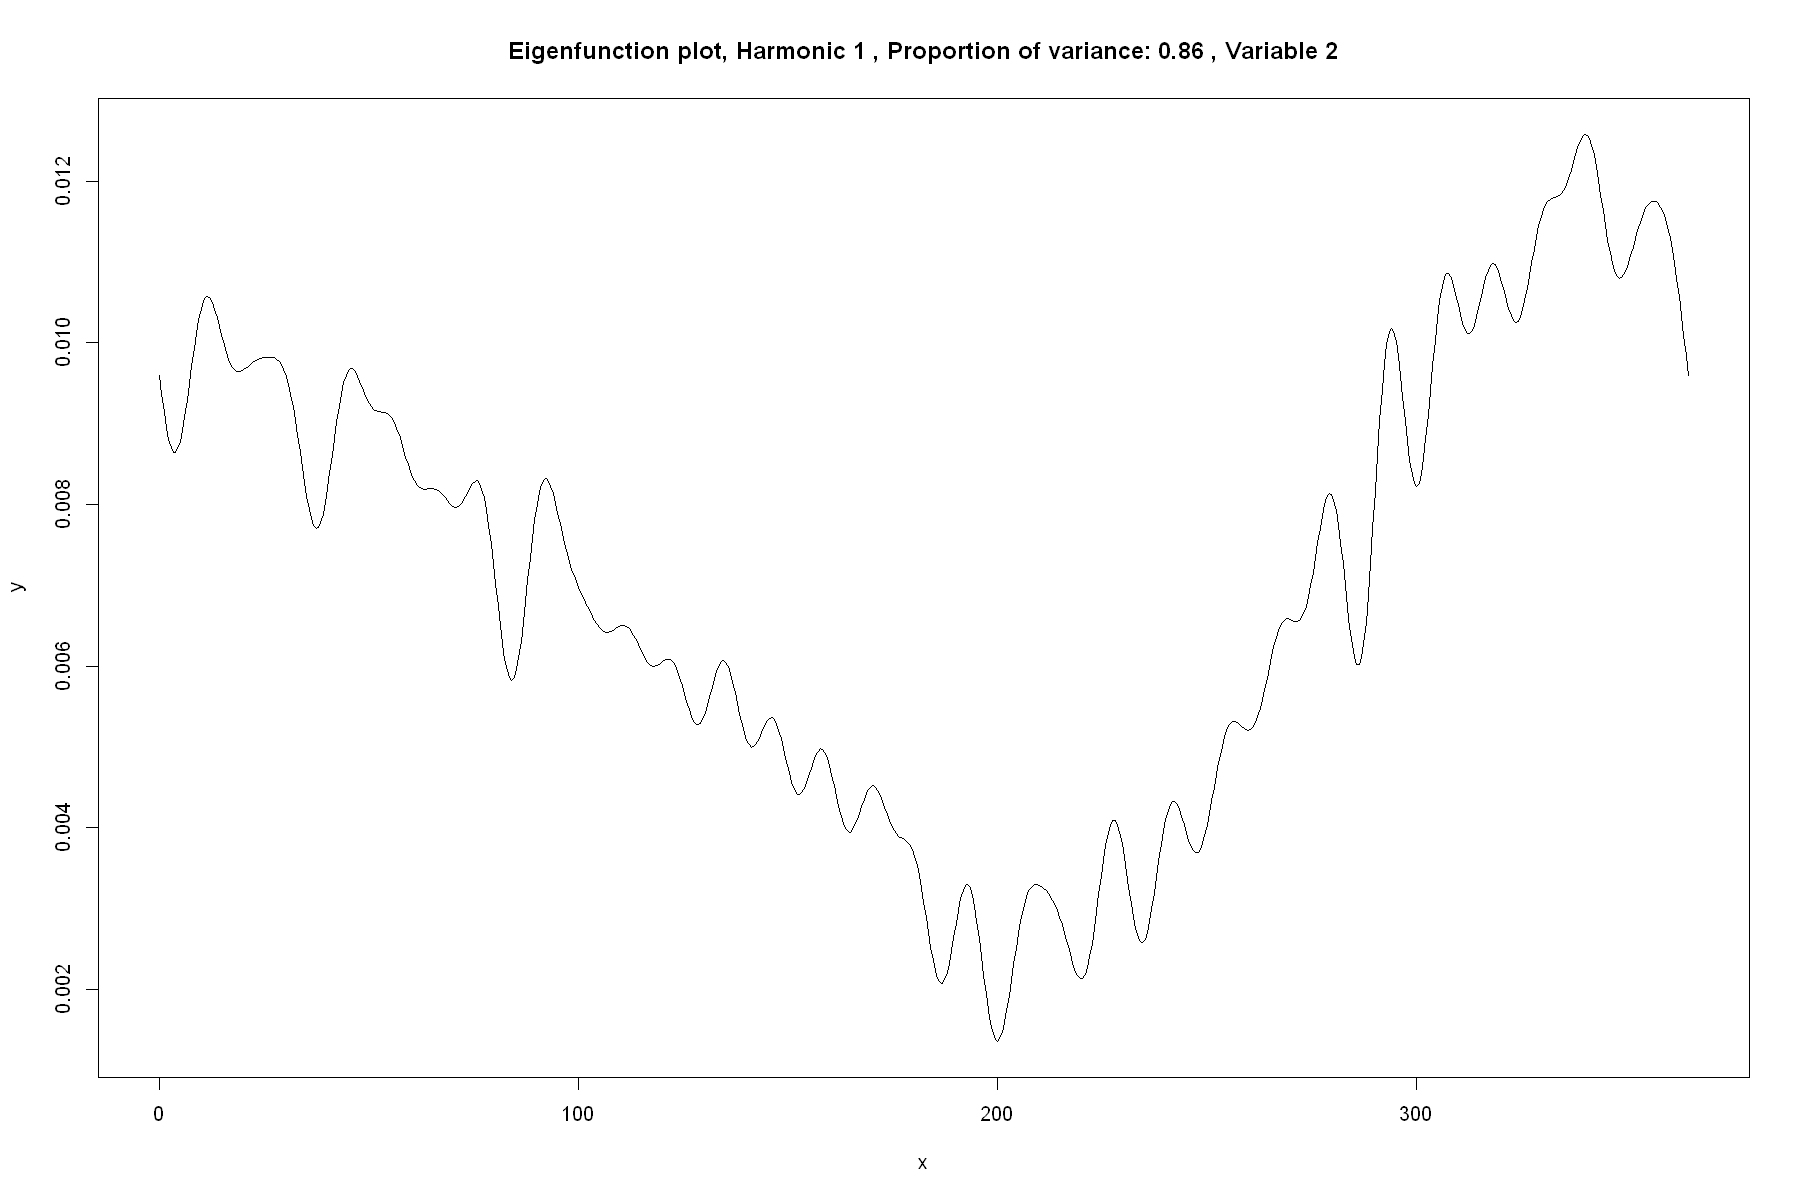

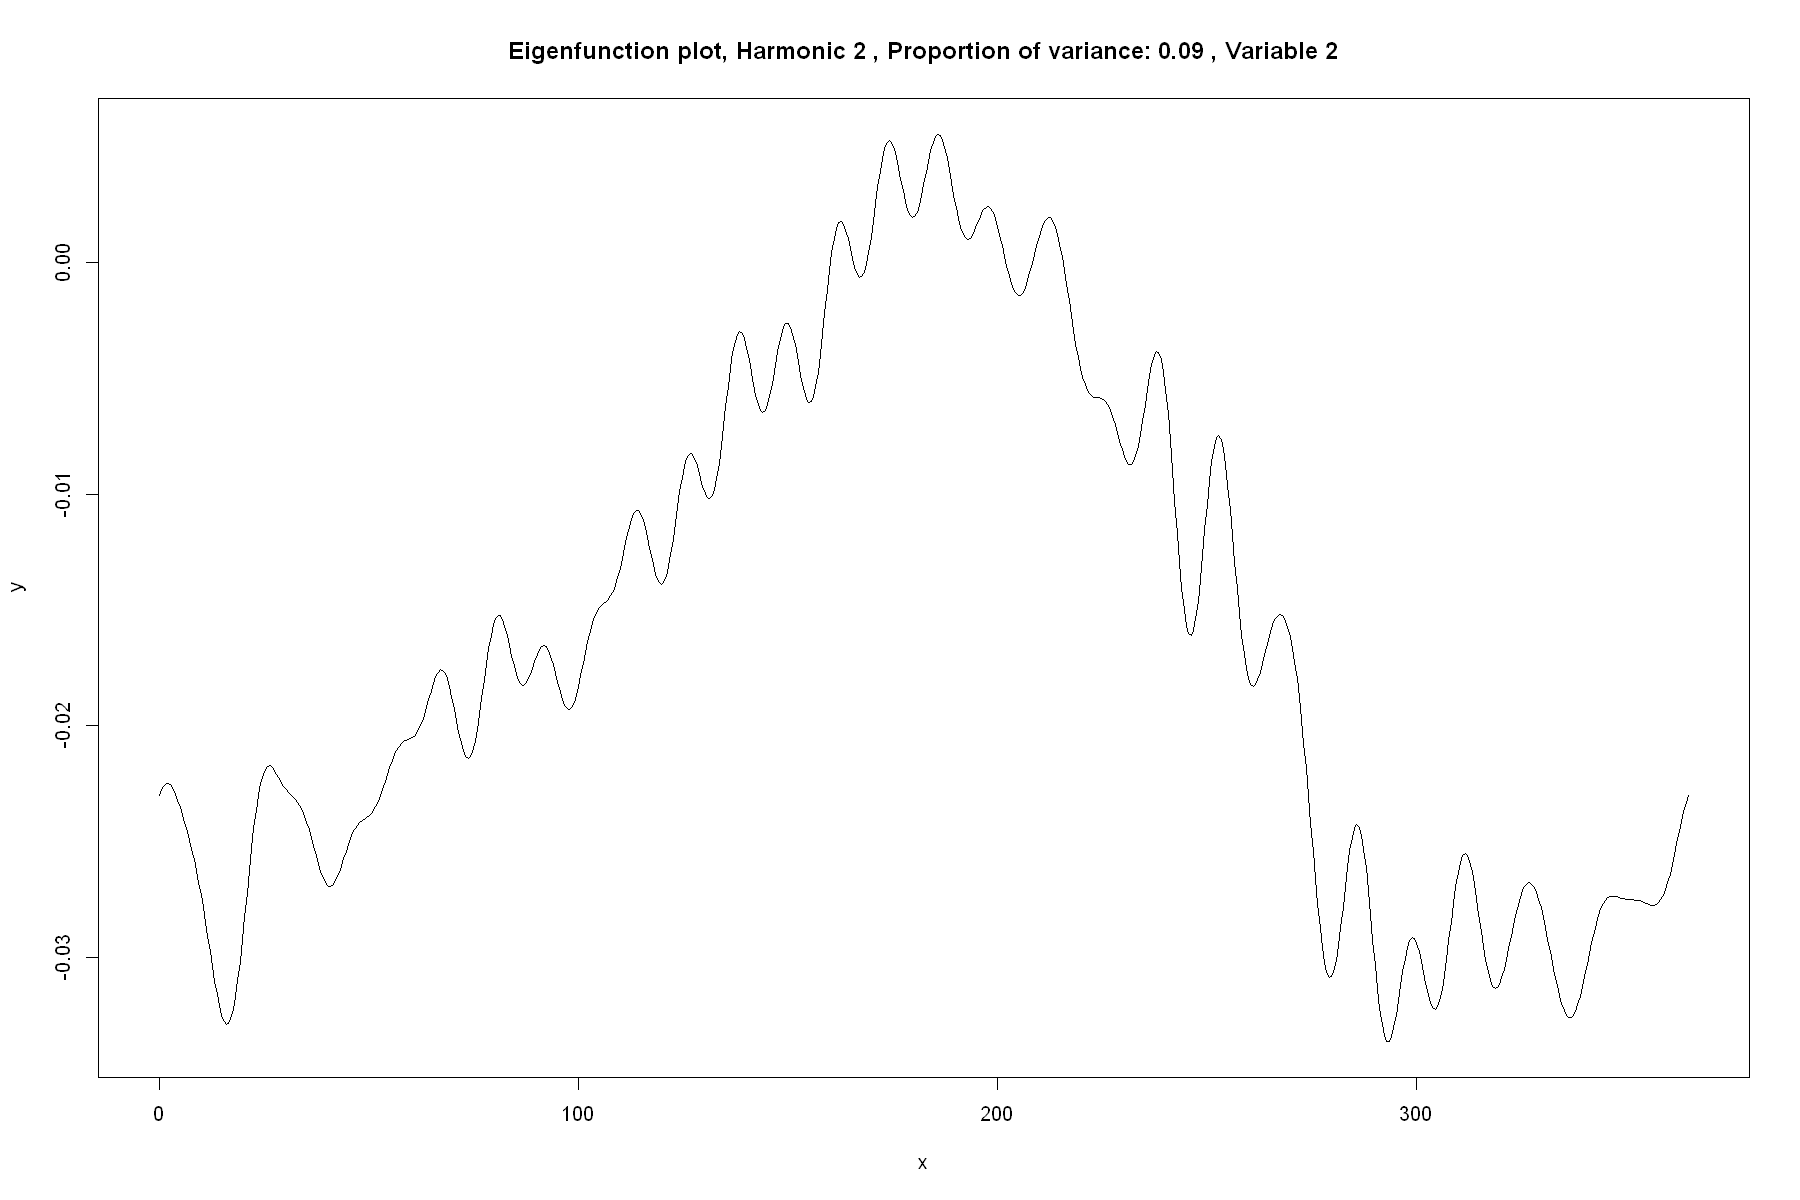

In [61]:
res.mpca<-mfpca(list(daytempfd,dayprecfd))
options(repr.plot.width=15, repr.plot.height=10)
plot.mfpca(res.mpca, cex.main=2)

V prvých dvoch grafoch môžeme vidieť priemernú dennú teplotu a priemerný denný úhrn zrážok vo všetkých 35 staniciach.
V ďalších dvoch grafoch máme vykreslené skóre jednotlivých komponentov. 

* Pre prvý komponent platí, že najvyššie skóre majú stanice v mestách ako Vancouver či Victoria, ktoré ležia neďaleko Pacifiku. Najnižšie skóre majú stanice v mestách Inuvik, či Resolute, ktoré ležia v arktickej oblasti. 


* Pre druhy komponent platí, že najvyššie skóre majú stanice Winnipeg a Dawson, ktoré ležia vo vnútrozemí. Najnižšie skóre majú stanice Pr. Rupert z Pacifickej oblasti a Resolute z arktickej oblasti. Zdá sa, že na druhý komoponent má väčší vplyv množstvo nameraných zrážok. 

V ďalších štyroch grafoch máme vplyv vlastných funkcií na krivky priemeru pre obe premenné. 

* Pre teplotu dáva prvý komponent kontrast medzi stanicami so všeobecne teplejším počasím celoročne voči celoročne chladnejšími stanicami. Druhý komponent dáva do kontrastu stanice s miernymi zimami a letami so stanicami s chladnými zimami a teplejšími letami. 


* Pre úhrn zrážok platí, že prvý komponent kontrast medzi stanicami so všeobecne vlhkejším a suchším počasím. Druhý komponent dáva do kontrastu stanice, kde je rozdielny úhrn zrážok medzi októbrom až májom, pričom počas leta je počet zrážok na staniciach rovnaký. Tieto skutočnosti dokazujú aj grafy pre skóre prvého aj druhého komponentu pre obe premenné. 

Posledné štyri grafy popisujú priebeh vlastných funkcií pre obe premenné. 


* Pre teplotu dva komponenty vysvetlia až **95% variability** pôvodných dát a pre úhrn zrážok vysvetlia tiež dva komponenty až **95% variability** pôvodných dát. Pre teplotu môže prvá vlastná funkcia popisovať variabilitu pôvodných dát a druhá vlastná funkcia môže popisovať priemer pôvodných dát. Pre úhrn zrážok môžeme povedať to isté.

**<font size=5 color=darkblue> 5. Zhrnutie R funkcií </font>** <br>

V prostredí jazyka R existuje viacero možností prevedenia metódy FPCA (resp. i jej viacrozmernej verzie), ktoré sme využili:

1. tzv. **ručné rátanie**, kde potrebujeme kovariančnú maticu a jej spektrálny rozklad - pre tzv. úplné dáta,


2.  **využitie naimplementovanej metódy** a to: 


* `fpca.face()` - pre tzv. úplné dáta;


* `fpca.sc()` - pre tzv. neúplné dáta;


* `mfpca()` - pre tzv. viacrozmerné plné dáta.

***
<a id=References></a>
# <font color=darkblue> Zdroje </font>

* [Online kurz.](https://www4.stat.ncsu.edu/~staicu/FDAtutorial/index.html)


* https://search.r-project.org/CRAN/refmans/QRegVCM/html/CD4.html


* https://search.r-project.org/CRAN/refmans/funHDDC/html/mfpca.html


* https://www.rdocumentation.org/packages/refund/versions/0.1-24/topics/DTI


* Ramsay, J. O., & Silverman, B. W. (2005). Functional data analysis (2nd ed). Springer.
